# 1. Problem Description <a id='Problem Statement'></a>
- Data Analysis of Current and Previous Loan applications to check the predictor that can help in loan default detection in order to minimize the risk of Loan defaults

# 2. Table of Contents  <a id='Table of Contents'></a>

- <a href='#Problem Statement'>1. Problem Statement</a>


- <a href='#Table of Contents'>2. Table of Contents</a>


- <a href='#Data Imports'>3. Library Imports</a>

- <a href='#Load Data Dictionary'>4. Load Data Dictionary</a>
    - <a href='#Filter App data description'>4.1 Filter Application data description</a>
    
- <a href='#Analyse Application Data'>5. Analyse Application Data</a>   
    - <a href='#Load Application Data'>5.1 Load Application </a>
    - <a href='#Date Type Application Data'>5.2 Check for Data Type and Column names</a>    
    - <a href='#Missing Value Application Data'>5.3 Check for missing values</a>
    - <a href='#Missing Value percentage Application Data'>5.4 Check for Missing Value percentage</a>
    - <a href='#Drop high per missing data columns'>5.5 Drop high percentage missing data columns</a>
    - <a href='#Approach to impute data for 13 per missing data columns'>5.6 Approach to impute data for 13% per missing data columns</a>
    - <a href='#Class imbalance check'>5.7 Target class imbalance check</a>
    - <a href='#Analyse Loan Types'>5.8 Analyse Loan Types</a>
    - <a href='#Analyse Total Income'>5.9 Analyse Total Income</a>
        - <a href='#Convert income data type to numeric'>5.10.1 Convert total income data type to numeric</a>
    - <a href='#Analyse Credit Amount'>5.10 Analyse Credit Amount</a>
        - <a href='#Convert credit amount type to numeric'>5.10.1 Convert credit amount data type to numeric</a>
    - <a href='#Analyse Annuity Amount'>5.11 Analyse Annuity Amount</a>
        - <a href='#Convert annuity amount type to numeric'>5.10.1 Convert annuity amount data type to numeric</a>
    - <a href='#Analyse Gender Type'>5.12 Analyse Gender Type</a>
    - <a href='#Analyse Car Ownership'>5.13 Analyse Car Ownership</a>
    - <a href='#Analyse Housing Situation'>5.14 Analyse Housing Situation</a>
    - <a href='#Analyse Education Type'>5.15 Analyse Education Type</a>
    - <a href='#Analyse Family Status'>5.16 Analyse Family Status</a>
    - <a href='#Analyse Occupation Type'>5.17 Analyse Occupation Type</a>
    - <a href='#Analyse Income Type'>5.18 Analyse Income Type</a>
    - <a href='#Analyse Organization Type'>5.19 Analyse Organization Type</a>
    - <a href='#Analyse Days Employed'>5.20 Analyse Days Employed</a>

- <a href='#Bivariate Analysis'>6. Bivariate Analysis of Current Loan Application Data</a>  
    - <a href='#Peak Hours and Days'>6.1 Peak Hours and Days</a>
    - <a href='#Income Type and Car Ownership'>6.2 Income Type and Car Ownership</a>
    - <a href='#Gender and Income Type'>6.3 Gender and Income Type</a>
    - <a href='#Accompanied during loan application'>6.4 Accompanied during loan application</a>
    
- <a href='#Multivariate Analysis'>7. Multivariate Analysis of Current Loan Application Data</a>
    - <a href='#Average Icome wrt Income Type and Education Background'>7.1 Average Income wrt Income Type and Education Background</a>
    - <a href='#Average Income wrt Gender and Car Ownership'>7.2 Average Income wrt Gender and Car Ownership</a>
    - <a href='#Average Income wrt Housing Types and Family Status'>7.3 Average Income wrt Housing Types and Family Status</a>
    - <a href='#Average Amounts wrt Repayer or Defaulter'>7.4 Average Amounts wrt Repayer or Defaulter</a>

- <a href='#Load Previous Loan Application Data'>8 Load Previous Loan Application Data</a>
    - <a href='#Check Prev App Info'>8.1 Check Previous Loan Application Data Information</a>
    - <a href='#Distribution of app count group current app'>8.2 Distribution of previous application count group by current appId</a>
    - <a href='#Distribution of app status group current app'>8.2 Distribution of previous application status group by current appId</a>
    - <a href='#Loan Types and approval status'>8.4 Loan Types and approval status</a>
    - <a href='#XNA Loan Types'>8.5 XNA Loan Types</a>
    - <a href='#Loan Types and Status of previous application'>8.6 Loan Types and Status of previous application</a>
    - <a href='#Peak Hours and Days for prev app'>8.7 Peak Hours and Days of previous applications</a>
    - <a href='#Rejection reason codes'>8.8 Rejection reason codes</a>
    - <a href='#Amount Credit of previous application'>8.9 Amount Credit of previous application</a>
    - <a href='#Application Amount of previous application'>8.10 Application Amount of previous application</a>
    - <a href='#Annuity Amount of previous application'>8.11 Annuity Amount of previous application</a>
    - <a href='#Goods Price of previous application'>8.12 Goods Price of previous application</a>

- <a href='#Aggregate previous app data'>9 Aggregate previous app data</a>

- <a href='#Merge previous and current app data'>10. Merge previous and current app data</a>
    
- <a href='#Divide dataframe into repayer and defaulter subset'>11. Divide dataframe into repayer and defaulter subset</a>

- <a href='#Goods Price of previous application'>12. Correlation between numeric columns</a>

- <a href='#Hypothesis I'>12. Null Hypothesis</a>

# 3. Library Imports <a id='Data Imports'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [913]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as prof
import warnings
from itertools import chain
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc
%matplotlib inline

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',-1)
warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)

In [675]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

# Load data dictionary<a id='Load Data Dictionary'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [676]:
datadict_df = pd.read_csv('./dataset/columns_description.csv',encoding = 'unicode_escape')
datadict_df

Unnamed: 0                     Table                           Row  \
0    1           application_data          SK_ID_CURR                     
1    2           application_data          TARGET                         
2    5           application_data          NAME_CONTRACT_TYPE             
3    6           application_data          CODE_GENDER                    
4    7           application_data          FLAG_OWN_CAR                   
5    8           application_data          FLAG_OWN_REALTY                
6    9           application_data          CNT_CHILDREN                   
7    10          application_data          AMT_INCOME_TOTAL               
8    11          application_data          AMT_CREDIT                     
9    12          application_data          AMT_ANNUITY                    
10   13          application_data          AMT_GOODS_PRICE                
11   14          application_data          NAME_TYPE_SUITE                
12   15          application_data          NAME_INCOME_TYPE               
13   16          application_data          NAME_EDUCATION_TYPE            
14   17          application_data          NAME_FAMILY_STATUS             
15   18          application_data          NAME_HOUSING_TYPE              
16   19          application_data          REGION_POPULATION_RELATIVE     
17   20          application_data          DAYS_BIRTH                     
18   21          application_data          DAYS_EMPLOYED                  
19   22          application_data          DAYS_REGISTRATION              
20   23          application_data          DAYS_ID_PUBLISH                
21   24          application_data          OWN_CAR_AGE                    
22   25          application_data          FLAG_MOBIL                     
23   26          application_data          FLAG_EMP_PHONE                 
24   27          application_data          FLAG_WORK_PHONE                
25   28          application_data          FLAG_CONT_MOBILE               
26   29          application_data          FLAG_PHONE                     
27   30          application_data          FLAG_EMAIL                     
28   31          application_data          OCCUPATION_TYPE                
29   32          application_data          CNT_FAM_MEMBERS                
30   33          application_data          REGION_RATING_CLIENT           
31   34          application_data          REGION_RATING_CLIENT_W_CITY    
32   35          application_data          WEEKDAY_APPR_PROCESS_START     
33   36          application_data          HOUR_APPR_PROCESS_START        
34   37          application_data          REG_REGION_NOT_LIVE_REGION     
35   38          application_data          REG_REGION_NOT_WORK_REGION     
36   39          application_data          LIVE_REGION_NOT_WORK_REGION    
37   40          application_data          REG_CITY_NOT_LIVE_CITY         
38   41          application_data          REG_CITY_NOT_WORK_CITY         
39   42          application_data          LIVE_CITY_NOT_WORK_CITY        
40   43          application_data          ORGANIZATION_TYPE              
41   44          application_data          EXT_SOURCE_1                   
42   45          application_data          EXT_SOURCE_2                   
43   46          application_data          EXT_SOURCE_3                   
44   47          application_data          APARTMENTS_AVG                 
45   48          application_data          BASEMENTAREA_AVG               
46   49          application_data          YEARS_BEGINEXPLUATATION_AVG    
47   50          application_data          YEARS_BUILD_AVG                
48   51          application_data          COMMONAREA_AVG                 
49   52          application_data          ELEVATORS_AVG                  
50   53          application_data          ENTRANCES_AVG                  
51   54          application_data          FLOORSMAX_AVG                  
52   55          application_d

# Filter data descripition for application data<a id='Filter App data description'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [677]:
appdatadict_df = datadict_df[datadict_df['Table']=='application_data']
appdatadict_df

Unnamed: 0             Table                           Row  \
0    1           application_data  SK_ID_CURR                     
1    2           application_data  TARGET                         
2    5           application_data  NAME_CONTRACT_TYPE             
3    6           application_data  CODE_GENDER                    
4    7           application_data  FLAG_OWN_CAR                   
5    8           application_data  FLAG_OWN_REALTY                
6    9           application_data  CNT_CHILDREN                   
7    10          application_data  AMT_INCOME_TOTAL               
8    11          application_data  AMT_CREDIT                     
9    12          application_data  AMT_ANNUITY                    
10   13          application_data  AMT_GOODS_PRICE                
11   14          application_data  NAME_TYPE_SUITE                
12   15          application_data  NAME_INCOME_TYPE               
13   16          application_data  NAME_EDUCATION_TYPE            
14   17          application_data  NAME_FAMILY_STATUS             
15   18          application_data  NAME_HOUSING_TYPE              
16   19          application_data  REGION_POPULATION_RELATIVE     
17   20          application_data  DAYS_BIRTH                     
18   21          application_data  DAYS_EMPLOYED                  
19   22          application_data  DAYS_REGISTRATION              
20   23          application_data  DAYS_ID_PUBLISH                
21   24          application_data  OWN_CAR_AGE                    
22   25          application_data  FLAG_MOBIL                     
23   26          application_data  FLAG_EMP_PHONE                 
24   27          application_data  FLAG_WORK_PHONE                
25   28          application_data  FLAG_CONT_MOBILE               
26   29          application_data  FLAG_PHONE                     
27   30          application_data  FLAG_EMAIL                     
28   31          application_data  OCCUPATION_TYPE                
29   32          application_data  CNT_FAM_MEMBERS                
30   33          application_data  REGION_RATING_CLIENT           
31   34          application_data  REGION_RATING_CLIENT_W_CITY    
32   35          application_data  WEEKDAY_APPR_PROCESS_START     
33   36          application_data  HOUR_APPR_PROCESS_START        
34   37          application_data  REG_REGION_NOT_LIVE_REGION     
35   38          application_data  REG_REGION_NOT_WORK_REGION     
36   39          application_data  LIVE_REGION_NOT_WORK_REGION    
37   40          application_data  REG_CITY_NOT_LIVE_CITY         
38   41          application_data  REG_CITY_NOT_WORK_CITY         
39   42          application_data  LIVE_CITY_NOT_WORK_CITY        
40   43          application_data  ORGANIZATION_TYPE              
41   44          application_data  EXT_SOURCE_1                   
42   45          application_data  EXT_SOURCE_2                   
43   46          application_data  EXT_SOURCE_3                   
44   47          application_data  APARTMENTS_AVG                 
45   48          application_data  BASEMENTAREA_AVG               
46   49          application_data  YEARS_BEGINEXPLUATATION_AVG    
47   50          application_data  YEARS_BUILD_AVG                
48   51          application_data  COMMONAREA_AVG                 
49   52          application_data  ELEVATORS_AVG                  
50   53          application_data  ENTRANCES_AVG                  
51   54          application_data  FLOORSMAX_AVG                  
52   55          application_data  FLOORSMIN_AVG                  
53   56          application_data  LANDAREA_AVG                   
54   57          application_data  LIVINGAPARTMENTS_AVG           
55   58          application_data  LIVINGAREA_AVG                 
56   59          application_data  NONLIVINGAPARTMENTS_AVG        
57   60          application_data  NONLIVINGAREA_AVG              
58   61          application_data  APARTMENTS_MODE  

# Analyse Application data <a id='Analyse Application Data'></a>

# Load application data <a id='Load Application Data'></a> 
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [678]:
application_df = pd.read_csv('./dataset/application_data.csv')
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans         M           N             
1  100003      0       Cash loans         F           N             
2  100004      0       Revolving loans    M           Y             
3  100006      0       Cash loans         F           N             
4  100007      0       Cash loans         M           N             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  Y               0             202500.0          406597.5    24700.5       
1  N               0             270000.0          1293502.5   35698.5       
2  Y               0             67500.0           135000.0    6750.0        
3  Y               0             135000.0          312682.5    29686.5       
4  Y               0             121500.0          513000.0    21865.5       

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0  351000.0         Unaccompanied   Working           
1  1129500.0        Family          State servant     
2  135000.0         Unaccompanied   Working           
3  297000.0         Unaccompanied   Working           
4  513000.0         Unaccompanied   Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special  Civil marriage        House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                   -9461       -637           -3648.0              
1  0.003541                   -16765      -1188          -1186.0              
2  0.010032                   -19046      -225           -4260.0              
3  0.008019                   -19005      -3039          -9833.0              
4  0.028663                   -19932      -3038          -4311.0              

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0 -2120            NaN           1           1               0                 
1 -291             NaN           1           1               0                 
2 -2531             26.0         1           1               1                 
3 -2437            NaN           1           1               0                 
4 -3458            NaN           1           1               0                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0  1                 1           0           Laborers        1.0               
1  1                 1           0           Core staff      2.0               
2  1                 1           0           Laborers        1.0               
3  1                 0           0           Laborers        2.0               
4  1                 0           0           Core staff      1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  2                     2                             
3  2                     2                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0  WEDNESDAY                  10                        
1  MONDAY                     11                        
2  MONDAY                     9                         
3  WEDNESDAY                  17                        
4  THURSDAY                   11                        

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                     

# Check for Data Type and Column names<a id='Date Type Application Data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [679]:
application_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

## Observations from data types:
- There are total 122 columns
- There are 65 float columns
- There are 41 int columns
- There are 16 object/categorical columns

## Check for missing values<a id='Missing Value Application Data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [680]:
pd.DataFrame([[application_df.shape],
            [application_df.isnull().sum().sum()],
             [application_df.duplicated().sum()]],
            columns = ['Application Data Set'],
            index = ['Shape', 'Missingness', 'Duplicates'])

Application Data Set
Shape        (307511, 122)      
Missingness  9152465            
Duplicates   0

# Look for missing values percentage<a id='Missing Value percentage Application Data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [681]:
application_df[application_df.columns[application_df.isnull().any()]].isnull().sum()

AMT_ANNUITY                     12    
AMT_GOODS_PRICE                 278   
NAME_TYPE_SUITE                 1292  
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                 96391 
CNT_FAM_MEMBERS                 2     
EXT_SOURCE_1                    173378
EXT_SOURCE_2                    660   
EXT_SOURCE_3                    60965 
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

In [682]:
#In terms of missing%
percent_missing = application_df.isnull().sum() * 100 / len(application_df)
missing_value_df = pd.DataFrame({'column_name': application_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
SK_ID_CURR                    SK_ID_CURR                    0.000000       
TARGET                        TARGET                        0.000000       
NAME_CONTRACT_TYPE            NAME_CONTRACT_TYPE            0.000000       
CODE_GENDER                   CODE_GENDER                   0.000000       
FLAG_OWN_CAR                  FLAG_OWN_CAR                  0.000000       
FLAG_OWN_REALTY               FLAG_OWN_REALTY               0.000000       
CNT_CHILDREN                  CNT_CHILDREN                  0.000000       
AMT_INCOME_TOTAL              AMT_INCOME_TOTAL              0.000000       
AMT_CREDIT                    AMT_CREDIT                    0.000000       
AMT_ANNUITY                   AMT_ANNUITY                   0.003902       
AMT_GOODS_PRICE               AMT_GOODS_PRICE               0.090403       
NAME_TYPE_SUITE               NAME_TYPE_SUITE               0.420148       
NAME_INCOME_TYPE              NAME_INCOME_TYPE              0.000000       
NAME_EDUCATION_TYPE           NAME_EDUCATION_TYPE           0.000000       
NAME_FAMILY_STATUS            NAME_FAMILY_STATUS            0.000000       
NAME_HOUSING_TYPE             NAME_HOUSING_TYPE             0.000000       
REGION_POPULATION_RELATIVE    REGION_POPULATION_RELATIVE    0.000000       
DAYS_BIRTH                    DAYS_BIRTH                    0.000000       
DAYS_EMPLOYED                 DAYS_EMPLOYED                 0.000000       
DAYS_REGISTRATION             DAYS_REGISTRATION             0.000000       
DAYS_ID_PUBLISH               DAYS_ID_PUBLISH               0.000000       
OWN_CAR_AGE                   OWN_CAR_AGE                   65.990810      
FLAG_MOBIL                    FLAG_MOBIL                    0.000000       
FLAG_EMP_PHONE                FLAG_EMP_PHONE                0.000000       
FLAG_WORK_PHONE               FLAG_WORK_PHONE               0.000000       
FLAG_CONT_MOBILE              FLAG_CONT_MOBILE              0.000000       
FLAG_PHONE                    FLAG_PHONE                    0.000000       
FLAG_EMAIL                    FLAG_EMAIL                    0.000000       
OCCUPATION_TYPE               OCCUPATION_TYPE               31.345545      
CNT_FAM_MEMBERS               CNT_FAM_MEMBERS               0.000650       
REGION_RATING_CLIENT          REGION_RATING_CLIENT          0.000000       
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT_W_CITY   0.000000       
WEEKDAY_APPR_PROCESS_START    WEEKDAY_APPR_PROCESS_START    0.000000       
HOUR_APPR_PROCESS_START       HOUR_APPR_PROCESS_START       0.000000       
REG_REGION_NOT_LIVE_REGION    REG_REGION_NOT_LIVE_REGION    0.000000       
REG_REGION_NOT_WORK_REGION    REG_REGION_NOT_WORK_REGION    0.000000       
LIVE_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.000000       
REG_CITY_NOT_LIVE_CITY        REG_CITY_NOT_LIVE_CITY        0.000000       
REG_CITY_NOT_WORK_CITY        REG_CITY_NOT_WORK_CITY        0.000000       
LIVE_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.000000       
ORGANIZATION_TYPE             ORGANIZATION_TYPE             0.000000       
EXT_SOURCE_1                  EXT_SOURCE_1                  56.381073      
EXT_SOURCE_2                  EXT_SOURCE_2                  0.214626       
EXT_SOURCE_3                  EXT_SOURCE_3                  19.825307      
APARTMENTS_AVG                APARTMENTS_AVG                50.749729      
BASEMENTAREA_AVG              BASEMENTAREA_AVG              58.515956      
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_AVG   48.781019      
YEARS_BUILD_AVG               YEARS_BUILD_AVG               66.497784      
COMMONAREA_AVG                COMMONAREA_AVG                69.872297      
ELEVATORS_AVG                 ELEVATORS_AVG                 53.295980      
ENTRANCES_AVG                 ENTRANCES_AVG                 50.348768      
FLOORSMAX_AVG                 FLOORSMAX_AVG                 49.760822      
FLOORSMIN_AVG      

In [683]:
### Validate the total sum of missing values
application_df[application_df.columns[application_df.isnull().any()]].isnull().sum().sum()

9152465

In [684]:
#Get the list of columns with missing% > 15%
missing_data_cols = list(missing_value_df[missing_value_df['percent_missing']>15]['column_name'])
missing_data_cols

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE

### From above list of missing columns, lets still keep below columns for listed reasons
- OWN_CAR_AGE - not everyone will own car. We will see where the data is missing and how to handle it. Asset verification during loan approval is important part of analysis so lets retain this column
- EXT_SOURCE_1 & EXT_SOURCE_3 - These are the credit scores from external sources. We might not have scores coming in from all sources but wherever its available will add on to additional insight in loan approval process. So for now we will retain these columns
- OCCUPATION_TYPE - This is also important feature in assessing loan application. Sometimes person is working as unauthorised worker so may be Occupation type is not available. We will furyher analyse where we need to check for Occupation type. For now we will still keep this column to visualize any helpful analyse

In [685]:
#Based on above assumptions lets retain above listed columns 
#and filter these columns from missing value columns list
print('number of items in missing column list before removing items: {0}'.format(len(missing_data_cols)))
missing_data_cols=[col for col in missing_data_cols 
                   if col not in ('OWN_CAR_AGE','EXT_SOURCE_1','EXT_SOURCE_3','OCCUPATION_TYPE')]
print('number of items in missing column list after removing items: {0}'.format(len(missing_data_cols)))

number of items in missing column list before removing items: 51
number of items in missing column list after removing items: 47


In [686]:
missing_data_cols

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMER

## Lets drop these high percentage missing data columns from the application dataframe<a id='Drop high per missing data columns'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [687]:
print('No of columns to be dropped: {0}'.format(len(missing_data_cols)))
print('Number of rows: {0} and columns: {1} before dropping columns'.format(application_df.shape[0],application_df.shape[1]))
#Lets retain master dataframe and create another subset dataframe instead
appsubset_df = application_df.drop(columns=missing_data_cols)
print('Number of rows: {0} and columns: {1} after dropping columns'.format(appsubset_df.shape[0],appsubset_df.shape[1]))


No of columns to be dropped: 47
Number of rows: 307511 and columns: 122 before dropping columns
Number of rows: 307511 and columns: 75 after dropping columns


## Check for missing data in each column and see how we can impute the values for missing data

In [688]:
#prof.ProfileReport(appsubset_df)

In [689]:
#In terms of missing%
percent_missing = appsubset_df.isnull().sum() * 100 / len(appsubset_df)
missing_value_df = pd.DataFrame({'column_name': appsubset_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
SK_ID_CURR                   SK_ID_CURR                   0.000000       
TARGET                       TARGET                       0.000000       
NAME_CONTRACT_TYPE           NAME_CONTRACT_TYPE           0.000000       
CODE_GENDER                  CODE_GENDER                  0.000000       
FLAG_OWN_CAR                 FLAG_OWN_CAR                 0.000000       
FLAG_OWN_REALTY              FLAG_OWN_REALTY              0.000000       
CNT_CHILDREN                 CNT_CHILDREN                 0.000000       
AMT_INCOME_TOTAL             AMT_INCOME_TOTAL             0.000000       
AMT_CREDIT                   AMT_CREDIT                   0.000000       
AMT_ANNUITY                  AMT_ANNUITY                  0.003902       
AMT_GOODS_PRICE              AMT_GOODS_PRICE              0.090403       
NAME_TYPE_SUITE              NAME_TYPE_SUITE              0.420148       
NAME_INCOME_TYPE             NAME_INCOME_TYPE             0.000000       
NAME_EDUCATION_TYPE          NAME_EDUCATION_TYPE          0.000000       
NAME_FAMILY_STATUS           NAME_FAMILY_STATUS           0.000000       
NAME_HOUSING_TYPE            NAME_HOUSING_TYPE            0.000000       
REGION_POPULATION_RELATIVE   REGION_POPULATION_RELATIVE   0.000000       
DAYS_BIRTH                   DAYS_BIRTH                   0.000000       
DAYS_EMPLOYED                DAYS_EMPLOYED                0.000000       
DAYS_REGISTRATION            DAYS_REGISTRATION            0.000000       
DAYS_ID_PUBLISH              DAYS_ID_PUBLISH              0.000000       
OWN_CAR_AGE                  OWN_CAR_AGE                  65.990810      
FLAG_MOBIL                   FLAG_MOBIL                   0.000000       
FLAG_EMP_PHONE               FLAG_EMP_PHONE               0.000000       
FLAG_WORK_PHONE              FLAG_WORK_PHONE              0.000000       
FLAG_CONT_MOBILE             FLAG_CONT_MOBILE             0.000000       
FLAG_PHONE                   FLAG_PHONE                   0.000000       
FLAG_EMAIL                   FLAG_EMAIL                   0.000000       
OCCUPATION_TYPE              OCCUPATION_TYPE              31.345545      
CNT_FAM_MEMBERS              CNT_FAM_MEMBERS              0.000650       
REGION_RATING_CLIENT         REGION_RATING_CLIENT         0.000000       
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT_W_CITY  0.000000       
WEEKDAY_APPR_PROCESS_START   WEEKDAY_APPR_PROCESS_START   0.000000       
HOUR_APPR_PROCESS_START      HOUR_APPR_PROCESS_START      0.000000       
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_LIVE_REGION   0.000000       
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_WORK_REGION   0.000000       
LIVE_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  0.000000       
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_LIVE_CITY       0.000000       
REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_WORK_CITY       0.000000       
LIVE_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY      0.000000       
ORGANIZATION_TYPE            ORGANIZATION_TYPE            0.000000       
EXT_SOURCE_1                 EXT_SOURCE_1                 56.381073      
EXT_SOURCE_2                 EXT_SOURCE_2                 0.214626       
EXT_SOURCE_3                 EXT_SOURCE_3                 19.825307      
OBS_30_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE     0.332021       
DEF_30_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE     0.332021       
OBS_60_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE     0.332021       
DEF_60_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE     0.332021       
DAYS_LAST_PHONE_CHANGE       DAYS_LAST_PHONE_CHANGE       0.000325       
FLAG_DOCUMENT_2              FLAG_DOCUMENT_2              0.000000       
FLAG_DOCUMENT_3              FLAG_DOCUMENT_3              0.000000       
FLAG_DOCUMENT_4              FLAG_DOCUMENT_4              0.000000       
FLAG_DOCUMENT_5              FLAG_DOCUMENT_5              0.000000       
FLAG_DOCUMENT_6              FLAG_DOCUMENT_6     

## Lets check for null values for field OWN_CAR_AGE

In [690]:
## Check for columns FLAG_OWN_CAR and OWN_CAR_AGE
print('number of nulls when FLAG to OWN CAR is "N" and no information available about age of car: {0}'.
      format(appsubset_df[appsubset_df['FLAG_OWN_CAR']=='N']['OWN_CAR_AGE'].isna().sum()))
print('number of nulls when FLAG to OWN CAR is "Y" but no information available about age of car: {0}'.
      format(appsubset_df[appsubset_df['FLAG_OWN_CAR']=='Y']['OWN_CAR_AGE'].isna().sum()))

number of nulls when FLAG to OWN CAR is "N" and no information available about age of car: 202924
number of nulls when FLAG to OWN CAR is "Y" but no information available about age of car: 5


### above print shows that there are 5 observations where the flag is Y for cars present but the age of car is unknown. Lets look for those observations

In [691]:
df1 = appsubset_df[appsubset_df['FLAG_OWN_CAR']=='Y'][['FLAG_OWN_CAR','OWN_CAR_AGE']].isnull()
df1.loc[df1['OWN_CAR_AGE']==True]

FLAG_OWN_CAR  OWN_CAR_AGE
30897   False         True       
181231  False         True       
217549  False         True       
229867  False         True       
236868  False         True

In [692]:
#lets check datatype of car age
appsubset_df['OWN_CAR_AGE'].dtype

dtype('float64')

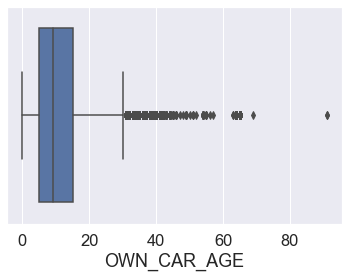

In [693]:
#Lets check for outlier of car age
sns.boxplot(appsubset_df['OWN_CAR_AGE']);

In [694]:
appsubset_df['OWN_CAR_AGE'].describe()

count    104582.000000
mean     12.061091    
std      11.944812    
min      0.000000     
25%      5.000000     
50%      9.000000     
75%      15.000000    
max      91.000000    
Name: OWN_CAR_AGE, dtype: float64

In [695]:
print('mode of car age: {0}'.format(appsubset_df['OWN_CAR_AGE'].mode()))
print('median of car age: {0}'.format(appsubset_df['OWN_CAR_AGE'].median()))
print('mean of car age: {0}'.format(appsubset_df['OWN_CAR_AGE'].mean()))

mode of car age: 0    7.0
dtype: float64
median of car age: 9.0
mean of car age: 12.061090818687727


## Observations from above and Approach to imput missing value of car age:
- From above, 5 obseravtions have car flag as Y but car age information is null. 
- As we can see from boxplot, there are many outliers with car age. Maximum value of car age is 91(may be vintage car) so with these outliers its better to impute value of car age with median i.e. 9
    - This is because mostly the cars will be of this age (median as 9)
- Also from above, there are 202924 observations where car age is null and car ownership flag is N. This means because the person does not own car so no age is available for such observations. We can leave these values as it is

- <b><font size = 3 color = "blue">Please note that since we have been asked only to give approach and not impute the values so not imputing missing 5 values at this moment</font> </b>

In [696]:
# print('total sum of null values in column "OWN_CAR_AGE" before filling null values: {0}'.
#       format(appsubset_df['OWN_CAR_AGE'].isna().sum()))
# appsubset_df['OWN_CAR_AGE'].fillna(0,inplace=True)
# print('total sum of null values in column "OWN_CAR_AGE" after filling null values: {0}'.
#       format(appsubset_df['OWN_CAR_AGE'].isna().sum()))

In [697]:
## Lets do the same for observations where the flag is Y for cars present but the age of car is unknown. 
## Lets look for those observations
# ## Check for columns FLAG_OWN_CAR and OWN_CAR_AGE
# print('number of nulls when FLAG to OWN CAR is "N" and no information available about age of car: {0}'.
#       format(appsubset_df[appsubset_df['FLAG_OWN_CAR']=='N']['OWN_CAR_AGE'].isna().sum()))
# print('number of nulls when FLAG to OWN CAR is "Y" but no information available about age of car: {0}'.
#       format(appsubset_df[appsubset_df['FLAG_OWN_CAR']=='Y']['OWN_CAR_AGE'].isna().sum()))

## Lets look for columns with missing value% around 13%<a id='Approach to impute data for 13 per missing data columns'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [698]:
missing_col_treat_list = list(missing_value_df[(missing_value_df['percent_missing']>=13) & 
                                               (missing_value_df['percent_missing']<=14)]['column_name'])
missing_col_treat_list                     

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [699]:
# Check the data type of columns
appsubset_df[missing_col_treat_list].dtypes

AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

In [700]:
#check the mean, median, standard deviation,min, max of these columns
appsubset_df[missing_col_treat_list].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count  265992.000000               265992.000000               
mean   0.006402                    0.007000                    
std    0.083849                    0.110757                    
min    0.000000                    0.000000                    
25%    0.000000                    0.000000                    
50%    0.000000                    0.000000                    
75%    0.000000                    0.000000                    
max    4.000000                    9.000000                    

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count  265992.000000               265992.000000               
mean   0.034362                    0.267395                    
std    0.204685                    0.916002                    
min    0.000000                    0.000000                    
25%    0.000000                    0.000000                    
50%    0.000000                    0.000000                    
75%    0.000000                    0.000000                    
max    8.000000                    27.000000                   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count  265992.000000              265992.000000               
mean   0.265474                   1.899974                    
std    0.794056                   1.869295                    
min    0.000000                   0.000000                    
25%    0.000000                   0.000000                    
50%    0.000000                   1.000000                    
75%    0.000000                   3.000000                    
max    261.000000                 25.000000

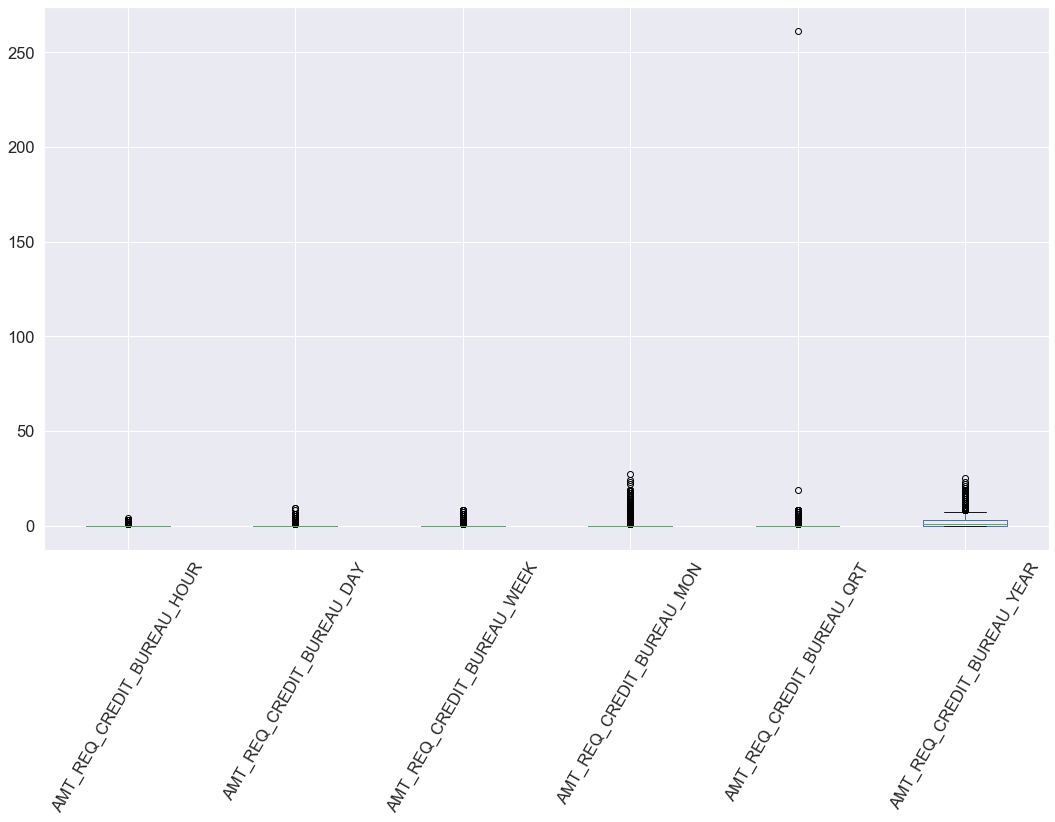

In [701]:
appsubset_df[missing_col_treat_list].plot(kind='box',figsize=(18,10),rot=60);

### Observation - AMT_REQ_CREDIT_BUREAU_QRT has an outliuer

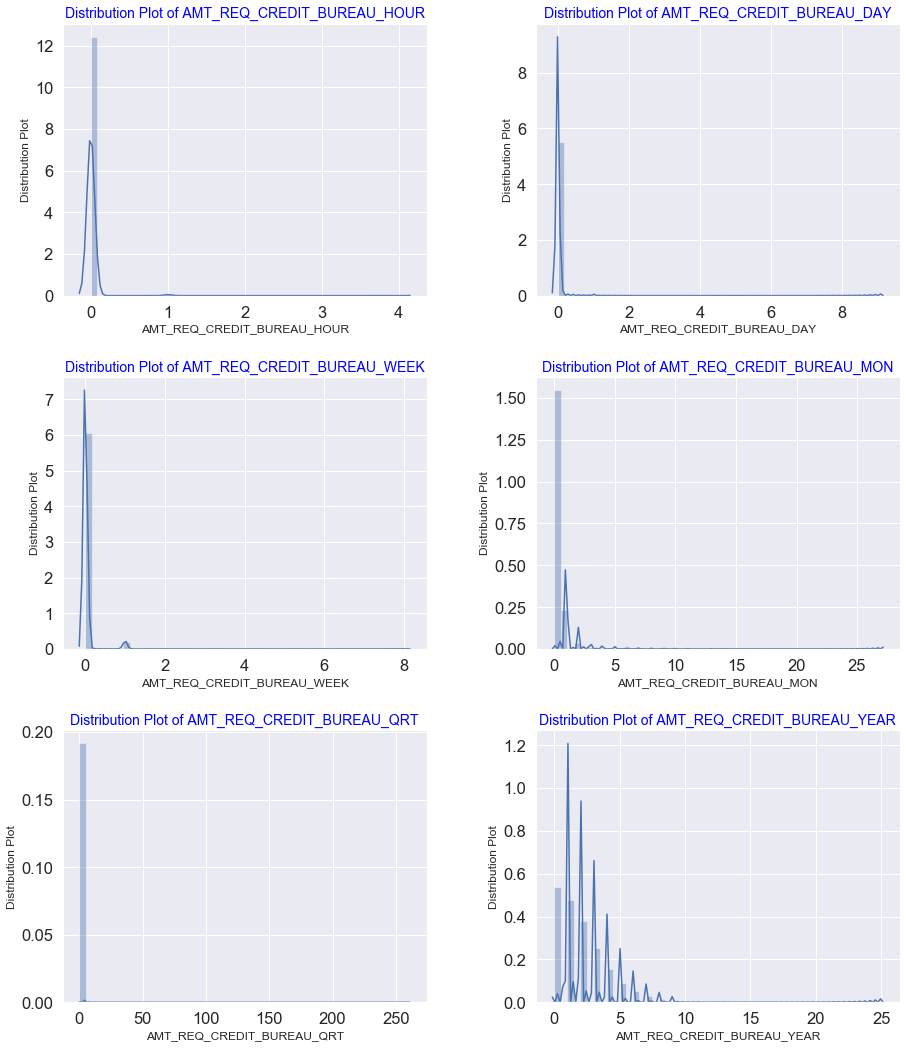

In [702]:
nrows = int(np.ceil(len(missing_col_treat_list)/2)) # Makes sure you have enough rows
bandwidth=0.05#bandwidth for densityplot - Parameter that controls the number of samples
#tweak figsize scaler if graphs don't fit well
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, len(missing_col_treat_list)*3), sharex=False, sharey=False)
fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0.3)
ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
label_list=['CB Hour','CB Day','CB Week','CB Mon','CB QRT','CB YEAR']
for i, x_axis in enumerate(missing_col_treat_list): # Gives us an index value to get into all our lists
    sns.distplot(appsubset_df[missing_col_treat_list[i]].dropna(),label=label_list[i],ax=ax[i],kde_kws={"bw":bandwidth});
    ax[i].set_title('Distribution Plot of {0}'.format(missing_col_treat_list[i]),fontsize=14,color='blue')
    ax[i].set_xlabel(missing_col_treat_list[i],fontsize=12) 
    ax[i].set_ylabel('Distribution Plot',fontsize=12)

## Observations from above plot and Missing Value Treatment
- With bandwidth of 0.05 and using density plot we can see that below columns almost follow normal distribution
    - 'AMT_REQ_CREDIT_BUREAU_HOUR' 
    - 'AMT_REQ_CREDIT_BUREAU_DAY'
    - 'AMT_REQ_CREDIT_BUREAU_WEEK'
    - The standard deviation of these columns is also lower so we can impute the missing values with mean
- Following columns however do not follow normal distribution with kde as 0.05
    - Also 'AMT_REQ_CREDIT_BUREAU_QRT' has outlier as can be seen from the plot also can be seen in statitics, max value is 261.000000. So for this column we will choose to impute missing value with median so that the distribution is not disturbed much
    - Similarly for columns 'AMT_REQ_CREDIT_BUREAU_MON' and 'AMT_REQ_CREDIT_BUREAU_YEAR' there ar many spikes with kde as 0.05. Also if seen in statistics farme, the standard deviation is high for these columns. So for these columns we will impute the missing values with median


# Check for the number imbalance of class - Target<a id='Class imbalance check'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

- As per data dictionary - Target variable value description:
     - 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 
     - 0 - all other cases

In [703]:
appsubset_df['TARGET'].value_counts()

0    282686
1    24825 
Name: TARGET, dtype: int64

In [704]:
appsubset_df['TARGET'].value_counts(1)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [705]:
# Print percentage Value "0" and "1" in Target column
print('Value "0" in Target column percentage: {0:.2%}'.format(appsubset_df['TARGET'].value_counts(1)[0]))
print('Value "1" in Target column percentage: {0:.2%}'.format(appsubset_df['TARGET'].value_counts(1)[1]))

Value "0" in Target column percentage: 91.93%
Value "1" in Target column percentage: 8.07%


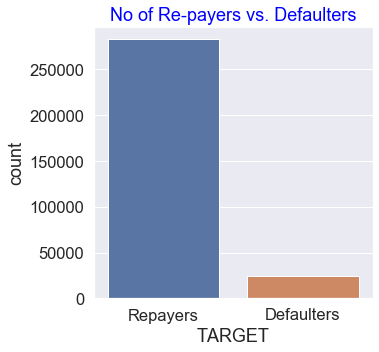

In [706]:
plt.figure(figsize=(5,5))
sns.countplot(appsubset_df['TARGET']);
plt.title('No of Re-payers vs. Defaulters',color='blue')
plt.xticks(np.arange(2),('Repayers','Defaulters'));
#plt.legend(('0 - Repayers','1 - Defaulters'));

# Obseravtion from above plot
- The Target class is highly imbalanced with 
    - 91.93% of observations as "0" - labeled as repayers
    - 8.07% of observations as "1" - labeled defaulters 

## Function to plot loan taken in each category and loan repayment difficulty%

In [707]:
def plot_loan_and_repyment(feature,repayment_df,category_df,another_row=False,height=8,ylabels=[]):
    
    if another_row:
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,height*2))
    else:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
    fig.subplots_adjust(hspace=0.3)
    fig.subplots_adjust(wspace=0.3)
    
    ## plot the total loan taken by each sub-category
    ax1.set_title('Loan taken per category',color='blue')
    ax1.set_ylabel(feature) 
    ax1.set_xlabel('count')
    sns.countplot(y=feature,data=category_df,ax=ax1,color='green');
    if len(ylabels)>0:
        ax1.set_yticklabels(ylabels);
    
    ## plot the repayment difficulty in each sub-category
    ax2.set_title('Loan Repayment difficulty%',color='blue')
    ax2.set_ylabel(feature) 
    ax2.set_xlabel('percentage')
    repayment_df.iloc[1].sort_values().plot(kind='barh',ax=ax2,color='orange');
    if len(ylabels)>0:
        ax2.set_yticklabels(ylabels)


# Lets analyse loan type and which loan type has maximum loan defaults<a id='Analyse Loan Types'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [708]:
## Check for missing/null values of Loan Type column
appsubset_df['NAME_CONTRACT_TYPE'].isnull().sum()

0

From above it can be seen that there is no null value for Loan Type

In [709]:
appsubset_df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans    29279 
Name: NAME_CONTRACT_TYPE, dtype: int64

In [710]:
crosstab_df = pd.crosstab(appsubset_df['TARGET'],
            appsubset_df['NAME_CONTRACT_TYPE']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                   91.65       94.52          
1                   8.35        5.48

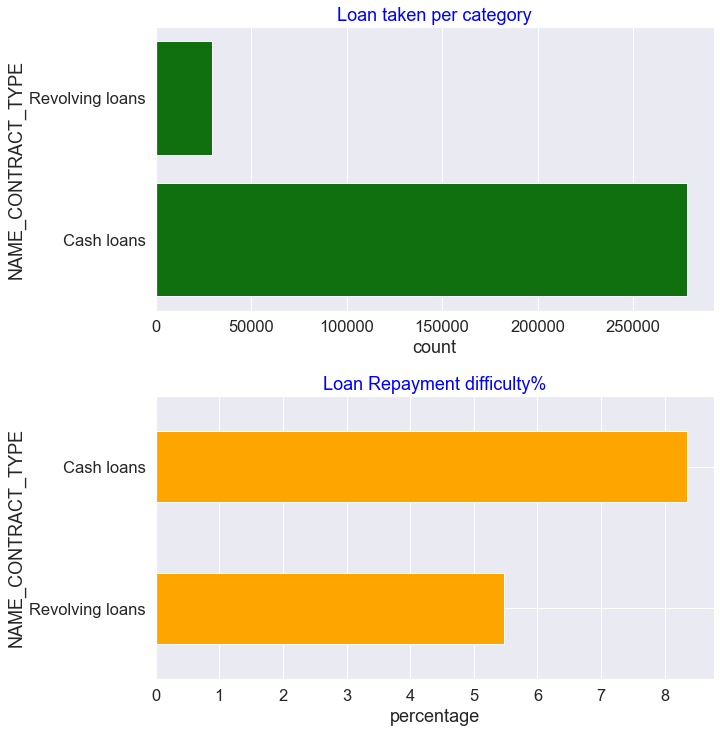

In [711]:
plot_loan_and_repyment('NAME_CONTRACT_TYPE',crosstab_df,appsubset_df.sort_values(
    by='NAME_CONTRACT_TYPE',ascending=False),True,6)

## Observations from above plot
- Maximum type of loans taken are Cash Loan - 278232
    - Out of these 8.35% Cash Loans have difficulty in repayment of loans
- Revolving Loans are the second type - 29279
    - Out of these 5.48% Revolving Loans have difficulty in repayment of loans
- <b><font size = 3 color = "blue">Maximum number of loans type taken are Cash Loans and in terms of loan default percentage within each category, Cash Loans have maximum loan defaults - 8.35%</font></b>

## Function to plot distribution

In [712]:
def plot_dist_and_kde_target_distribution(subset_df,feature,bandwidth=100000,logyplot=False,logxplot=False,another_row=False,height=8):
    
    if another_row:
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,height*2))
    else:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
    #plt.figure(figsize=(8,8))
    sns.distplot(subset_df[subset_df['TARGET']==1][feature].dropna(), label='TARGET = 1',ax=ax1,kde_kws={"bw":bandwidth})
    sns.distplot(subset_df[subset_df['TARGET']==0][feature].dropna(), label='TARGET = 0',ax=ax1,kde_kws={"bw":bandwidth})
    ax1.set_ylabel('Distribution plot', fontsize=12)
    ax1.set_xlabel(feature, fontsize=12)
    if logyplot:
        ax1.set_yscale('log')
    if logxplot:
        ax1.set_xscale('log')
    ax1.set_title(feature+' Distribution Plot',color='blue',fontsize=14)
    locs, labels = plt.xticks()
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.legend();
    sns.kdeplot(subset_df[subset_df['TARGET']==1][feature], bw=bandwidth,label='TARGET = 1',ax=ax2)
    sns.kdeplot(subset_df[subset_df['TARGET']==0][feature], bw=bandwidth,label='TARGET = 0',ax=ax2)
    ax2.set_ylabel('Density plot', fontsize=12)
    ax2.set_xlabel(feature, fontsize=12)
    if logyplot:
        ax2.set_yscale('log')
    if logxplot:
        ax2.set_xscale('log')
    ax2.set_title(feature+' Density Plot',color='blue',fontsize=14)
    locs, labels = plt.xticks()
    ax2.tick_params(axis='both', which='major', labelsize=12)
    ax2.legend();

# Income is one of the deciding factor to approve loan and also whether person is capable enough to repay back or not<a id='Analyse Total Income'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>


- Lets analyse the number of defaults for AMT_INCOME_TOTAL feature

In [713]:
appsubset_df['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, '.2f'))

count    307511.00   
mean     168797.92   
std      237123.15   
min      25650.00    
25%      112500.00   
50%      147150.00   
75%      202500.00   
max      117000000.00
Name: AMT_INCOME_TOTAL, dtype: object

## Since the data type of AMT_INCOME_TOTAL is object so convert it into numeric<a id='Convert income data type to numeric'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>


In [714]:
appsubset_df['AMT_INCOME_TOTAL'] = pd.to_numeric(appsubset_df['AMT_INCOME_TOTAL'])
appsubset_df['AMT_INCOME_TOTAL'].dtype

dtype('float64')

In [715]:
appsubset_df[appsubset_df['AMT_INCOME_TOTAL']>=5000000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840   114967      1       Cash loans         F           N             
77768   190160      0       Cash loans         F           Y             
131127  252084      0       Cash loans         M           Y             
203693  336147      0       Cash loans         M           Y             
246858  385674      0       Cash loans         M           Y             

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840   Y               1             117000000.0       562491.0     
77768   N               0             9000000.0         1431531.0    
131127  N               0             6750000.0         790830.0     
203693  Y               2             18000090.0        675000.0     
246858  Y               0             13500000.0        1400503.5    

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
12840   26194.5      454500.0         Unaccompanied   Working                
77768   132601.5     1377000.0        Unaccompanied   Working                
131127  52978.5      675000.0         Unaccompanied   Working                
203693  69295.5      675000.0         Unaccompanied   Commercial associate   
246858  130945.5     1368000.0        Unaccompanied   Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840   Secondary / secondary special  Married            House / apartment   
77768   Higher education               Civil marriage     House / apartment   
131127  Higher education               Married            House / apartment   
203693  Secondary / secondary special  Married            House / apartment   
246858  Higher education               Married            House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840   0.010643                   -12615      -922             
77768   0.010147                   -16425      -8476            
131127  0.009549                   -19341      -443             
203693  0.030755                   -15704      -4961            
246858  0.030755                   -13551      -280             

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
12840  -6762.0            -3643            NaN           1            
77768  -7276.0            -1656             8.0          1            
131127 -7414.0            -2886             8.0          1            
203693 -3338.0            -4728             7.0          1            
246858 -3953.0            -4972             10.0         1            

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
12840   1               0                1                 0            
77768   1               0                1                 0            
131127  1               1                1                 1            
203693  1               0                1                 0            
246858  1               1                1                 0            

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840   0           Laborers        3.0              2                      
77768   0           Managers        2.0              2                      
131127  0           Laborers        2.0              2                      
203693  0           NaN             4.0              2                      
246858  0           NaN             2.0              2                      

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12840   2                            TUESDAY                     
77768   2                            FRIDAY                      
131127  2                            TUESDAY                     
203693  2                            THURSDAY                    
246858  2                            SUNDAY                      

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12840   14        

## Lets check for distribution of the Income

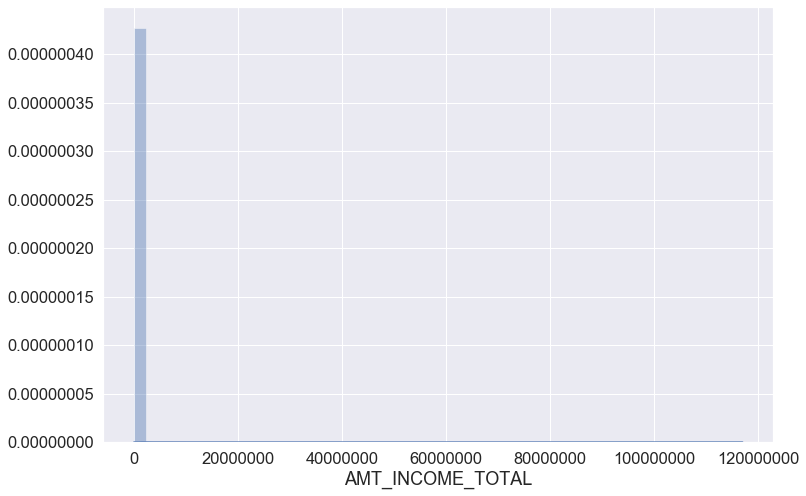

In [716]:
plt.figure(figsize=(12,8))
ax = sns.distplot(appsubset_df['AMT_INCOME_TOTAL']);
ax.get_xaxis().get_major_formatter().set_scientific(False);
ax.get_yaxis().get_major_formatter().set_scientific(False);

## Observations from above plot
- Its a highly skewed distribution with tail towards right side
- This means there are many observations with varied high income range

## Before making bins of AMT_INCOME_TOTAL columns, lets check for outliers

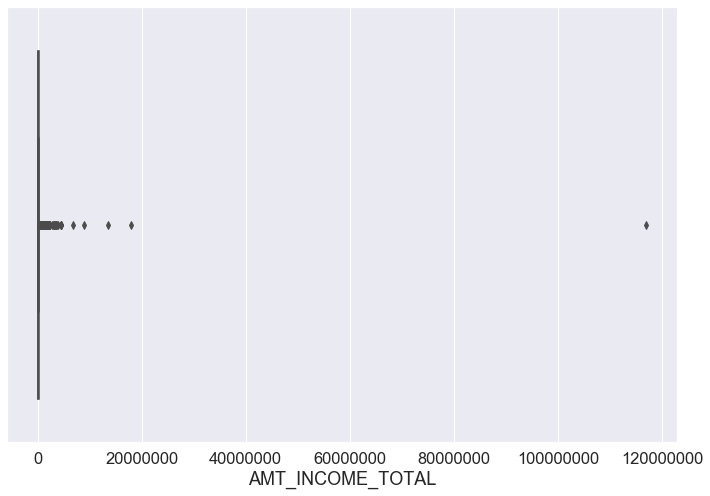

In [717]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(appsubset_df['AMT_INCOME_TOTAL']);
ax.get_xaxis().get_major_formatter().set_scientific(False);

## Observations from above plot
- There are many outliers with 117000000.00 being the maximum amount and 25650.00 being the minimum amount
- With such variation in income its difficult to infer anything from the boxplot
- Lets bin the dataframe to further analyse based on Income Amount

### Lets plot distribution to get an idea of probability distribution

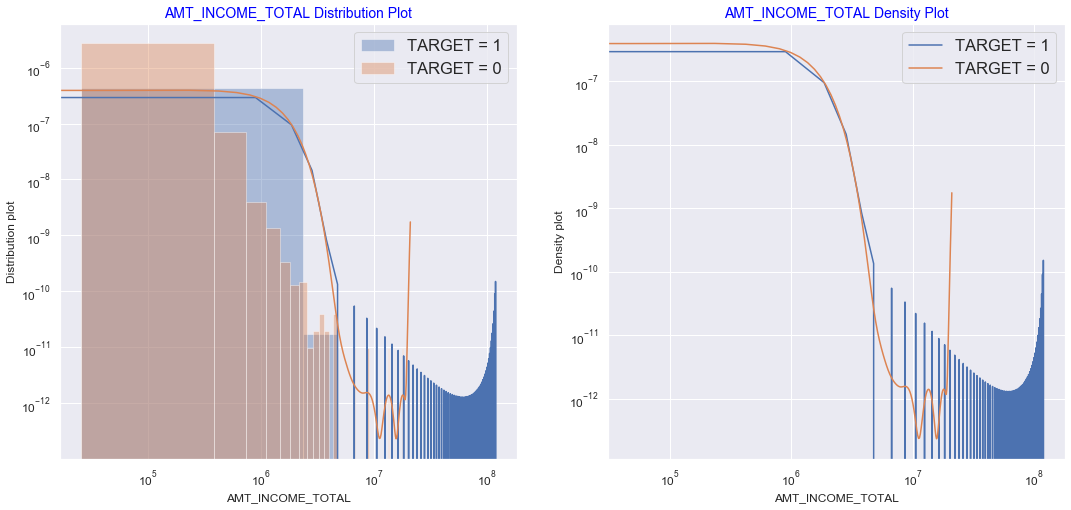

In [718]:
bandwidth=1000000
plot_dist_and_kde_target_distribution(appsubset_df,'AMT_INCOME_TOTAL',bandwidth,True,True,False)

## Observations from above plot
- Above plot clearly show that there is a presence of an outlier with very high valuen and that outlier is for Traget variable 1 i.e. dfeaulter
- The dristrbution or Traget variable 0 and 1 follow closely

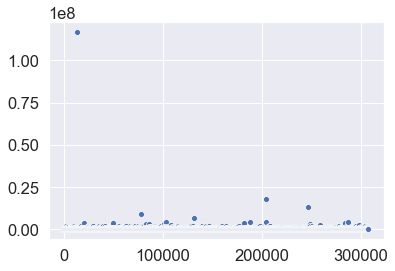

In [719]:
sns.scatterplot(data=appsubset_df['AMT_INCOME_TOTAL']);

In [720]:
appsubset_df['AMT_INCOME_TOTAL'].describe(percentiles = [0.05,.10,.25,.50,.75,.90,.95,.99]).apply(lambda x: format(x,'.2f'))

count    307511.00   
mean     168797.92   
std      237123.15   
min      25650.00    
5%       67500.00    
10%      81000.00    
25%      112500.00   
50%      147150.00   
75%      202500.00   
90%      270000.00   
95%      337500.00   
99%      472500.00   
max      117000000.00
Name: AMT_INCOME_TOTAL, dtype: object

## Observations from above cell
- It clearly shows that there is an outlier as can be seen in scatter plot
- Also from the describe function we can see that the maximum value is 117000000.00 which is clearlu an outlier

## Lets make bins of income amount for further analysis

In [721]:
bins = [0,30000,40000,50000,60000,70000,80000,90000,100000,120000,140000,160000,
        180000,200000,250000,500000,1000000,5000000,10000000,20000000,120000000]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ylabels = ['0-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k',
          '100k-120k','120k-140k','140k-160k','160k-180k','180k-200k','200k-250k','250k-500k','500k-1mn','1mn-5mn',
           '5mn-10mn','10mn-20mn','20mn-120mn']

# bins = [1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000,5000000,18500000]
# labels = [1,2,3,4,5,6,7,8]
appsubset_df['AMT_INCOME_TOTAL_BINNED'] = pd.cut(appsubset_df['AMT_INCOME_TOTAL'], bins=bins, labels=ylabels)
appsubset_df.sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
51794   159981      0       Cash loans         F           N             
245526  384139      0       Cash loans         M           Y             
36038   141745      0       Cash loans         M           Y             
255478  395620      0       Cash loans         F           N             
193048  323864      0       Cash loans         F           N             

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
51794   Y               0             126000.0          334152.0     
245526  Y               0             157500.0          900000.0     
36038   N               1             112500.0          479637.0     
255478  Y               0             126000.0          675000.0     
193048  Y               0             157500.0          614475.0     

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
51794   17190.0      270000.0         Unaccompanied    Commercial associate   
245526  57649.5      900000.0         Spouse, partner  Commercial associate   
36038   22491.0      396000.0         Children         Working                
255478  29862.0      675000.0         Unaccompanied    Working                
193048  28773.0      432000.0         Unaccompanied    Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
51794   Secondary / secondary special  Separated              
245526  Secondary / secondary special  Civil marriage         
36038   Secondary / secondary special  Married                
255478  Secondary / secondary special  Married                
193048  Secondary / secondary special  Single / not married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
51794   House / apartment  0.020246                   -16787        
245526  House / apartment  0.031329                   -14451        
36038   House / apartment  0.015221                   -15378        
255478  House / apartment  0.028663                   -19385        
193048  House / apartment  0.006629                   -12911        

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
51794  -3225          -8854.0            -10              NaN            
245526 -5184          -7427.0            -4960             10.0          
36038  -225           -2297.0            -4103             9.0           
255478 -698           -13014.0           -2934            NaN            
193048 -1651          -5964.0            -3315            NaN            

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
51794   1           1               0                1                  
245526  1           1               0                1                  
36038   1           1               0                1                  
255478  1           1               0                1                  
193048  1           1               0                1                  

        FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
51794   0           0           Realty agents   1.0               
245526  0           0           Sales staff     2.0               
36038   0           0           NaN             3.0               
255478  1           0           Core staff      2.0               
193048  1           0           Sales staff     1.0               

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
51794   3                     3                             
245526  2                     2                             
36038   2                     2                             
255478  2                     2                             
193048  2                     2                             

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
51794   THURSDAY                   10                        
245526  FRIDAY                     14                        
36038   THURSDAY                 

In [722]:
## check for no. of observations in various bins
appsubset_df['AMT_INCOME_TOTAL_BINNED'].value_counts()

200k-250k     48137
120k-140k     47038
100k-120k     39639
250k-500k     37076
140k-160k     32752
160k-180k     32457
80k-90k       30559
60k-70k       12881
70k-80k       5930 
90k-100k      5776 
50k-60k       4035 
180k-200k     4012 
40k-50k       3554 
500k-1mn      2452 
30k-40k       822  
1mn-5mn       245  
0-30k         141  
10mn-20mn     2    
5mn-10mn      2    
20mn-120mn    1    
Name: AMT_INCOME_TOTAL_BINNED, dtype: int64

## Lets check for defaulters in various bins of Income Amount

In [723]:
income_count = appsubset_df['AMT_INCOME_TOTAL_BINNED'].count()
appsubset_df.groupby('AMT_INCOME_TOTAL_BINNED').apply(lambda x: x.count(0)/income_count)[['AMT_INCOME_TOTAL_BINNED']]

AMT_INCOME_TOTAL_BINNED
AMT_INCOME_TOTAL_BINNED                         
0-30k                    0.000459               
30k-40k                  0.002673               
40k-50k                  0.011557               
50k-60k                  0.013121               
60k-70k                  0.041888               
70k-80k                  0.019284               
80k-90k                  0.099375               
90k-100k                 0.018783               
100k-120k                0.128903               
120k-140k                0.152964               
140k-160k                0.106507               
160k-180k                0.105547               
180k-200k                0.013047               
200k-250k                0.156537               
250k-500k                0.120568               
500k-1mn                 0.007974               
1mn-5mn                  0.000797               
5mn-10mn                 0.000007               
10mn-20mn                0.000007               
20mn-120mn               0.000003

In [724]:
crosstab_df = pd.crosstab(appsubset_df['TARGET'],
            appsubset_df['AMT_INCOME_TOTAL_BINNED']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

AMT_INCOME_TOTAL_BINNED  0-30k  30k-40k  40k-50k  50k-60k  60k-70k  70k-80k  \
TARGET                                                                        
0                        94.33  91.24    92.6     92.69    91.85    91.89     
1                        5.67   8.76     7.4      7.31     8.15     8.11      

AMT_INCOME_TOTAL_BINNED  80k-90k  90k-100k  100k-120k  120k-140k  140k-160k  \
TARGET                                                                        
0                        91.61    91.5      91.27      91.52      91.27       
1                        8.39     8.5       8.73       8.48       8.73        

AMT_INCOME_TOTAL_BINNED  160k-180k  180k-200k  200k-250k  250k-500k  500k-1mn  \
TARGET                                                                          
0                        91.63      92.62      92.26      93.53      94.58      
1                        8.37       7.38       7.74       6.47       5.42       

AMT_INCOME_TOTAL_BINNED  1mn-5mn  5mn-10mn  10mn-20mn  20mn-120mn  
TARGET                                                             
0                        95.1     100.0     100.0      0.0         
1                        4.9      0.0       0.0        100.0

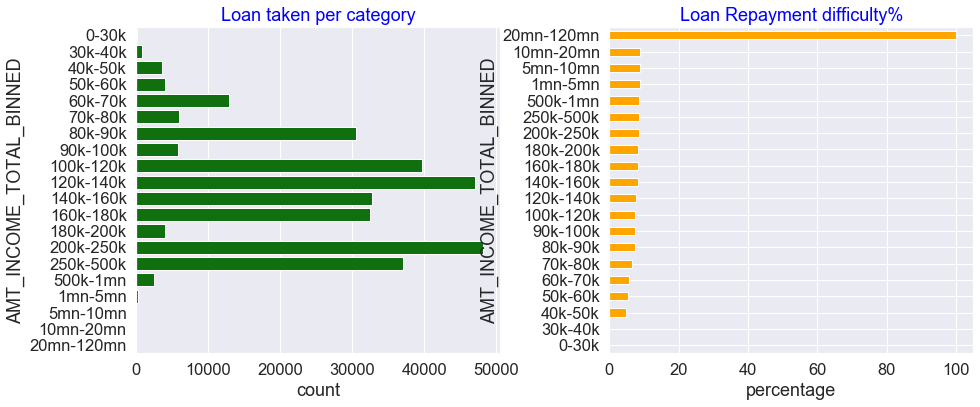

In [725]:
plot_loan_and_repyment('AMT_INCOME_TOTAL_BINNED',crosstab_df,appsubset_df.sort_values(
    by='AMT_INCOME_TOTAL_BINNED'),False,8,ylabels)

## Observations from above plot
- Maximum number of loans are taken by people with income amount in bin 14 i.e. income amount in range of [20k - 25k] - 48137
- Second highest number of loans are taken by people with income amount in bin 10 i.e. income amount in range of [120k - 140k] - 47038
- Third highest number of loans are taken by people with income amount in bin 9 i.e. income amount in range of [100k - 120k] - 39639

- Maximum %difficulty is faced by people with income amount in bin 20 i.e. income amount in range of [20mn - 120mn] - 100%
- Second most %difficulty is faced by people with income amount in bin 2 i.e. income amount in range of [30k - 40k] - 8.76%
- Third most %difficulty is faced by people with income amount in bin 11 i.e. income amount in range of [140k - 160k] - 8.73%
- Least %difficulty is faced by people with income amount in bin 18 & 19 i.e. income amount in range of [5mn - 20mn] - 0%


- <b><font size = 3 color = "blue">Maximum loan is taken by people with income amount in range of [200k - 250k] but in terms of ratio within each category, people with income amount in range of [20mn - 120mn] face more difficulty in loan repayment (100%) followed by people with income amount in range of [30k - 40k] - 8.76%</font></b>

# Lets make bins of AMT_CREDIT Column and check in which bin defaulters are more<a id='Analyse Credit Amount'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [726]:
appsubset_df['AMT_CREDIT'].describe().apply(lambda x: format(x, '.2f'))

count    307511.00 
mean     599026.00 
std      402490.78 
min      45000.00  
25%      270000.00 
50%      513531.00 
75%      808650.00 
max      4050000.00
Name: AMT_CREDIT, dtype: object

## Since the data type of AMT_CREDIT is object so convert it into numeric<a id='Convert credit amount type to numeric'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>


In [727]:
appsubset_df['AMT_CREDIT'] = pd.to_numeric(appsubset_df['AMT_CREDIT'])
appsubset_df['AMT_CREDIT'].dtype

dtype('float64')

## Before making bins of AMT_CREDIT columns, lets check for outliers

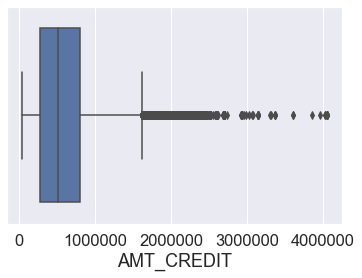

In [728]:
sns.boxplot(appsubset_df['AMT_CREDIT']);

## Observations from above plot
- There are many outliers with 4050000.00 being the maximum amount and 45000.00 being the minimum amount

### Lets plot distribution to get an idea of probability distribution

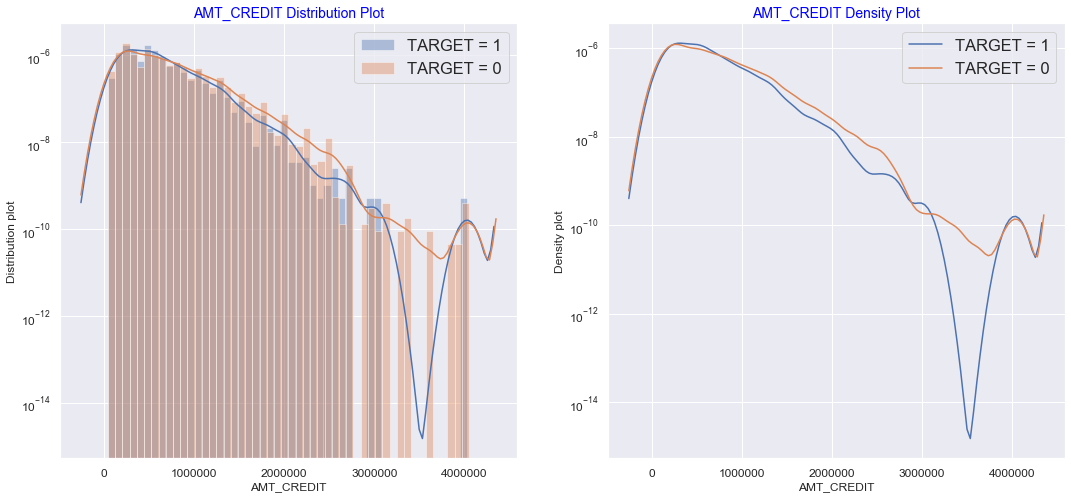

In [729]:
bandwidth=100000
plot_dist_and_kde_target_distribution(appsubset_df,'AMT_CREDIT',bandwidth,True,False)

## Observations from above plot
- Count of observations with CREDIT AMOUNT in the range of [0,2800000] for repayer(Target-0) and defaulter(Target-1) are almost similar. The defaulters are on the lower side than the repayers
- For CREDIT AMOUNT between [3000000,3200000], the count of defaulter is more than count of repayers
- For CREDIT AMOUNT between [3300000, 3800000], there is no defaulter however at amount around 4000000, the defaulter count can be seen which is same as repayer

## Lets make bins of credit amount

In [730]:
## Let make bins inline with pe=revapp.csv AMT_CREDIT. This is to find any correlation later
# bins = [1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000]
# labels = [1,2,3,4,5,6]
bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,120000,140000,160000,
        180000,200000,250000,500000,1000000,5000000,7000000]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ylabels = ['0-10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k',
          '100k-120k','120k-140k','140k-160k','160k-180k','180k-200k','200k-250k','250k-500k','500k-1mn',
           '1mn-5mn','5mn-7mn']
appsubset_df['AMT_CREDIT_BINNED'] = pd.cut(appsubset_df['AMT_CREDIT'], bins=bins, labels=ylabels)
appsubset_df.sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
205160  337822      0       Cash loans         F           N             
255234  395331      0       Cash loans         M           Y             
60173   169774      0       Cash loans         F           N             
143623  266537      1       Cash loans         M           Y             
153031  277372      0       Cash loans         F           Y             

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
205160  Y               0             90000.0           485640.0     
255234  Y               2             292500.0          900000.0     
60173   N               0             225000.0          900000.0     
143623  N               0             360000.0          1546020.0    
153031  N               1             94500.0           76752.0      

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
205160  34668.0      450000.0         Other_A         Commercial associate   
255234  26316.0      900000.0         Unaccompanied   Pensioner              
60173   50256.0      900000.0         Family          Pensioner              
143623  45333.0      1350000.0        Unaccompanied   Commercial associate   
153031  8262.0       72000.0          Unaccompanied   Working                

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
205160  Secondary / secondary special  Married            House / apartment     
255234  Higher education               Married            House / apartment     
60173   Higher education               Married            House / apartment     
143623  Secondary / secondary special  Married            Municipal apartment   
153031  Secondary / secondary special  Civil marriage     House / apartment     

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
205160  0.030755                   -17181      -720             
255234  0.010643                   -15539       365243          
60173   0.072508                   -21854       365243          
143623  0.007114                   -12476      -3419            
153031  0.028663                   -12631      -1736            

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
205160 -7126.0            -134             NaN           1            
255234 -4303.0            -4995             2.0          1            
60173  -5172.0            -3991            NaN           1            
143623 -1959.0            -4712             1.0          1            
153031 -3870.0            -4265             4.0          1            

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
205160  1               0                1                 0            
255234  0               0                1                 0            
60173   0               0                1                 1            
143623  1               0                1                 1            
153031  1               1                1                 1            

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
205160  0           Sales staff     2.0              2                      
255234  0           NaN             4.0              2                      
60173   0           NaN             2.0              1                      
143623  0           Managers        2.0              2                      
153031  0           Laborers        3.0              2                      

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
205160  2                            WEDNESDAY                   
255234  2                            MONDAY                      
60173   1                            THURSDAY                    
143623  2                            THURSDAY                    
153031  2                            MONDAY                      

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
205160

## Lets check for defaulters in various bins of Credit Amount

In [731]:
## check for no. of observations in various bins
appsubset_df['AMT_CREDIT_BINNED'].value_counts()

500k-1mn     108193
250k-500k    90135 
1mn-5mn      49985 
200k-250k    23054 
160k-180k    11392 
120k-140k    6115  
140k-160k    5892  
100k-120k    3801  
180k-200k    2940  
80k-90k      1312  
90k-100k     1295  
70k-80k      1226  
50k-60k      891   
60k-70k      719   
40k-50k      561   
20k-30k      0     
10k-20k      0     
5mn-7mn      0     
30k-40k      0     
0-10k        0     
Name: AMT_CREDIT_BINNED, dtype: int64

In [732]:
credit_count = appsubset_df['AMT_CREDIT_BINNED'].count()
appsubset_df.groupby('AMT_CREDIT_BINNED').apply(lambda x: x.count(0)/credit_count)[['AMT_CREDIT_BINNED']]

AMT_CREDIT_BINNED
AMT_CREDIT_BINNED                   
0-10k              0.000000         
10k-20k            0.000000         
20k-30k            0.000000         
30k-40k            0.000000         
40k-50k            0.001824         
50k-60k            0.002897         
60k-70k            0.002338         
70k-80k            0.003987         
80k-90k            0.004267         
90k-100k           0.004211         
100k-120k          0.012361         
120k-140k          0.019885         
140k-160k          0.019160         
160k-180k          0.037046         
180k-200k          0.009561         
200k-250k          0.074970         
250k-500k          0.293111         
500k-1mn           0.351835         
1mn-5mn            0.162547         
5mn-7mn            0.000000

In [733]:
crosstab_df = pd.crosstab(appsubset_df['TARGET'],
            appsubset_df['AMT_CREDIT_BINNED']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

AMT_CREDIT_BINNED  40k-50k  50k-60k  60k-70k  70k-80k  80k-90k  90k-100k  \
TARGET                                                                     
0                  95.9     95.06    94.3     95.6     93.37    93.67      
1                  4.1      4.94     5.7      4.4      6.63     6.33       

AMT_CREDIT_BINNED  100k-120k  120k-140k  140k-160k  160k-180k  180k-200k  \
TARGET                                                                     
0                  93.82      93.33      94.01      92.06      91.22       
1                  6.18       6.67       5.99       7.94       8.78        

AMT_CREDIT_BINNED  200k-250k  250k-500k  500k-1mn  1mn-5mn  
TARGET                                                      
0                  92.5       90.7       91.42     94.13    
1                  7.5        9.3        8.58      5.87

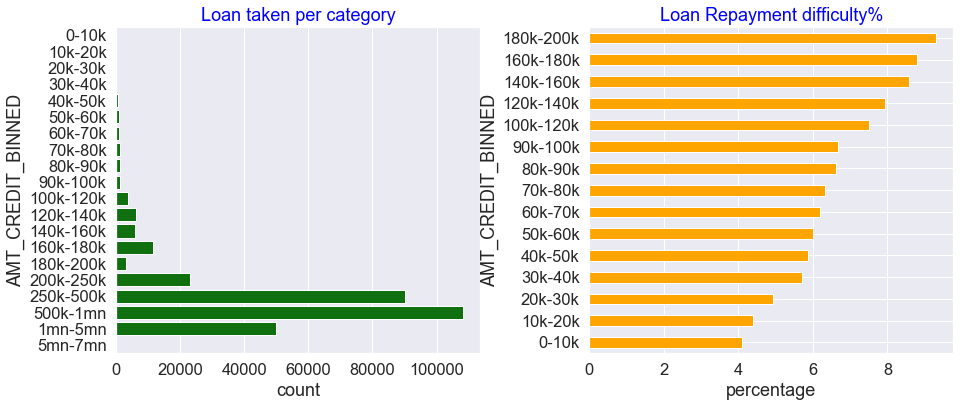

In [734]:
plot_loan_and_repyment('AMT_CREDIT_BINNED',crosstab_df,appsubset_df.sort_values(by='AMT_CREDIT_BINNED'),
                       False,8,ylabels)

## Observations from above plot
- Maximum number of loans are taken with credit amount in bin 18 i.e. credit amount range of [500k - 1mn] - 108193
- Second highest number of loans are taken with credit amount in bin 17 i.e. credit amount range of [250k - 500k] - 90135
- Third highest number of loans are taken with credit amount in bin 19 i.e. credit amount range of [250k - 500k] - 49985

- Maximum %difficulty is faced by people with credit amount in bin 17 i.e. credit amount in range of [250k - 500k] - 9.3%
- Second most %difficulty is faced by people with credit amount in bin 15 i.e. credit amount in range of [180k - 20k] - 8.78%
- Third most %difficulty is faced by people with credit amount in bin 18 i.e. credit amount in range of [500k - 1mn] - 8.58%
- Least %difficulty is faced by people with credit amount in bin 5 i.e. credit amount in range of [40k - 50k] - 4.1%


- <b><font size = 3 color = "blue">Maximum loan is taken by people with credit amount in range of [500k - 1mn] but people with credit amount in range of [250k - 500k] face more difficulty in loan repayment (9.3%)</font></b>

##  Check for AMT_ANNUITY amount<a id='Analyse Annuity Amount'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [735]:
##Look for observations where annuity amount is null
appsubset_df['AMT_ANNUITY'].isnull().sum()

12

In [736]:
# look for other details of observations where ANNUITY Amount is not available
print('No. of observations where annuity amount is null: {0}'.format(appsubset_df['AMT_ANNUITY'].isnull().sum()))
appsubset_df.loc[appsubset_df['AMT_ANNUITY'].isnull()]

No. of observations where annuity amount is null: 12


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531   155054      0       Cash loans         M           N             
50035   157917      0       Cash loans         F           N             
51594   159744      0       Cash loans         F           N             
55025   163757      0       Cash loans         F           N             
59934   169487      0       Cash loans         M           Y             
75873   187985      0       Cash loans         M           Y             
89343   203726      0       Cash loans         F           Y             
123872  243648      0       Cash loans         F           N             
207186  340147      0       Cash loans         M           N             
227939  364022      0       Cash loans         F           N             
239329  377174      0       Cash loans         F           N             
241835  379997      0       Cash loans         F           N             

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531   N               0             180000.0          450000.0     
50035   N               0             94500.0           450000.0     
51594   N               0             202500.0          539100.0     
55025   N               0             162000.0          296280.0     
59934   N               0             202500.0          360000.0     
75873   N               0             144000.0          219249.0     
89343   N               0             90000.0           157500.0     
123872  Y               0             202500.0          929088.0     
207186  N               0             171000.0          486000.0     
227939  Y               0             315000.0          628069.5     
239329  Y               0             157500.0          792000.0     
241835  N               0             315000.0          1483231.5    

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531  NaN           450000.0         Unaccompanied   Commercial associate   
50035  NaN           450000.0         Unaccompanied   Working                
51594  NaN           450000.0         Unaccompanied   Working                
55025  NaN           225000.0         Unaccompanied   State servant          
59934  NaN           360000.0         Unaccompanied   Working                
75873  NaN           166500.0         Unaccompanied   Working                
89343  NaN           157500.0         Unaccompanied   State servant          
123872 NaN           720000.0         Unaccompanied   Working                
207186 NaN           486000.0         Unaccompanied   Commercial associate   
227939 NaN           499500.0         Unaccompanied   Commercial associate   
239329 NaN           792000.0         Family          State servant          
241835 NaN           1354500.0        Unaccompanied   Working                

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531   Incomplete higher              Single / not married   
50035   Lower secondary                Civil marriage         
51594   Secondary / secondary special  Married                
55025   Higher education               Married                
59934   Secondary / secondary special  Single / not married   
75873   Higher education               Single / not married   
89343   Secondary / secondary special  Married                
123872  Secondary / secondary special  Civil marriage         
207186  Higher education               Married                
227939  Higher education               Married                
239329  Secondary / secondary special  Married                
241835  Higher education               Married                

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531   House / apartment    0.026392                   -10668        
50035   House / apartment    0.035792                   -9027         
51594   House / apartment    0.046220                   -17376        
55025   House /

In [737]:
amt_annuity_rev_df = appsubset_df[appsubset_df['NAME_CONTRACT_TYPE']=='Revolving loans'][['AMT_ANNUITY']]
amt_annuity_rev_df.isna().sum()

AMT_ANNUITY    0
dtype: int64

## For these 12 observations, there is no AMT_ANNUITY. Perhaps the person doesn't have ANNUITY

In [738]:
# print('total sum of null values in column "AMT_ANNUITY" before filling null values: {0}'.
#       format(appsubset_df['AMT_ANNUITY'].isna().sum()))
# appsubset_df['AMT_ANNUITY'].fillna(0,inplace=True)
# print('total sum of null values in column "AMT_ANNUITY" after filling null values: {0}'.
#       format(appsubset_df['AMT_ANNUITY'].isna().sum()))

In [739]:
## check for mean, std etc. for AMT_ANNUITY column
appsubset_df['AMT_ANNUITY'].describe().apply(lambda x: format(x, '.2f'))

count    307499.00
mean     27108.57 
std      14493.74 
min      1615.50  
25%      16524.00 
50%      24903.00 
75%      34596.00 
max      258025.50
Name: AMT_ANNUITY, dtype: object

## Since the data type of AMT_ANNUITY is object so convert it into numeric<a id='Convert annuity amount type to numeric'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [740]:
appsubset_df['AMT_ANNUITY'] = pd.to_numeric(appsubset_df['AMT_ANNUITY'])
appsubset_df['AMT_ANNUITY'].dtype

dtype('float64')

## Before making bins of AMT_ANNUITY columns, lets check for outliers

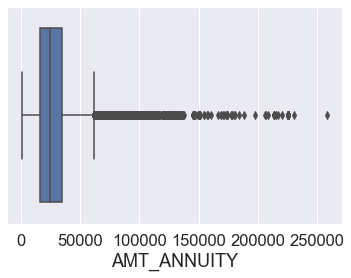

In [741]:
sns.boxplot(appsubset_df['AMT_ANNUITY']);

## Observations from above plot
- There are many outliers with 258025.50 being the maximum amount and 0.00 being the minimum amount

### Plot distribution to get an idea of probabilty distribution

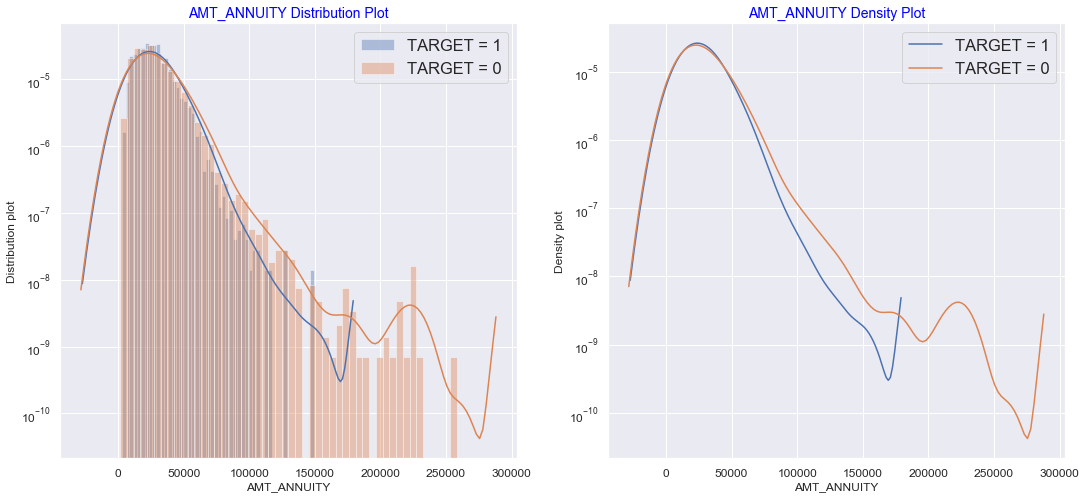

In [742]:
bandwidth=10000
plot_dist_and_kde_target_distribution(appsubset_df,'AMT_ANNUITY',bandwidth,True,False)

## Observations from above plot
- Count of observations with ANNUITY AMOUNT in the range of [0,70000] for repayer(Target-0) and defaulter(Target-1) are almost similar. The defaulters are on the lower side than the repayers
- For ANNUITY AMOUNT between [70000,140000], the count of defaulter decrease further in comaprison to count of repayers
- For ANNUITY AMOUNT between [170000, 180000], the no of defaulters increase
- For ANNUITY AMOUNT more han 170000 no defaulters can be seen

## Lets make bins of annuity amount for further analysis

In [743]:
## Make bins inline with previous app csv ANNUITY AMOUNT. This will help in finding correlation if any
bins = [0,10000,20000,30000,40000,50000,60000, 70000, 80000, 90000, 100000, 120000, 140000,160000,180000,200000,
        300000,400000,500000]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
ylabels = ['0-10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k',
          '100k-120k','120k-140k','140k-160k','160k-180k','180k-200k','200k-300k','300k-400k','400k-500k']
# bins = [60000, 70000, 80000, 100000, 120000, 140000,160000,180000,200000,300000]
# labels = [1,2,3,4,5,6,7,8,9]
appsubset_df['AMT_ANNUITY_BINNED'] = pd.cut(appsubset_df['AMT_ANNUITY'], bins=bins, labels=ylabels)
appsubset_df.sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
286420  431722      0       Cash loans         F           N             
161005  286644      0       Cash loans         F           N             
221356  356417      0       Cash loans         F           N             
161377  287082      0       Cash loans         F           N             
301510  449305      0       Cash loans         F           N             

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
286420  Y               0             67500.0           231813.0     
161005  Y               0             157500.0          328405.5     
221356  Y               0             243000.0          539100.0     
161377  Y               0             185400.0          299772.0     
301510  Y               0             112500.0          545040.0     

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
286420  10341.0      193500.0         Family          Pensioner              
161005  15930.0      283500.0         Unaccompanied   Pensioner              
221356  27652.5      450000.0         Unaccompanied   Pensioner              
161377  16866.0      247500.0         Unaccompanied   Commercial associate   
301510  20547.0      450000.0         Unaccompanied   Pensioner              

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
286420  Secondary / secondary special  Single / not married   
161005  Secondary / secondary special  Widow                  
221356  Secondary / secondary special  Civil marriage         
161377  Secondary / secondary special  Civil marriage         
301510  Secondary / secondary special  Widow                  

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
286420  House / apartment  0.019101                   -20279        
161005  House / apartment  0.007020                   -22903        
221356  House / apartment  0.006852                   -22382        
161377  House / apartment  0.007020                   -18049        
301510  House / apartment  0.003069                   -22012        

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
286420  365243        -14050.0           -206             NaN            
161005  365243        -4460.0            -4523            NaN            
221356  365243        -5520.0            -4648            NaN            
161377 -798           -5853.0            -1578            NaN            
301510  365243        -2205.0            -4355            NaN            

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
286420  1           0               0                1                  
161005  1           0               0                1                  
221356  1           0               0                1                  
161377  1           1               0                1                  
301510  1           0               0                1                  

        FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
286420  0           0           NaN             1.0               
161005  0           0           NaN             1.0               
221356  0           0           NaN             2.0               
161377  1           0           NaN             2.0               
301510  0           0           NaN             1.0               

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
286420  2                     2                             
161005  2                     2                             
221356  3                     3                             
161377  2                     2                             
301510  3                     3                             

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
286420  SATURDAY                   10                        
161005  WEDNESDAY                  10                        
221356  TUESDAY                    4   

In [744]:
## check for no. of observations in various bins
appsubset_df['AMT_ANNUITY_BINNED'].value_counts()

20k-30k      92466
10k-20k      83222
30k-40k      58562
40k-50k      28669
0-10k        23283
50k-60k      13165
60k-70k      5051 
70k-80k      1558 
80k-90k      607  
90k-100k     411  
100k-120k    313  
120k-140k    111  
200k-300k    36   
140k-160k    22   
160k-180k    19   
180k-200k    4    
300k-400k    0    
400k-500k    0    
Name: AMT_ANNUITY_BINNED, dtype: int64

## Lets check for defaulters in various bins of Annuity Amount

In [745]:
# ## Lets look for the number of observations in each bin for target 1 and 0
# appsubset_df.groupby('AMT_ANNUITY_BINNED')['TARGET'].value_counts()

In [746]:
annuityout_count = appsubset_df['AMT_ANNUITY_BINNED'].count()
appsubset_df.groupby('AMT_ANNUITY_BINNED').apply(lambda x: x.count(0)/annuityout_count)[['AMT_ANNUITY_BINNED']]

AMT_ANNUITY_BINNED
AMT_ANNUITY_BINNED                    
0-10k               0.075717          
10k-20k             0.270642          
20k-30k             0.300703          
30k-40k             0.190446          
40k-50k             0.093233          
50k-60k             0.042813          
60k-70k             0.016426          
70k-80k             0.005067          
80k-90k             0.001974          
90k-100k            0.001337          
100k-120k           0.001018          
120k-140k           0.000361          
140k-160k           0.000072          
160k-180k           0.000062          
180k-200k           0.000013          
200k-300k           0.000117          
300k-400k           0.000000          
400k-500k           0.000000

In [747]:
crosstab_df = pd.crosstab(appsubset_df['TARGET'],
            appsubset_df['AMT_ANNUITY_BINNED']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

AMT_ANNUITY_BINNED  0-10k  10k-20k  20k-30k  30k-40k  40k-50k  50k-60k  \
TARGET                                                                   
0                   92.91  92.27    91.07    91.03    92.99    93.25     
1                   7.09   7.73     8.93     8.97     7.01     6.75      

AMT_ANNUITY_BINNED  60k-70k  70k-80k  80k-90k  90k-100k  100k-120k  120k-140k  \
TARGET                                                                          
0                   95.7     95.31    96.38    96.84     97.76      98.2        
1                   4.3      4.69     3.62     3.16      2.24       1.8         

AMT_ANNUITY_BINNED  140k-160k  160k-180k  180k-200k  200k-300k  
TARGET                                                          
0                   95.45      100.0      100.0      100.0      
1                   4.55       0.0        0.0        0.0

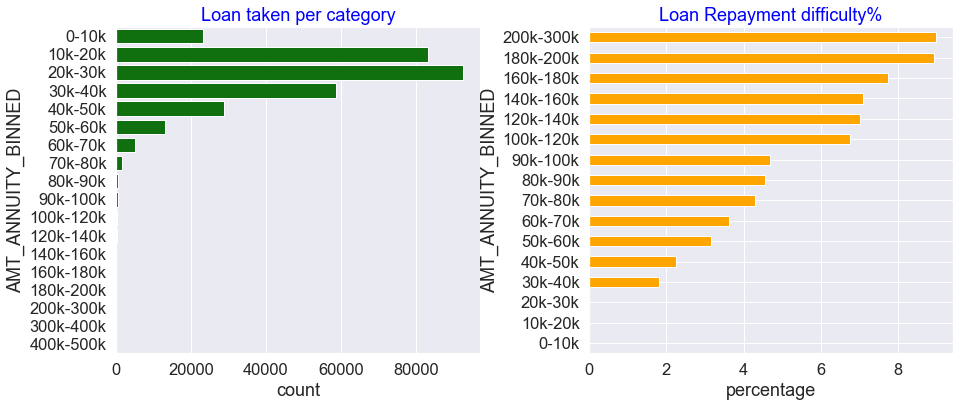

In [748]:
plot_loan_and_repyment('AMT_ANNUITY_BINNED',crosstab_df,appsubset_df.sort_values(by='AMT_ANNUITY_BINNED'),
                       False,8,ylabels)

## Observations from above plot
- Maximum number of loans taken have ammunity amount in bin 3 i.e. annuity amount in range of [20k - 30k] - 92466
- The second highest number of loan applications are with annuity amount range in Bin 2 i.e. annuity amount in the range of [10k - 20k] - 83222
- The third highest number of loan applications are with annuity amount range in Bin 4 i.e. annuity amount in the range of [30k - 40k] - 58562

- Maximum %number of difficulty in loan repayment is for ammunity amount in bin 4 i.e. annuity amount in range of [30k - 40k] - 8.97%
- Second %number of difficulty in loan repayment is for ammunity amount in bin 3 i.e. annuity amount in range of [20k - 30k] - 8.93%

- <b><font size = 3 color = "blue">Even though maximum number of loans is taken by people with annuity amount in range of [20k - 30k] but in terms of loan default percentage within each category, people with annuity amount in range of [30k - 40k] face more difficulty in loan repayment (8.97%)</font></b>

# Lets check for column Gender and also check the number of defaults made by each gender type<a id='Analyse Gender Type'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [749]:
appsubset_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA    4     
Name: CODE_GENDER, dtype: int64

In [750]:
## Check for null values in CODE_GENDER
appsubset_df['CODE_GENDER'].isnull().sum()

0

From above cell we can see that there are no null values for column CODE_GENDER

### Lets plot the number of loan defaults made by various gender types

In [751]:
appsubset_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA    4     
Name: CODE_GENDER, dtype: int64

In [752]:
crosstab_df = pd.crosstab(appsubset_df['TARGET'],
            appsubset_df['CODE_GENDER']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

CODE_GENDER     F      M    XNA
TARGET                         
0            93.0  89.86  100.0
1            7.0   10.14  0.0

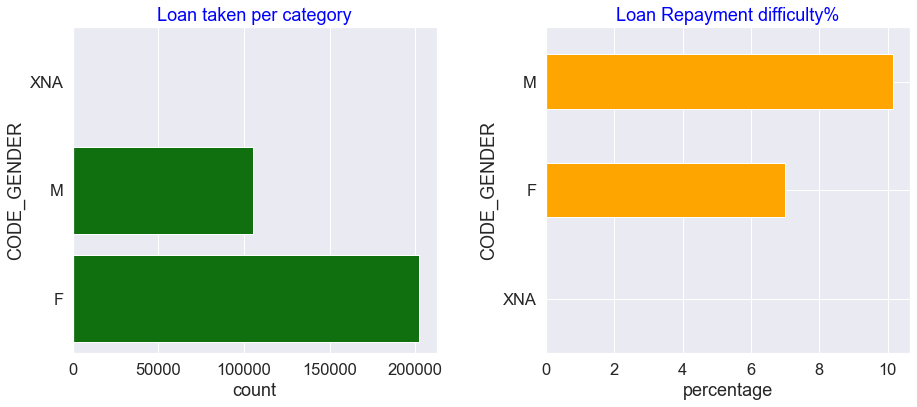

In [753]:
plot_loan_and_repyment('CODE_GENDER',crosstab_df,appsubset_df.sort_values(by='CODE_GENDER',ascending=False))

## Observations from above plot
- There are three type of Gender Codes - M (interpreted as Male), F (interpreted as Female), XNA (interpreted as Gender code not available)
- Maximum loans are being taken by Female - 202448
    - From this 7% loans have difficulty in payments more than once.
- Second highest Loans taken by gender Male - 105059
    - From this 10.14% loans have difficulty in payments more than once.
- <b><font size = 3 color = "blue">Maximum number of loans are taken by Female, but in terms of default percentage within each category, Male applicants have highest difficulty in loan repayments (10.14%)</font></b>

# Lets plot Car ownership and loan repayment difficulty<a id='Analyse Car Ownership'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [754]:
appsubset_df['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [755]:
crosstab_df = pd.crosstab(appsubset_df['TARGET'],
            appsubset_df['FLAG_OWN_CAR']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

FLAG_OWN_CAR     N      Y
TARGET                   
0             91.5  92.76
1             8.5   7.24

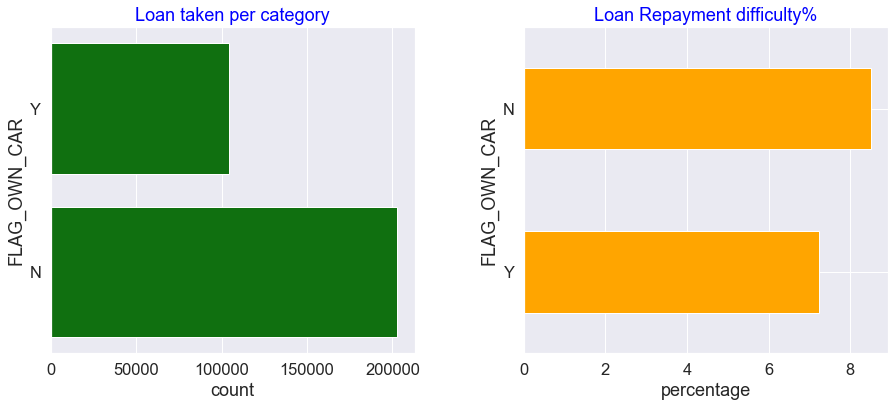

In [756]:
plot_loan_and_repyment('FLAG_OWN_CAR',crosstab_df,appsubset_df.sort_values(by='FLAG_OWN_CAR',ascending=False))

## Observations from above plot
- Maximum loan loan applications are by people who dont own car - 202924
    - Within these 8.5% have difficulty in repayment of loans
- Loan applications by people who own car - 104587
    - Within these 7.24% have difficulty in repayment of loans
- <b><font size = 3 color = "blue">In terms of default percentage within each category, People who don't own car have highest difficulty in loan repayments (8.5%)</font></b>

## Lets analyse housing situtaion of people who have applied for loans and if they have difficulty while repayment<a id='Analyse Housing Situation'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [757]:
## Check for missing/null values of HOUSING Type column
appsubset_df['NAME_HOUSING_TYPE'].isnull().sum()

0

From above it can be seen that there is no null value for Housing Type

In [758]:
appsubset_df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents           14840 
Municipal apartment    11183 
Rented apartment       4881  
Office apartment       2617  
Co-op apartment        1122  
Name: NAME_HOUSING_TYPE, dtype: int64

In [759]:
crosstab_df = pd.crosstab(appsubset_df['TARGET'],
            appsubset_df['NAME_HOUSING_TYPE']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

NAME_HOUSING_TYPE  Co-op apartment  House / apartment  Municipal apartment  \
TARGET                                                                       
0                  92.07            92.2               91.46                 
1                  7.93             7.8                8.54                  

NAME_HOUSING_TYPE  Office apartment  Rented apartment  With parents  
TARGET                                                               
0                  93.43             87.69             88.3          
1                  6.57              12.31             11.7

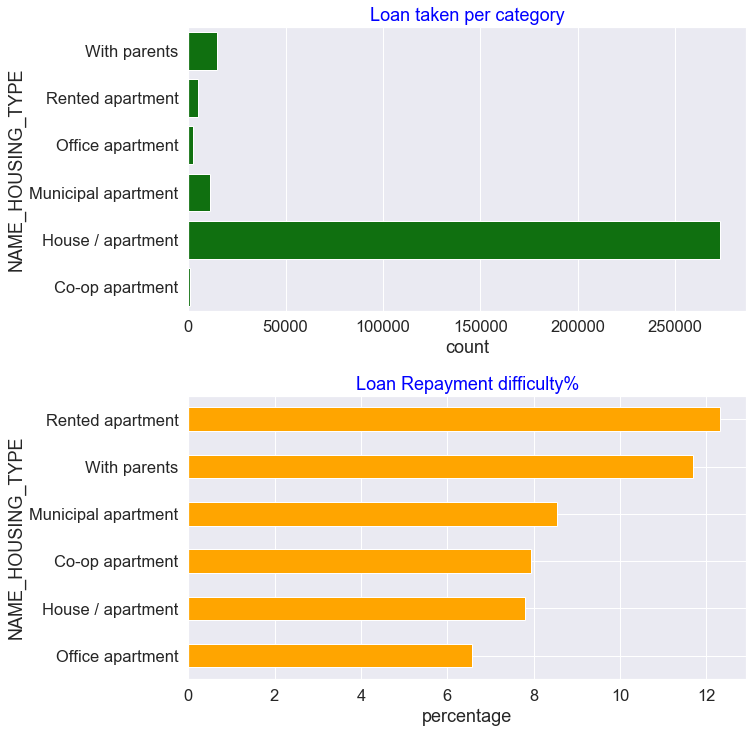

In [760]:
plot_loan_and_repyment('NAME_HOUSING_TYPE',crosstab_df,appsubset_df.sort_values(
    by='NAME_HOUSING_TYPE',ascending=False),True,6)

## Observations from above plot
- Maximum loan is taken by people who own House/apartment - 272868 
    - Within these 7.8% have difficulty in repayment of loans
- People who live with parents are socond highest in taking loan - 14840
    - Within these 11.7% have difficulty in repayment of loans
- Third highest to take loan are the people who live in Municipal Apartment - 1183
    - Within these 8.54% have difficulty in repayment of loans
- Fourth highest to take loan are the people who live in Rented Apartment - 4881
    - Within these 12.31% have difficulty in repayment of loans
- <b><font size = 3 color = "blue">Even though maximum number of loans is taken by people who own House/Apartment but in terms of loan default percentage within each category, people living in rented apartments have major difficulty in loan repayment (12.31%)</font></b>

# Lets analyse Eduction type of people who have applied for loans and if they have difficulty while loan repayment<a id='Analyse Education Type'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [761]:
## Check for missing/null values of Education Type column
appsubset_df['NAME_EDUCATION_TYPE'].isnull().sum()

0

From above it can be seen that there is no null value for Education Type

In [762]:
appsubset_df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                 74863 
Incomplete higher                10277 
Lower secondary                  3816  
Academic degree                  164   
Name: NAME_EDUCATION_TYPE, dtype: int64

In [763]:
crosstab_df = pd.crosstab(appsubset_df['TARGET'],
            appsubset_df['NAME_EDUCATION_TYPE']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

NAME_EDUCATION_TYPE  Academic degree  Higher education  Incomplete higher  \
TARGET                                                                      
0                    98.17            94.64             91.52               
1                    1.83             5.36              8.48                

NAME_EDUCATION_TYPE  Lower secondary  Secondary / secondary special  
TARGET                                                               
0                    89.07            91.06                          
1                    10.93            8.94

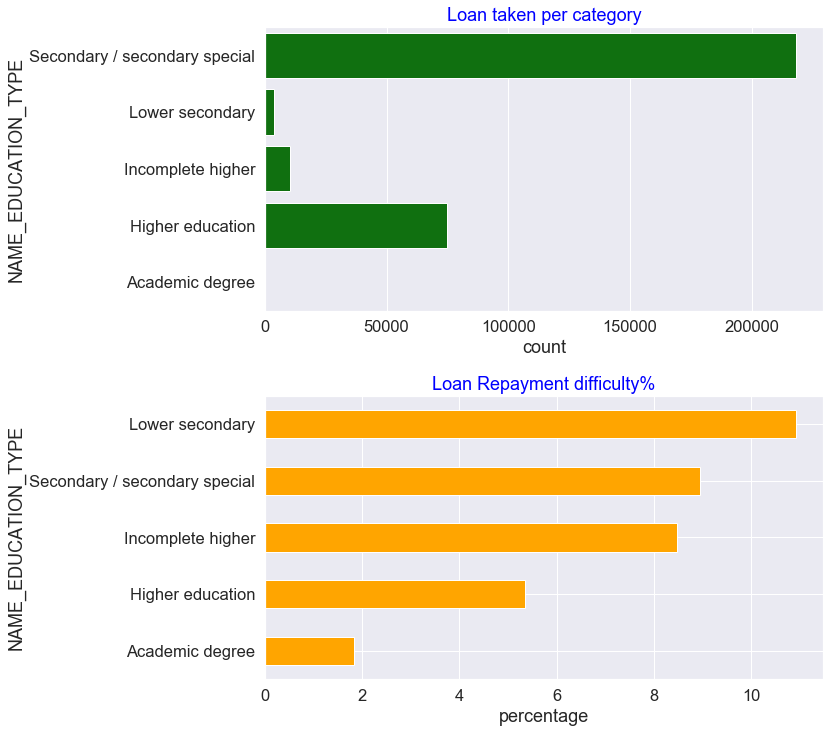

In [764]:
plot_loan_and_repyment('NAME_EDUCATION_TYPE',crosstab_df,appsubset_df.sort_values(
    by='NAME_EDUCATION_TYPE',ascending=False),True,6)

## Observations from above plot
- Maximum loan is taken by people education background as Secondary / secondary special - 218391 
    - Within these 8.94% have difficulty in repayment of loans
- People with Higher education background are socond highest in taking loan - 74863
    - Within these 5.36% have difficulty in repayment of loans
- Third highest to take loan are the people with Incomplete higher eductaion - 10277
    - Within these 8.48% have difficulty in repayment of loans
- Fourth highest to take loan are the people who have Lower secondary education background - 3816
    - Within these 10.93% have difficulty in repayment of loans
- <b><font size = 3 color = "blue">Even though maximum number of loans is taken by people with Secondary / secondary special education background but in terms of loan default percentage within each category, people with Lower secondary education background have major difficulty in loan repayment (10.93%)</font></b>

# Lets analyse family status of people who have applied for loans and if they have difficulty while repayment<a id='Analyse Family Status'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [765]:
## Check for missing/null values of Family Status column
appsubset_df['NAME_FAMILY_STATUS'].isnull().sum()

0

From above it can be seen that there is no null value for Family Status

In [766]:
appsubset_df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married    45444 
Civil marriage          29775 
Separated               19770 
Widow                   16088 
Unknown                 2     
Name: NAME_FAMILY_STATUS, dtype: int64

In [767]:
crosstab_df = pd.crosstab(appsubset_df['TARGET'],
            appsubset_df['NAME_FAMILY_STATUS']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

NAME_FAMILY_STATUS  Civil marriage  Married  Separated  Single / not married  \
TARGET                                                                         
0                   90.06           92.44    91.81      90.19                  
1                   9.94            7.56     8.19       9.81                   

NAME_FAMILY_STATUS  Unknown  Widow  
TARGET                              
0                   100.0    94.18  
1                   0.0      5.82

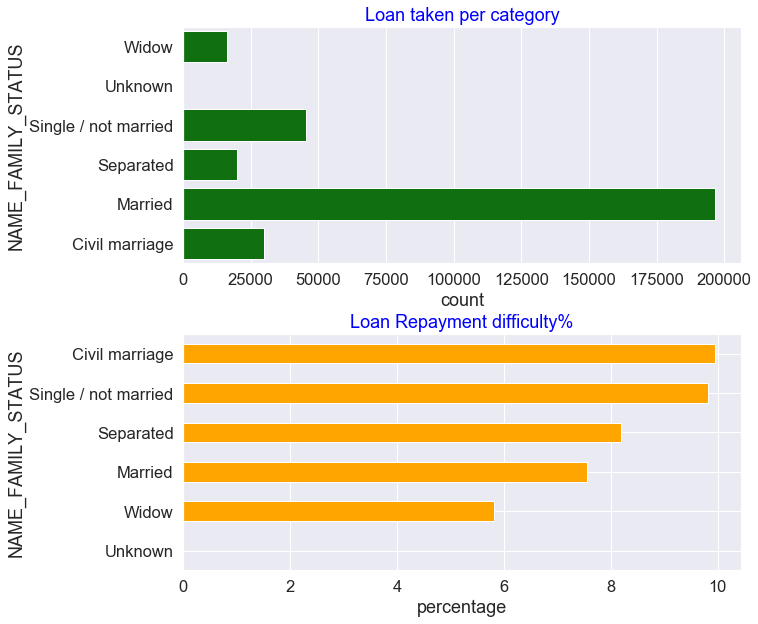

In [768]:
plot_loan_and_repyment('NAME_FAMILY_STATUS',crosstab_df,appsubset_df.sort_values(
    by='NAME_FAMILY_STATUS',ascending=False),True,5)

## Observations from above plot
- Maximum loan is taken by people who are married - 196432
    - Out of these 7.56% have difficulty in repayment of loans
- Single/not married are socond highest in taking loan - 45444
    - Out of these 9.81% have difficulty in repayment of loans
- Third highest to take loan are the people who have Civil Marriage - 29775
    - Out of these 9.94% have difficulty in repayment of loans
- <b><font size = 3 color = "blue">Even though maximum number of loans is taken by Married people but in terms of loan default percentage within each category, Civil Marriage category people have major difficulty in loan repayment (9.94%)</font></b>

## Check if there are any missing/null values for Occupation Type<a id='Analyse Occupation Type'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [769]:
print('Total number of null values for OCCUPATION TYPE: {0}'.format(appsubset_df['OCCUPATION_TYPE'].isnull().sum()))

Total number of null values for OCCUPATION TYPE: 96391


In [770]:
## Look for observations where OCCUPATION  TYPE is null
appsubset_df[appsubset_df['OCCUPATION_TYPE'].isnull()]['TARGET'].value_counts()

0    90113
1    6278 
Name: TARGET, dtype: int64

### From above cell it can be seen that there are many people(repayers/defaulters) whose Occupation Type has not been recorded. Perhaps it might not be the primary detector for loan approval process. Could be income type as one of the factor for loan approval process. So we will not impute the values as of now and will leave the data for OCCUPATION TYPE as it is and will plot for visualization

In [771]:
## Lets look for the number of observations in each bin for target 1 and 0
appsubset_df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants              9813 
Medicine staff           8537 
Security staff           6721 
Cooking staff            5946 
Cleaning staff           4653 
Private service staff    2652 
Low-skill Laborers       2093 
Waiters/barmen staff     1348 
Secretaries              1305 
Realty agents            751  
HR staff                 563  
IT staff                 526  
Name: OCCUPATION_TYPE, dtype: int64

In [772]:
occupation_count = appsubset_df['OCCUPATION_TYPE'].count()
appsubset_df.groupby('OCCUPATION_TYPE').apply(lambda x: x.count(0)/occupation_count)[['OCCUPATION_TYPE']].rename(
    columns={'OCCUPATION_TYPE':'OCCUPATION'}).sort_values('OCCUPATION',ascending=False)

OCCUPATION
OCCUPATION_TYPE                  
Laborers               0.261396  
Sales staff            0.152056  
Core staff             0.130589  
Managers               0.101227  
Drivers                0.088116  
High skill tech staff  0.053903  
Accountants            0.046481  
Medicine staff         0.040437  
Security staff         0.031835  
Cooking staff          0.028164  
Cleaning staff         0.022040  
Private service staff  0.012562  
Low-skill Laborers     0.009914  
Waiters/barmen staff   0.006385  
Secretaries            0.006181  
Realty agents          0.003557  
HR staff               0.002667  
IT staff               0.002491

In [773]:
crosstab_df = pd.crosstab(appsubset_df['TARGET'],
            appsubset_df['OCCUPATION_TYPE']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

OCCUPATION_TYPE  Accountants  Cleaning staff  Cooking staff  Core staff  \
TARGET                                                                    
0                95.17        90.39           89.56          93.7         
1                4.83         9.61            10.44          6.3          

OCCUPATION_TYPE  Drivers  HR staff  High skill tech staff  IT staff  Laborers  \
TARGET                                                                          
0                88.67    93.61     93.84                  93.54     89.42      
1                11.33    6.39      6.16                   6.46      10.58      

OCCUPATION_TYPE  Low-skill Laborers  Managers  Medicine staff  \
TARGET                                                          
0                82.85               93.79     93.3             
1                17.15               6.21      6.7              

OCCUPATION_TYPE  Private service staff  Realty agents  Sales staff  \
TARGET                                                               
0                93.4                   92.14          90.37         
1                6.6                    7.86           9.63          

OCCUPATION_TYPE  Secretaries  Security staff  Waiters/barmen staff  
TARGET                                                              
0                92.95        89.26           88.72                 
1                7.05         10.74           11.28

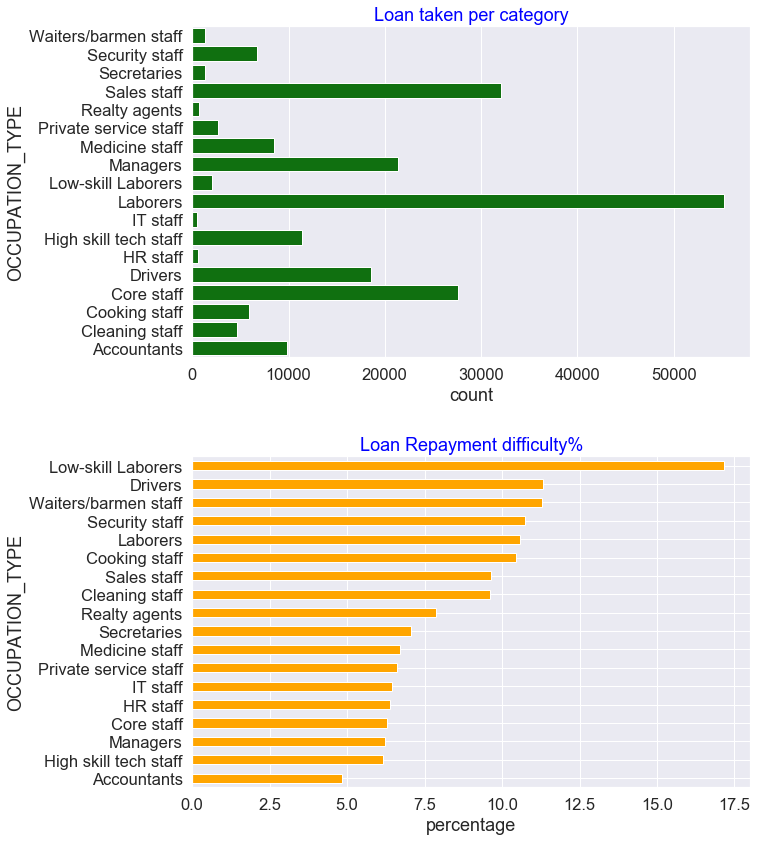

In [774]:
plot_loan_and_repyment('OCCUPATION_TYPE',crosstab_df,appsubset_df.sort_values(
    by='OCCUPATION_TYPE',ascending=False),True,7)

## Observations from above plot
- Maximum loan is taken by People with Occupation Type Laborers - 55186
    - Within these 10.58% have difficulty in repayment of loans
- Second highest to take loan are the people with Occupation Type Sales Staff - 32102
    - Within these 9.63% have difficulty in repayment of loans
- Core Staff are third in number to take loan - 27570
    - Within these 6.3% have difficulty in repayment of loans
- Managers are fourth in number to take loan - 21371
    - Within these 6.21% have difficulty in repayment of loans
- Drivers are fifth in number to take loan - 18603
    - Within these 11.33% have difficulty in repayment of loans
- Low-skill Laborers are 13th in number to take loan - 2093
    - Within these 17.15% have difficulty in repayment of loans
- <b><font size = 3 color = "blue"> Even though maximum number of loan taken is by Laborers but in terms of loan repayment within each category, Low-skill Laborers category has the highest issues of loan repayment (17.15%)</font></b>

# Lets check for Income Type feature and see how many defaults are there for each Income Type<a id='Analyse Income Type'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>


### Lets check for null values first

In [775]:
print('Total number of null values for INCOME TYPE: {0}'.format(appsubset_df['NAME_INCOME_TYPE'].isnull().sum()))


Total number of null values for INCOME TYPE: 0


In [776]:
appsubset_df['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate    71617 
Pensioner               55362 
State servant           21703 
Unemployed              22    
Student                 18    
Businessman             10    
Maternity leave         5     
Name: NAME_INCOME_TYPE, dtype: int64

In [777]:
incometype_count = appsubset_df['NAME_INCOME_TYPE'].count()
appsubset_df.groupby('NAME_INCOME_TYPE').apply(
    lambda x: x.count(0)/incometype_count)[['NAME_INCOME_TYPE']].rename(
    columns={'NAME_INCOME_TYPE':'INCOME_TYPE'}).sort_values('INCOME_TYPE',ascending=False)

INCOME_TYPE
NAME_INCOME_TYPE                 
Working               0.516320   
Commercial associate  0.232892   
Pensioner             0.180033   
State servant         0.070576   
Unemployed            0.000072   
Student               0.000059   
Businessman           0.000033   
Maternity leave       0.000016

In [778]:
crosstab_df = pd.crosstab(appsubset_df['TARGET'],
            appsubset_df['NAME_INCOME_TYPE']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
0                 100.0        92.52                 60.0              
1                 0.0          7.48                  40.0              

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed  Working  
TARGET                                                                    
0                 94.61      94.25          100.0    63.64       90.41    
1                 5.39       5.75           0.0      36.36       9.59

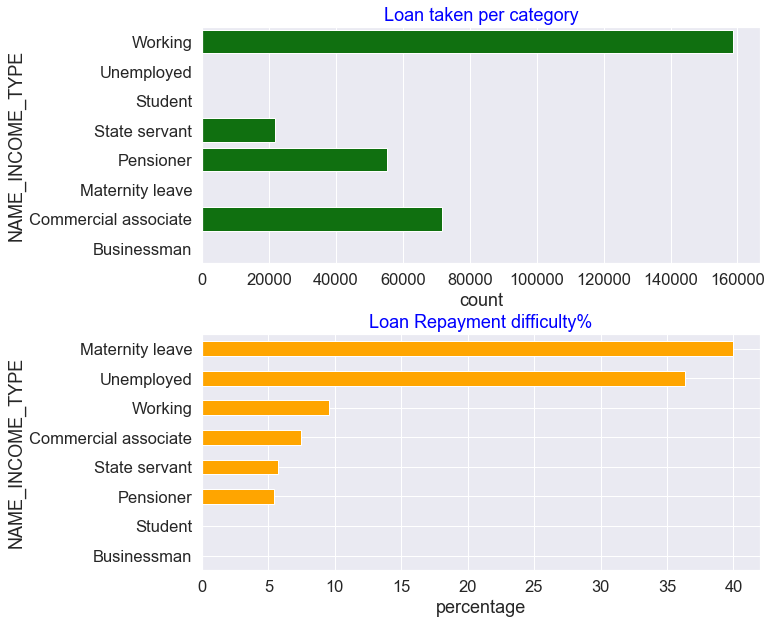

In [779]:
plot_loan_and_repyment('NAME_INCOME_TYPE',crosstab_df,appsubset_df.sort_values(
    by='NAME_INCOME_TYPE',ascending=False),True,5)

## Observations from above plot
- Working professionals category apply more for loan - 158774
    - Within these difficulty in loan repayment - 9.59%
- Commercial asscociate is the income type with second highest in loan applications - 71617
    - Within these difficulty in loan repayment - 7.48%
- Pensioner income type is the third highest in loan applications - 55362
    - Within these difficulty in loan repayment - 5.39%
- State servant is the fourth highest in loan applications - 21703
    - Within these difficulty in loan repayment - 5.75%
- Unemployed is the fifth highest in loan applications - 22
    - Within these difficulty in loan repayment - 36.36%
- Loan taken by ladies on maternity leave - 5
    - Within these difficulty in loan repayment - 40%
- <b><font size = 3 color = "blue">Even though the Working Professionals have taken maximum number of loans but within each category ladies with Maternity Leave face maximum difficulties in loan repayment (40%)</font></b>

# Lets check for Organization Type for defaulters<a id='Analyse Organization Type'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>


### Lets look for null values first

In [780]:
print('Total number of null values for ORGANIZATION TYPE: {0}'.format(appsubset_df['ORGANIZATION_TYPE'].isnull().sum()))

Total number of null values for ORGANIZATION TYPE: 0


In [781]:
appsubset_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                    8893 
Trade: type 7             7831 
Kindergarten              6880 
Construction              6721 
Business Entity Type 1    5984 
Transport: type 4         5398 
Trade: type 3             3492 
Industry: type 9          3368 
Industry: type 3          3278 
Security                  3247 
Housing                   2958 
Industry: type 11         2704 
Military                  2634 
Bank                      2507 
Agriculture               2454 
Police                    2341 
Transport: type 2         2204 
Postal                    2157 
Security Ministries       1974 
Trade: type 2             1900 
Restaurant                1811 
Services                  1575 
University                1327 
Industry: type 7          1307 
Transpor

In [782]:
organization_count = appsubset_df['ORGANIZATION_TYPE'].count()
appsubset_df.groupby('ORGANIZATION_TYPE').apply(
    lambda x: x.count(0)/organization_count)[['ORGANIZATION_TYPE']].rename(
    columns={'ORGANIZATION_TYPE':'ORGANIZATION'}).sort_values('ORGANIZATION',ascending=False)

ORGANIZATION
ORGANIZATION_TYPE                   
Business Entity Type 3  0.221104    
XNA                     0.180072    
Self-employed           0.124913    
Other                   0.054252    
Medicine                0.036399    
Business Entity Type 2  0.034317    
Government              0.033833    
School                  0.028919    
Trade: type 7           0.025466    
Kindergarten            0.022373    
Construction            0.021856    
Business Entity Type 1  0.019459    
Transport: type 4       0.017554    
Trade: type 3           0.011356    
Industry: type 9        0.010952    
Industry: type 3        0.010660    
Security                0.010559    
Housing                 0.009619    
Industry: type 11       0.008793    
Military                0.008566    
Bank                    0.008153    
Agriculture             0.007980    
Police                  0.007613    
Transport: type 2       0.007167    
Postal                  0.007014    
Security Ministries     0.006419    
Trade: type 2           0.006179    
Restaurant              0.005889    
Services                0.005122    
University              0.004315    
Industry: type 7        0.004250    
Transport: type 3       0.003860    
Industry: type 1        0.003379    
Hotel                   0.003141    
Electricity             0.003089    
Industry: type 4        0.002852    
Trade: type 6           0.002052    
Industry: type 5        0.001948    
Insurance               0.001941    
Telecom                 0.001876    
Emergency               0.001821    
Industry: type 2        0.001489    
Advertising             0.001395    
Realtor                 0.001288    
Culture                 0.001232    
Industry: type 12       0.001200    
Trade: type 1           0.001132    
Mobile                  0.001031    
Legal Services          0.000992    
Cleaning                0.000845    
Transport: type 1       0.000654    
Industry: type 6        0.000364    
Industry: type 10       0.000354    
Religion                0.000276    
Industry: type 13       0.000218    
Trade: type 4           0.000208    
Trade: type 5           0.000159    
Industry: type 8        0.000078

In [783]:
crosstab_df = pd.crosstab(appsubset_df['TARGET'],
            appsubset_df['ORGANIZATION_TYPE']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

ORGANIZATION_TYPE  Advertising  Agriculture   Bank  Business Entity Type 1  \
TARGET                                                                       
0                  91.84        89.53        94.81  91.86                    
1                  8.16         10.47        5.19   8.14                     

ORGANIZATION_TYPE  Business Entity Type 2  Business Entity Type 3  Cleaning  \
TARGET                                                                        
0                  91.47                   90.7                    88.85      
1                  8.53                    9.3                     11.15      

ORGANIZATION_TYPE  Construction  Culture  Electricity  Emergency  Government  \
TARGET                                                                         
0                  88.32         94.46    93.37        92.86      93.02        
1                  11.68         5.54     6.63         7.14       6.98         

ORGANIZATION_TYPE  Hotel  Housing  Industry: type 1  Industry: type 10  \
TARGET                                                                   
0                  93.58  92.06    88.93             93.58               
1                  6.42   7.94     11.07             6.42                

ORGANIZATION_TYPE  Industry: type 11  Industry: type 12  Industry: type 13  \
TARGET                                                                       
0                  91.35              96.21              86.57               
1                  8.65               3.79               13.43               

ORGANIZATION_TYPE  Industry: type 2  Industry: type 3  Industry: type 4  \
TARGET                                                                    
0                  92.79             89.38             89.85              
1                  7.21              10.62             10.15              

ORGANIZATION_TYPE  Industry: type 5  Industry: type 6  Industry: type 7  \
TARGET                                                                    
0                  93.16             92.86             91.97              
1                  6.84              7.14              8.03               

ORGANIZATION_TYPE  Industry: type 8  Industry: type 9  Insurance  \
TARGET                                                             
0                  87.5              93.32             94.3        
1                  12.5              6.68              5.7         

ORGANIZATION_TYPE  Kindergarten  Legal Services  Medicine  Military  Mobile  \
TARGET                                                                        
0                  92.97         92.13           93.42     94.87     90.85    
1                  7.03          7.87            6.58      5.13      9.15     

ORGANIZATION_TYPE  Other  Police  Postal  Realtor  Religion  Restaurant  \
TARGET                                                                    
0                  92.36  95.0    91.56   89.39    94.12     88.29        
1                  7.64   5.0     8.44    10.61    5.88      11.71        

ORGANIZATION_TYPE  School  Security  Security Ministries  Self-employed  \
TARGET                                                                    
0                  94.09   90.02     95.14                89.83           
1                  5.91    9.98      4.86                 10.17           

ORGANIZATION_TYPE  Services  Telecom  Trade: type 1  Trade: type 2  \
TARGET                                                               
0                  93.4      92.37    91.09          93.0            
1                  6.6       7.63     8.91           7.0             

ORGANIZATION_TYPE  Trade: type 3  Trade: type 4  Trade: type 5  Trade: type 6  \
TARGET                                                                          
0                  89.66          96.88          93.88          95.4            
1                  10.34          3.12           6.12           4.6             

ORGANIZATION_TYPE  Trade: type 7  Trans

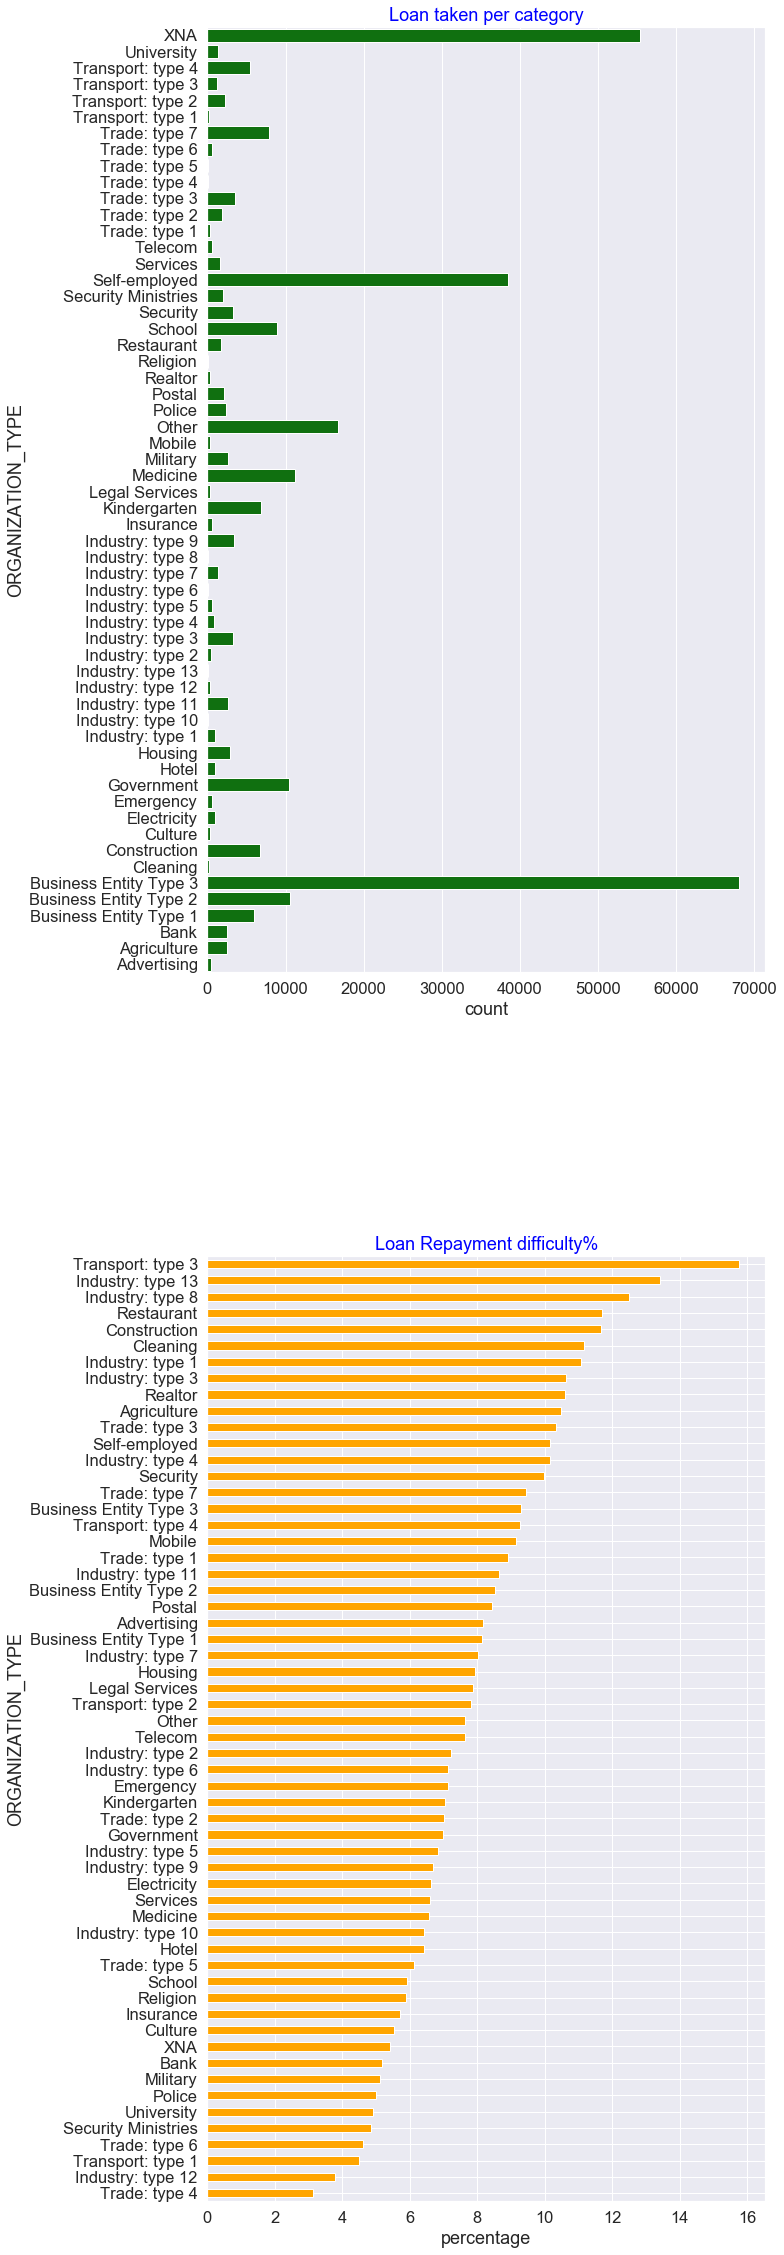

In [784]:
plot_loan_and_repyment('ORGANIZATION_TYPE',crosstab_df,appsubset_df.sort_values(
    by='ORGANIZATION_TYPE',ascending=False),True,20)

## Observations from above plot
- People with Organization type Business Entity Type 3 apply more for loan - 67992
    - Within these difficulty in loan repayment - 9.3%
- People with Organization type XNA are second highest in applying for loan - 55374
    - Within these difficulty in loan repayment - 5.4%
- Self Employed are with third highest in loan applications - 38412
    - Within these difficulty in loan repayment - 10.17%
- Other income type is the third highest in loan applications - 16683
    - Within these difficulty in loan repayment - 7.64%
- Medicine is the fourth highest in loan applications - 11193
    - Within these difficulty in loan repayment - 6.58%
- Unemployed is the fifth highest in loan applications - 10553
    - Within these difficulty in loan repayment - 36.36%
- Transport Type 3 loan applications percentage - 10404
    - Within these difficulty in loan repayment - 15.75%
- <b><font size = 3 color = "blue">Even though maximum number of loans is taken by people in Business Entity Type 3 but within each category Transport Type3 face maximum difficulties in loan repayment (15.75%)</font></b>

# Lets analyse for Days_Employed to see the employment of person<a id='Analyse Days Employed'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>


In [785]:
appsubset_df['DAYS_EMPLOYED'].isnull().sum()

0

Above cell shows that there are no observations with null values for Days of employment

## Lets further check for information available for DAYS_EMPLOYED feature in dataset

In [786]:
#check for datatype of DAYS_EMPLOYED column
appsubset_df['DAYS_EMPLOYED'].dtype

dtype('int64')

In [787]:
appsubset_df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean     63815.045904 
std      141275.766519
min     -17912.000000 
25%     -2760.000000  
50%     -1213.000000  
75%     -289.000000   
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

### From above cell maximum value of DAYS_EMPLOYED is 365243 while minimum value is -17912
- Its a very strange value that we have extreme positive value as well extreme negative value

### Lets plot distribution to understand more about DAYS_EMPLOYED

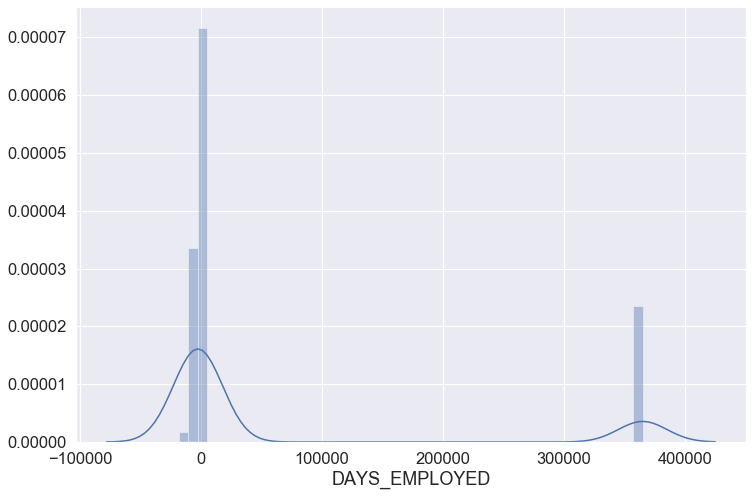

In [788]:
bandwidth=20000
plt.figure(figsize=(12,8))
sns.distplot(appsubset_df['DAYS_EMPLOYED'],kde_kws={"bw":bandwidth});

In [789]:
print('Number of observation with DAYS EMPLOYED less than 0: {0}'.
      format(appsubset_df[appsubset_df['DAYS_EMPLOYED']<0]['DAYS_EMPLOYED'].count()))
print('Number of observation with DAYS EMPLOYED equal to 0: {0}'.
      format(appsubset_df[appsubset_df['DAYS_EMPLOYED']==0]['DAYS_EMPLOYED'].count()))
print('Number of observation with DAYS EMPLOYED greater than 0: {0}'.
      format(appsubset_df[appsubset_df['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].count()))

Number of observation with DAYS EMPLOYED less than 0: 252135
Number of observation with DAYS EMPLOYED equal to 0: 2
Number of observation with DAYS EMPLOYED greater than 0: 55374


## Observation from above plot
- Clearly there are outliers between the range of [300000,400000]
- There are two spikes that can be seen with kde bandwidth of 20000
- Maximum observations are within the range of [-100000,100000]
- With statistics
    - There are many observations(252135) where DAYS_EMPLOYED values are less than 0
    - There are few observations(2) where DAYS_EMPLOYED values are equal to 0
    - There are many observations(55374) where DAYS_EMPLOYED values are greater than 0

## Lets look for what is the employmenyt type for such DAYS_EMPLOYED observations

In [790]:
## OCCUPATION TYPE when DAYS_EMPLOYED<0
appsubset_df[appsubset_df['DAYS_EMPLOYED']<0]['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32101
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants              9813 
Medicine staff           8537 
Security staff           6721 
Cooking staff            5946 
Cleaning staff           4651 
Private service staff    2652 
Low-skill Laborers       2093 
Waiters/barmen staff     1348 
Secretaries              1305 
Realty agents            751  
HR staff                 563  
IT staff                 526  
Name: OCCUPATION_TYPE, dtype: int64

In [791]:
## OCCUPATION TYPE when DAYS_EMPLOYED==0
appsubset_df[appsubset_df['DAYS_EMPLOYED']==0]['OCCUPATION_TYPE'].value_counts()

Sales staff    1
Name: OCCUPATION_TYPE, dtype: int64

In [792]:
## OCCUPATION TYPE when DAYS_EMPLOYED>0
appsubset_df[appsubset_df['DAYS_EMPLOYED']>0]['OCCUPATION_TYPE'].value_counts()

Cleaning staff    2
Name: OCCUPATION_TYPE, dtype: int64

## Lets further drill down and check on Income Type for these DAYS_EMPLOYED mysterious values

In [793]:
## OCCUPATION TYPE when DAYS_EMPLOYED<0
appsubset_df[appsubset_df['DAYS_EMPLOYED']<0]['NAME_INCOME_TYPE'].value_counts()

Working                 158772
Commercial associate    71617 
State servant           21703 
Student                 18    
Pensioner               10    
Businessman             10    
Maternity leave         5     
Name: NAME_INCOME_TYPE, dtype: int64

In [794]:
## OCCUPATION TYPE when DAYS_EMPLOYED==0
appsubset_df[appsubset_df['DAYS_EMPLOYED']==0]['NAME_INCOME_TYPE'].value_counts()

Working    2
Name: NAME_INCOME_TYPE, dtype: int64

In [795]:
## OCCUPATION TYPE when DAYS_EMPLOYED>0
appsubset_df[appsubset_df['DAYS_EMPLOYED']>0]['NAME_INCOME_TYPE'].value_counts()

Pensioner     55352
Unemployed    22   
Name: NAME_INCOME_TYPE, dtype: int64

## Observations for DAYS_EMPLOYED
- There are 55352 people who are pensioners who are not working since the DAYS_EMPLOYED >0
    - However there are 10 people who are pensioners who are still working with DAYS_EMPLOYED<0. Perhaps these people are working on contract after retirement
- There are 22 people who are unemployed with DAYS_EMPLOYED > 0

In [796]:
# plt.figure(figsize=(14,8));
# sns.lmplot('AMT_ANNUITY','AMT_GOODS_PRICE',data=appsubset_df,hue='TARGET');
# plt.title('Plot between AMT_GOODS_PRICE and AMT_ANNUITY',color='blue');

# Bivariate Analysis<a id='Bivariate Analysis'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

# Lets plot in which hours of day most of the loans were applied<a id='Peak Hours and Days'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [797]:
contract_count = appsubset_df['WEEKDAY_APPR_PROCESS_START'].count()
appsubset_df.groupby('WEEKDAY_APPR_PROCESS_START').apply(lambda x: x.count(0)/contract_count)[['WEEKDAY_APPR_PROCESS_START']]

WEEKDAY_APPR_PROCESS_START
WEEKDAY_APPR_PROCESS_START                            
FRIDAY                      0.163695                  
MONDAY                      0.164918                  
SATURDAY                    0.110084                  
SUNDAY                      0.052619                  
THURSDAY                    0.164518                  
TUESDAY                     0.175282                  
WEDNESDAY                   0.168885

In [798]:
## Lets groupby loan types and check different loan approval status percentage in each loan category
crosstab_df = pd.crosstab(appsubset_df['WEEKDAY_APPR_PROCESS_START'],
            appsubset_df['HOUR_APPR_PROCESS_START']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

HOUR_APPR_PROCESS_START        0      1      2      3      4      5      6  \
WEEKDAY_APPR_PROCESS_START                                                   
FRIDAY                      25.0  16.28  15.41  19.35  17.56  16.74  16.26   
MONDAY                      17.5  15.12  16.39  14.39  16.65  15.81  16.48   
SATURDAY                    5.0   9.30   6.56   12.44  12.49  11.76  12.68   
SUNDAY                      12.5  3.49   3.93   5.04   5.17   5.20   5.07    
THURSDAY                    17.5  20.93  20.00  15.28  15.69  15.89  15.75   
TUESDAY                     10.0  13.95  20.00  16.50  16.65  18.61  17.20   
WEDNESDAY                   12.5  20.93  17.70  16.99  15.79  16.00  16.55   

HOUR_APPR_PROCESS_START         7      8      9     10     11     12     13  \
WEEKDAY_APPR_PROCESS_START                                                    
FRIDAY                      16.62  16.25  16.90  15.71  15.63  15.91  16.04   
MONDAY                      16.36  16.42  16.12  15.42  16.12  15.98  16.13   
SATURDAY                    12.02  13.14  10.05  13.55  12.95  12.64  11.34   
SUNDAY                      5.60   5.31   4.27   6.11   6.22   6.23   5.89    
THURSDAY                    15.83  16.02  16.82  15.91  16.15  15.77  16.63   
TUESDAY                     16.84  16.71  18.08  16.84  16.93  17.30  17.36   
WEDNESDAY                   16.72  16.15  17.75  16.48  16.00  16.16  16.60   

HOUR_APPR_PROCESS_START        14     15     16     17     18     19     20  \
WEEKDAY_APPR_PROCESS_START                                                    
FRIDAY                      16.56  16.97  17.64  16.90  16.93  16.48  15.13   
MONDAY                      16.68  17.29  17.57  17.83  19.26  18.30  16.81   
SATURDAY                    10.32  9.39   8.17   7.04   4.10   4.91   9.20    
SUNDAY                      5.34   4.73   3.98   2.91   2.54   4.26   7.02    
THURSDAY                    16.75  16.84  16.94  17.42  17.88  17.62  16.05   
TUESDAY                     17.34  17.65  18.08  19.18  20.44  19.05  17.98   
WEDNESDAY                   17.01  17.14  17.62  18.72  18.84  19.39  17.81   

HOUR_APPR_PROCESS_START        21     22     23  
WEEKDAY_APPR_PROCESS_START                       
FRIDAY                      12.59  16.67  17.07  
MONDAY                      16.05  24.67  12.20  
SATURDAY                    11.36  8.67   2.44   
SUNDAY                      11.36  10.00  19.51  
THURSDAY                    13.58  20.00  26.83  
TUESDAY                     17.28  12.00  14.63  
WEDNESDAY                   17.78  8.00   7.32

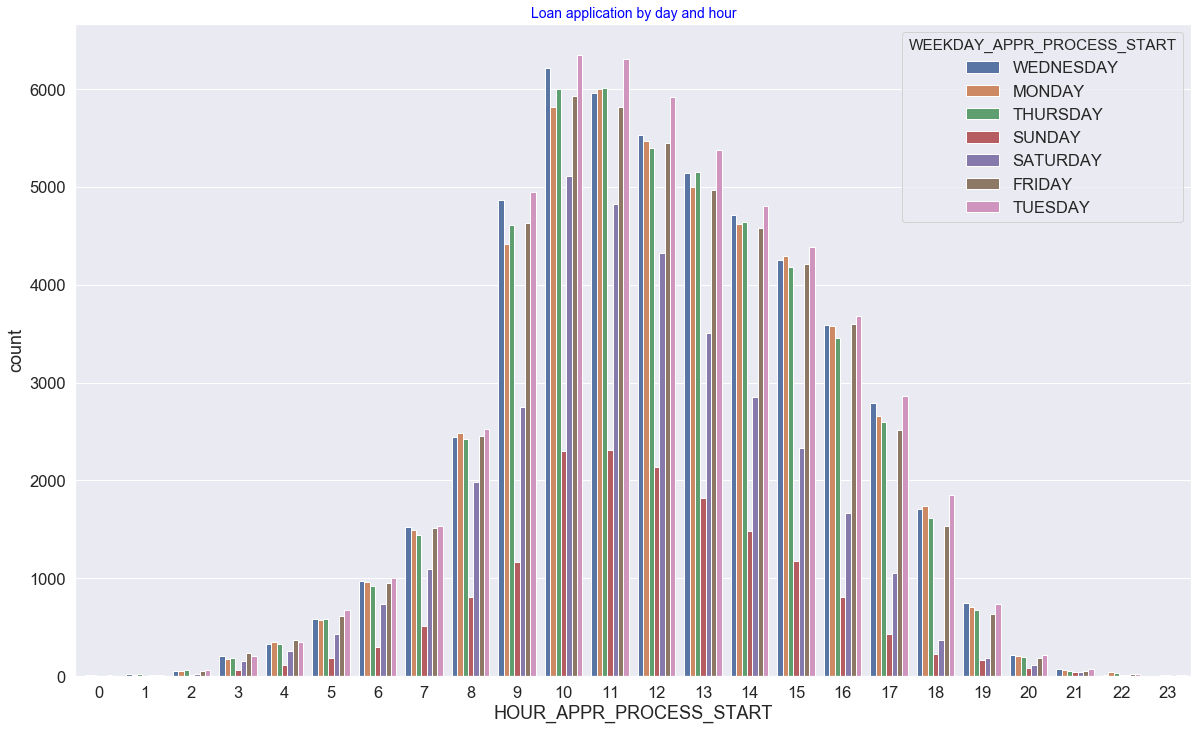

In [799]:
plt.figure(figsize=(20,12))
plt.title('Loan application by day and hour',color='blue',fontsize=14)
sns.countplot(x='HOUR_APPR_PROCESS_START',data=appsubset_df,hue='WEEKDAY_APPR_PROCESS_START');

## Observations from above plot
- The loans were applied mainly on Tuesday (17.53%) followed by Wednesday(16.89%)
- 9am - 2pm are peak hours for loan application

# Lets Plot Income Type and Car Ownership<a id='Income Type and Car Ownership'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [800]:
appsubset_df['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate    71617 
Pensioner               55362 
State servant           21703 
Unemployed              22    
Student                 18    
Businessman             10    
Maternity leave         5     
Name: NAME_INCOME_TYPE, dtype: int64

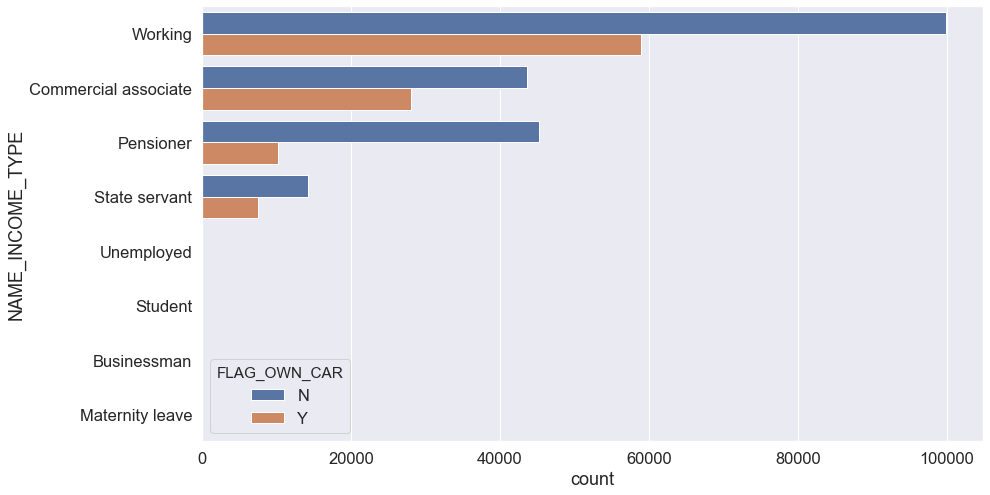

In [801]:
plt.figure(figsize=(14,8))
sns.countplot(y='NAME_INCOME_TYPE', hue='FLAG_OWN_CAR', data=appsubset_df,
             order = appsubset_df['NAME_INCOME_TYPE'].value_counts().index);

## Observations from above plot
-<b><font size = 3 color = "blue"> Working Professionals(158774) mostly own car followed by Commercial associates(71617) and then pensioner(55362)</font></b>

# Lets plot relationship between Gender and their Income types<a id='Gender and Income Type'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [802]:
organization_count = appsubset_df['CODE_GENDER'].count()
appsubset_df.groupby('CODE_GENDER').apply(
    lambda x: x.count(0)/organization_count)[['CODE_GENDER']].rename(
    columns={'CODE_GENDER':'GENDER'}).sort_values('GENDER',ascending=False)

GENDER
CODE_GENDER          
F            0.658344
M            0.341643
XNA          0.000013

In [803]:
## Lets groupby loan types and check different loan approval status percentage in each loan category
crosstab_df = pd.crosstab(appsubset_df['CODE_GENDER'],
            appsubset_df['NAME_INCOME_TYPE']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
CODE_GENDER                                                            
F                 30.0         62.16                 80.0              
M                 70.0         37.84                 20.0              
XNA               0.0          0.00                  0.0               

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed  Working  
CODE_GENDER                                                               
F                 81.75      73.06          38.89    77.27       60.96    
M                 18.25      26.94          61.11    22.73       39.04    
XNA               0.00       0.00           0.00     0.00        0.00

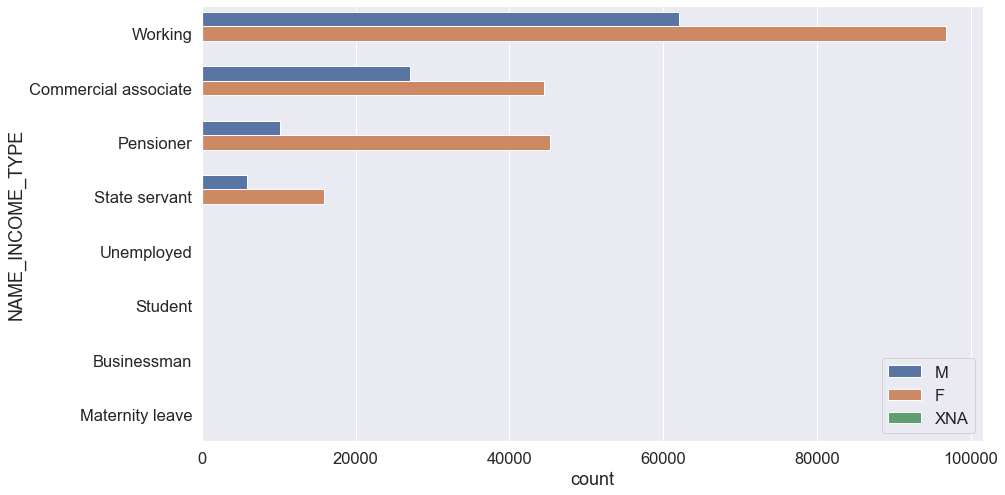

In [804]:
plt.figure(figsize=(14,8))
sns.countplot(y='NAME_INCOME_TYPE', hue='CODE_GENDER', data=appsubset_df,
              order = appsubset_df['NAME_INCOME_TYPE'].value_counts().index);
plt.legend(loc='lower right')

## Observations from above plot
-<b><font size = 3 color = "blue"> Females are more in all fields - working profession, Commercial associate, Pensioner in comparison to men</font></b>

# Lets plot who accompanied during loan application<a id='Accompanied during loan application'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

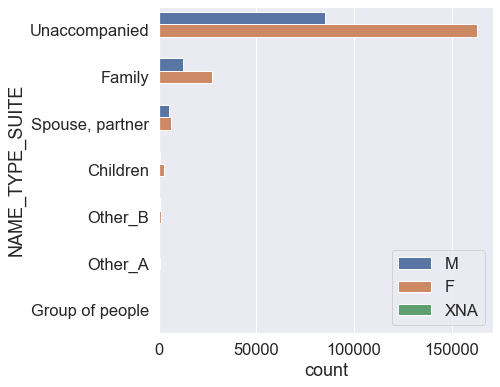

In [805]:
plt.figure(figsize=(6,6))
sns.countplot(y='NAME_TYPE_SUITE',hue='CODE_GENDER',data=appsubset_df,
             order = appsubset_df['NAME_TYPE_SUITE'].value_counts().index);
plt.legend(loc='lower right');

## Observations from above plot
<b><font size = 3 color = "blue">
- Females were mostly unaccompanied while appliying for loan
- In terms of company - Family accompanied mostly during loan application
    </font></b>

# Multivariate analysis<a id='Multivariate Analysis'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Average income of people with various income type and education background<a id='Average Income wrt Income Type and Education Background'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [806]:
appsubset_df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values(
    ascending=False).apply(lambda x: format(x,'.2f'))

NAME_INCOME_TYPE
Businessman             652500.00
Commercial associate    202955.33
State servant           179737.97
Student                 170500.00
Working                 163169.89
Maternity leave         140400.00
Pensioner               136401.29
Unemployed              110536.36
Name: AMT_INCOME_TOTAL, dtype: object

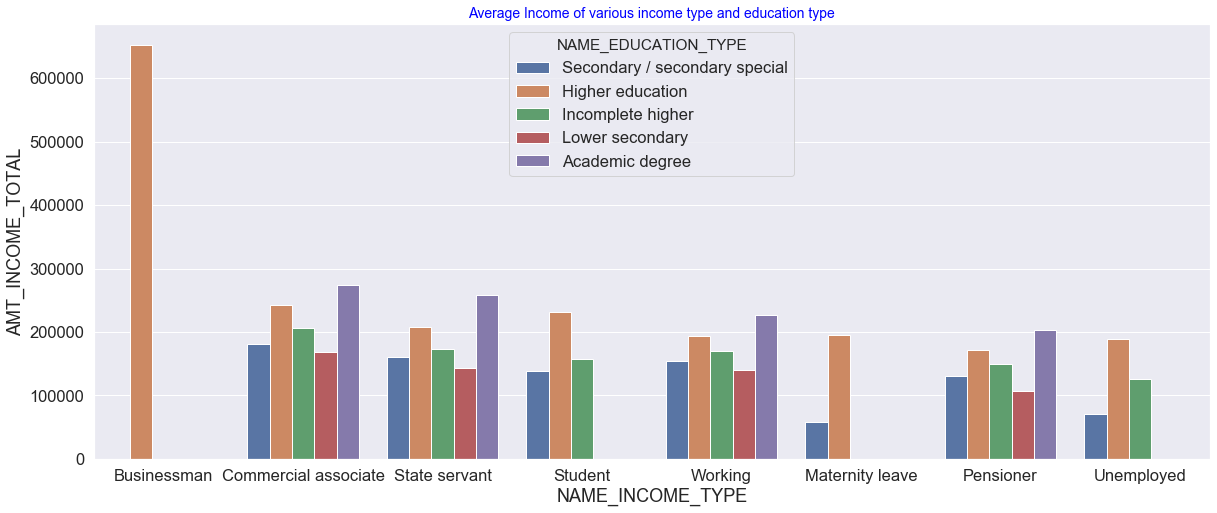

In [807]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=appsubset_df,hue='NAME_EDUCATION_TYPE',ci=None,
           order = appsubset_df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values(
    ascending=False).index); #ci is to add to remove error bar
ax.set_title('Average Income of various income type and education type',color = 'blue',fontsize=14);

## Observations from above plot
- Businessman has highest average income (652500.00 CCY). People are all from Higher education background
- Commercial associate professionals are second ranked in average income (202955.33 CCY). People are from all five backgrounds. Academic degree holders are more in numbers
- The third highest ranked in average income are State Servant (179737.97 CCY). Peopel are again from all five backgrounds. Academic degree holders are more in number
- Students are fourth average income (170500.00 CCY). People are with Secondary/secondary special, higher eductaion and incomplete higher education background
- <font size = 3 color = "blue"> Note - Please read CCY and currency</font>

## Average income of various gender and the car ownsership status<a id='Average Income wrt Gender and Car Ownership'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [808]:
appsubset_df.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].mean().sort_values(
    ascending=False).apply(lambda x: format(x,'.2f'))

CODE_GENDER
M      193396.48
XNA    186750.00
F      156032.31
Name: AMT_INCOME_TOTAL, dtype: object

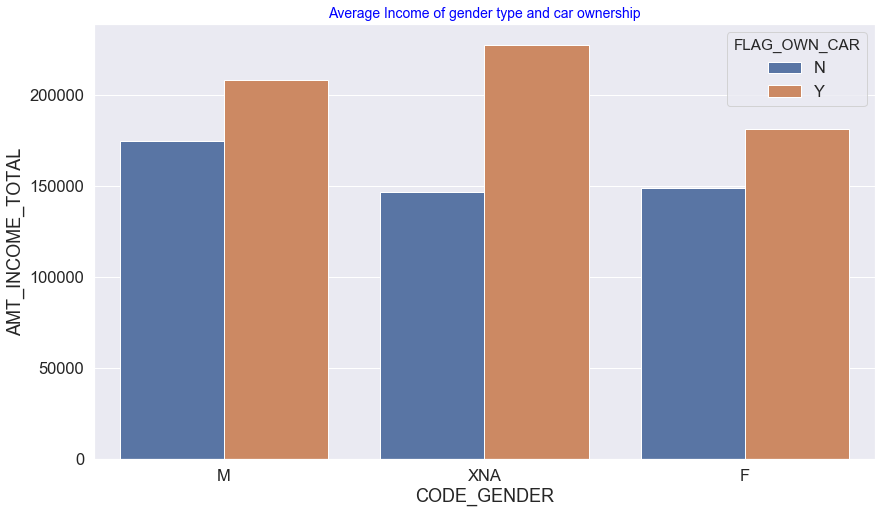

In [809]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=appsubset_df,hue='FLAG_OWN_CAR',ci=None,
           order = appsubset_df.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].mean().sort_values(
    ascending=False).index); #ci is to add to remove error bar
ax.set_title('Average Income of gender type and car ownership',color = 'blue',fontsize=14);

## Observations from above plot
- Male average income (193396.48 currency) is highest. Most of these males own car as well
- XNA average income (186750.00 currency) is second highest. Most of these own car as well
- Female average income (156032.31 currency) is least. Most of these females own car as well

## Average income of people with various housing types and family status<a id='Average Income wrt Housing Types and Family Status'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [810]:
appsubset_df.groupby('NAME_HOUSING_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values(
    ascending=False).apply(lambda x: format(x,'.2f'))

NAME_HOUSING_TYPE
Office apartment       187906.54
House / apartment      169227.72
Municipal apartment    168002.93
Co-op apartment        167651.32
Rented apartment       167460.21
With parents           158651.07
Name: AMT_INCOME_TOTAL, dtype: object

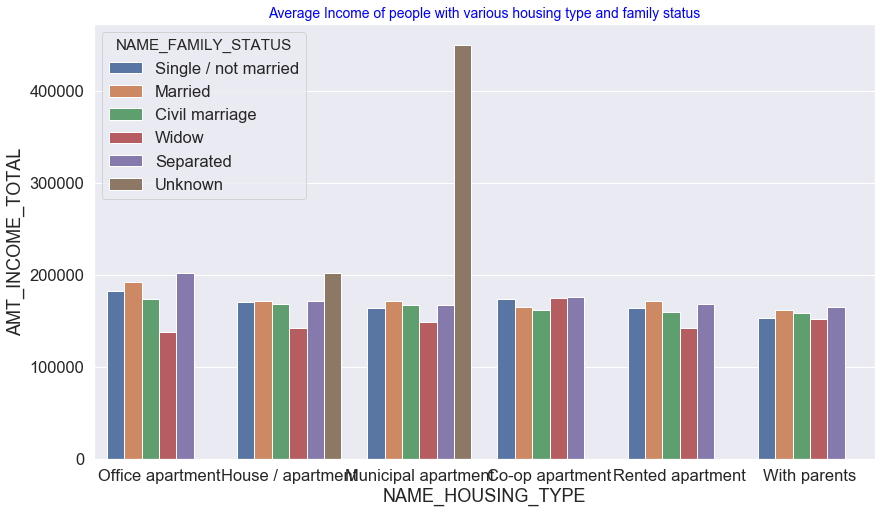

In [811]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='NAME_HOUSING_TYPE', y='AMT_INCOME_TOTAL', data=appsubset_df,hue='NAME_FAMILY_STATUS',ci=None,
           order = appsubset_df.groupby('NAME_HOUSING_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values(
    ascending=False).index); #ci is to add to remove error bar
ax.set_title('Average Income of people with various housing type and family status',color = 'blue',fontsize=14);

## Observations from above plot
- Average income of people living in Office apartment (187906.54 currency) is highest. People living in these houses have family status as Single/not married, Married, Civili Marriage, Widow, Separated. Amongst these Average income of Separated is highest
- Average income of people living in House/apartment (169227.72 currency) is second highest. People living in these houses have family status as Single/not married, Married, Civili Marriage, Widow, Separated, Unknown. Amongst these Average income of Unknown is highest
- Average income of people living with Parents is lowest (158651.07 currency). People living with parents have family status as Single/not married, Married, Civili Marriage, Widow, Separated. Amongst these Average income of Separated is highest

## Average amounts wrt Target(Repayer/defaulter)<a id='Average Amounts wrt Repayer or Defaulter'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [812]:
# find average amounts of all amount types group by target
amt_mean_df = appsubset_df.groupby('TARGET')['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'
                              ].mean().round(2)
amt_mean_df

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
TARGET                                                            
0       169077.72         602648.28   27163.62     542736.80      
1       165611.76         557778.53   26481.74     488972.41

In [813]:
amt_mean_df.T.sort_values(by=0,ascending=False)

TARGET                    0          1
AMT_CREDIT        602648.28  557778.53
AMT_GOODS_PRICE   542736.80  488972.41
AMT_INCOME_TOTAL  169077.72  165611.76
AMT_ANNUITY       27163.62   26481.74

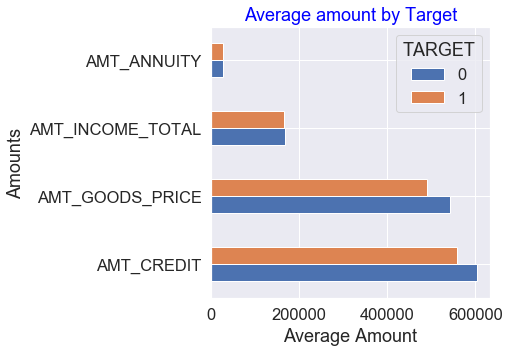

In [814]:
amt_mean_df.T.loc[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
                 ].sort_values(by=0,ascending=False).plot(kind='barh',
          figsize=(5,5));
plt.title('Average amount by Target',color='blue')
plt.xlabel('Average Amount')
plt.ylabel('Amounts');

## Observations from above plot
- Target 
    - 0 - who pay regularly
    - 1 - who are loan defaulters or have difficulty in loan repayment
- Average annuity amount of people who pay regularly (27162.47) and who default on loan (26481.74) is almost same
- Average income amount of people who pay regularly (169077.72) and who default on loan (165611.76) is almost same
- Average credit amount of people who pay regularly (602648.28) is higher than average credit amount of loan defaulters (557778.53)

# Load Previous Application Data<a id='Load Previous Loan Application Data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [815]:
prevapp_df = pd.read_csv('./dataset/previous_application.csv')
prevapp_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0  2030495     271877      Consumer loans     1730.430     17145.0           
1  2802425     108129      Cash loans         25188.615    607500.0          
2  2523466     122040      Cash loans         15060.735    112500.0          
3  2819243     176158      Cash loans         47041.335    450000.0          
4  1784265     202054      Cash loans         31924.395    337500.0          

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0     0.0               17145.0          SATURDAY                    
1  679671.0   NaN                607500.0         THURSDAY                    
2  136444.5   NaN                112500.0         TUESDAY                     
3  470790.0   NaN                450000.0         MONDAY                      
4  404055.0   NaN                337500.0         THURSDAY                    

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0  15                       Y                            
1  11                       Y                            
2  11                       Y                            
3  7                        Y                            
4  9                        Y                            

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0  1                       0.0                0.182832                
1  1                      NaN                NaN                      
2  1                      NaN                NaN                      
3  1                      NaN                NaN                      
4  1                      NaN                NaN                      

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0  0.867336                  XAP                    Approved              
1 NaN                        XNA                    Approved              
2 NaN                        XNA                    Approved              
3 NaN                        XNA                    Approved              
4 NaN                        Repairs                Refused               

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0 -73             Cash through the bank  XAP                NaN               
1 -164            XNA                    XAP                Unaccompanied     
2 -301            Cash through the bank  XAP                Spouse, partner   
3 -512            Cash through the bank  XAP                NaN               
4 -781            Cash through the bank  HC                 NaN               

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0  Repeater         Mobile              POS            XNA                
1  Repeater         XNA                 Cash           x-sell             
2  Repeater         XNA                 Cash           x-sell             
3  Repeater         XNA                 Cash           x-sell             
4  Repeater         XNA                 Cash           walk-in            

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0  Country-wide             35                Connectivity          
1  Contact center          -1                 XNA                   
2  Credit and cash offices -1                 XNA                   
3  Credit and cash offices -1                 XNA                   
4  Credit and cash offices -1                 XNA                   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0  12.0         middle           POS mobile with interest  365243.0             
1  36.0         low_action       Cash X-Sell: low          365243.0             
2  12.0         high             Cash X-Sell: high         365243.0             
3  12.0         middle           Cash X-Sell: middle       365243.0             
4  24.0         high             Cash Street: high        NaN                   

   D

# Check data type and information of Previous Loan Application Data<a id='Check Prev App Info'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [816]:
prevapp_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

## Observations from above data information
- There are 37 columns
- There are 15 columns with float data type
- There are 6 integer columns
- There are 16 objects/categorical columns

## Loan Application various status types

In [817]:
prevapp_df['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled        316319 
Refused         290678 
Unused offer    26436  
Name: NAME_CONTRACT_STATUS, dtype: int64

# Distrbution plot of previous loan applications count group by current application Id<a id='Distribution of app count group current app'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

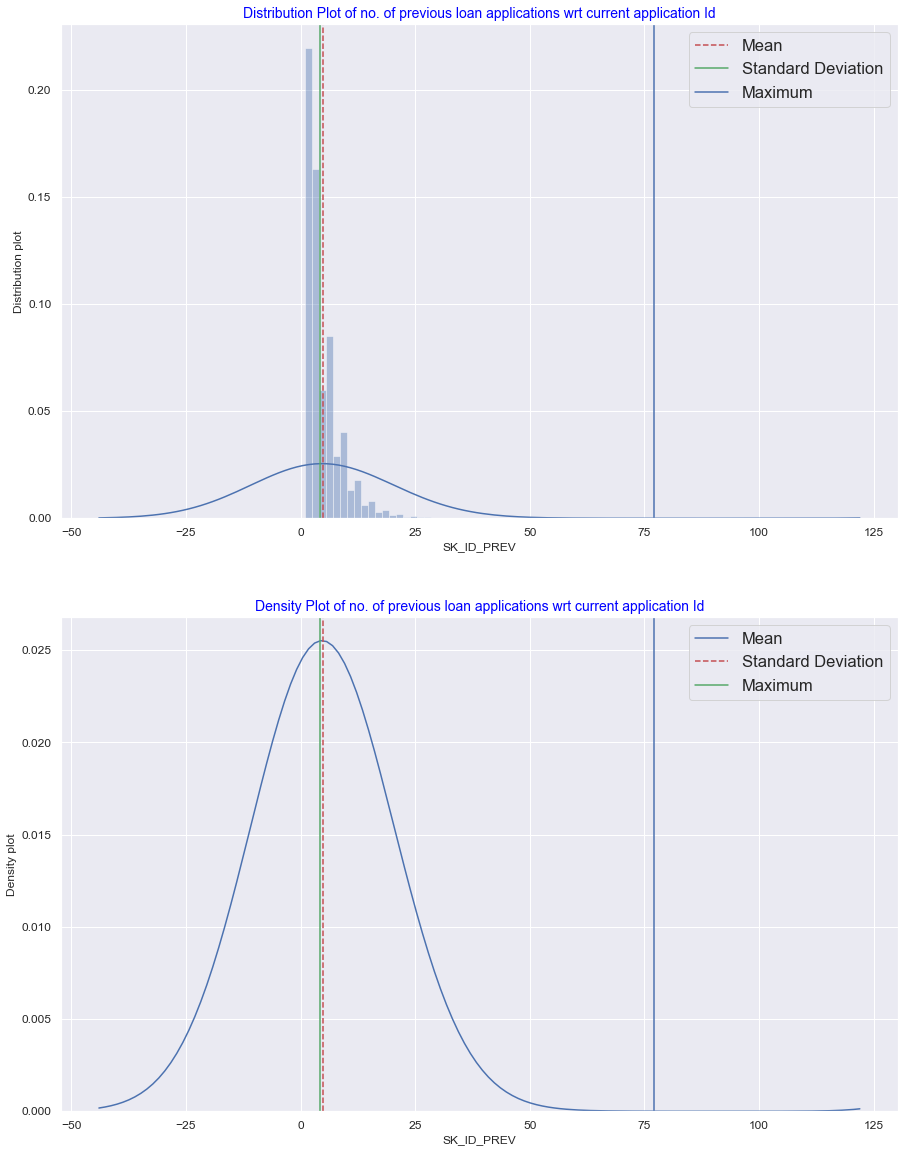

In [818]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,20))
bandwidth = 15

mean=prevapp_df.groupby('SK_ID_CURR')['SK_ID_PREV'].count().mean()
std=prevapp_df.groupby('SK_ID_CURR')['SK_ID_PREV'].count().std()
maximum=prevapp_df.groupby('SK_ID_CURR')['SK_ID_PREV'].count().max()

#Plot density plot
sns.distplot(prevapp_df.groupby('SK_ID_CURR')['SK_ID_PREV'].count(),ax=ax1,kde_kws={"bw":bandwidth});

ax1.axvline(mean, color='r', linestyle='--')
ax1.axvline(std, color='g', linestyle='-')
ax1.axvline(maximum, color='b', linestyle='-')

ax1.set_ylabel('Distribution plot', fontsize=12)
ax1.set_xlabel('SK_ID_PREV', fontsize=12)
ax1.set_title('Distribution Plot of no. of previous loan applications wrt current application Id',
              color='blue',fontsize=14)
locs, labels = plt.xticks()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend({'Mean':mean,'Standard Deviation':std,'Maximum':maximum},loc='upper right')


#Plot kde distribution plot
sns.kdeplot(prevapp_df.groupby('SK_ID_CURR')['SK_ID_PREV'].count(), bw=bandwidth,ax=ax2);

ax2.axvline(mean, color='r', linestyle='--')
ax2.axvline(std, color='g', linestyle='-')
ax2.axvline(maximum, color='b', linestyle='-')

ax2.set_ylabel('Density plot', fontsize=12)
ax2.set_xlabel('SK_ID_PREV', fontsize=12)
ax2.set_title('Density Plot of no. of previous loan applications wrt current application Id',
              color='blue',fontsize=14)
locs, labels = plt.xticks()
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend({'Mean':mean,'Standard Deviation':std,'Maximum':maximum},loc='upper right');

## Observations from above plot
- with kde banwidth of 15, the distribution of previous loan applications group by current application Id is normally distributed
- On average there are 4 or 5 previous loan applications wrt current loan application
- Maximum can go upto around 76

# Distrbution plot of previous loan applications status group by current application Id<a id='Distribution of app status group current app'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

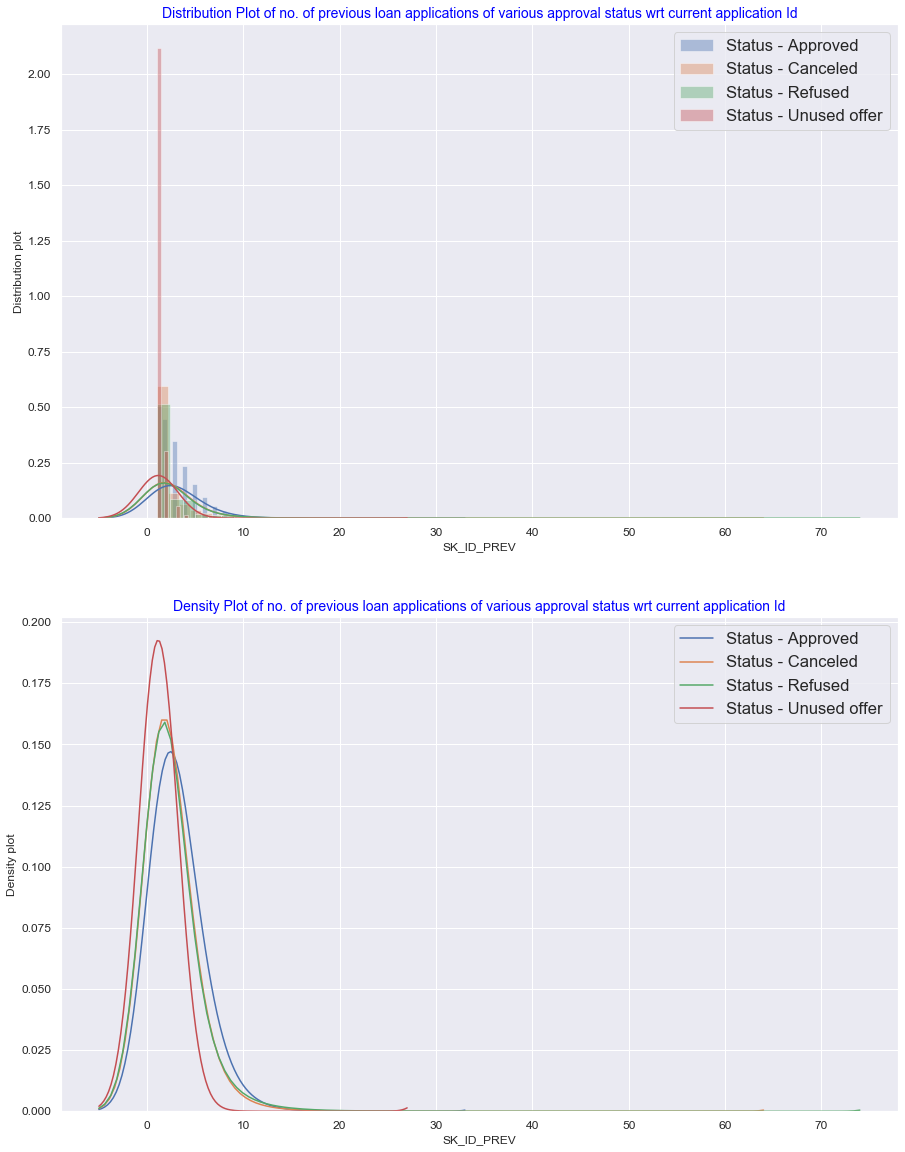

In [819]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,20))
bandwidth=2
sns.distplot(prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Approved'].groupby('SK_ID_CURR')['SK_ID_PREV'].count(), label='Status - Approved',ax=ax1,kde_kws={"bw":bandwidth})
sns.distplot(prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Canceled'].groupby('SK_ID_CURR')['SK_ID_PREV'].count(), label='Status - Canceled',ax=ax1,kde_kws={"bw":bandwidth})
sns.distplot(prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['SK_ID_PREV'].count(), label='Status - Refused',ax=ax1,kde_kws={"bw":bandwidth})
sns.distplot(prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Unused offer'].groupby('SK_ID_CURR')['SK_ID_PREV'].count(), label='Status - Unused offer',ax=ax1,kde_kws={"bw":bandwidth})


ax1.set_ylabel('Distribution plot', fontsize=12)
ax1.set_xlabel('SK_ID_PREV', fontsize=12)
ax1.set_title('Distribution Plot of no. of previous loan applications of various approval status wrt current application Id',
              color='blue',fontsize=14)
locs, labels = plt.xticks()
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend();
sns.kdeplot(prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Approved'].groupby('SK_ID_CURR')['SK_ID_PREV'].count(), bw=bandwidth,label='Status - Approved',ax=ax2)
sns.kdeplot(prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Canceled'].groupby('SK_ID_CURR')['SK_ID_PREV'].count(), bw=bandwidth,label='Status - Canceled',ax=ax2)
sns.kdeplot(prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['SK_ID_PREV'].count(), bw=bandwidth,label='Status - Refused',ax=ax2)
sns.kdeplot(prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Unused offer'].groupby('SK_ID_CURR')['SK_ID_PREV'].count(), bw=bandwidth,label='Status - Unused offer',ax=ax2)

ax2.set_ylabel('Density plot', fontsize=12)
ax2.set_xlabel('SK_ID_PREV', fontsize=12)
ax2.set_title('Density Plot of no. of previous loan applications of various approval status wrt current application Id',
              color='blue',fontsize=14)
locs, labels = plt.xticks()
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend();

## Observations from above plot
- These are the previous loan applications for given current loan applications
- It can be seen that there is difference in number of previous loan applications getting approved, canceled, refused or unused due to different spikes as can be seen in distribution plot(figure1) and difference in overlay of curves in kde density plot(figure2)

# Lets plot Loan Types and their approval status<a id='Loan Types and approval status'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

### Function to plot Loan taken wrt loan approval status

In [820]:
def plot_loan_and_status(feature,loanstatus_df,category_df,height=8,ylabels=[]):

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(6,height*2))
    fig.subplots_adjust(hspace=0.5)
    ## plot the total loan taken by each sub-category
    ax1.set_title('Loan taken per category',color='blue',fontsize=14)
    ax1.set_ylabel(feature,fontsize=12) 
    ax1.set_xlabel('count',fontsize=12)
    sns.countplot(y=feature,data=category_df,ax=ax1,color='green');
    if len(ylabels)>0:
        ax1.set_yticklabels(ylabels);

    ## plot the repayment difficulty in each sub-category
    ax2.set_title('Approved Loan status percentage',color='blue',fontsize=14)
    ax2.set_ylabel(feature,fontsize=12) 
    ax2.set_xlabel('percentage',fontsize=12)
    loanstatus_df.loc['Approved'].dropna().sort_values().plot(kind='barh',ax=ax2,color='green');
#     if len(ylabels)>0:
#         ax2.set_yticklabels(ylabels);

    ## plot the repayment difficulty in each sub-category
    ax3.set_title('Canceled Loan status percentage',color='blue',fontsize=14)
    ax3.set_ylabel(feature,fontsize=12) 
    ax3.set_xlabel('percentage',fontsize=12)
    loanstatus_df.loc['Canceled'].dropna().sort_values().plot(kind='barh',ax=ax3,color='pink');
#     if len(ylabels)>0:
#         ax3.set_yticklabels(ylabels);

    ## plot the repayment difficulty in each sub-category
    ax4.set_title('Refused Loan status percentage',color='blue',fontsize=14)
    ax4.set_ylabel(feature,fontsize=12) 
    ax4.set_xlabel('percentage',fontsize=12)
    loanstatus_df.loc['Refused'].dropna().sort_values().plot(kind='barh',ax=ax4,color='red');
#     if len(ylabels)>0:
#         ax4.set_yticklabels(ylabels);

    ## plot the repayment difficulty in each sub-category
    ax5.set_title('Unused Offer Loan status percentage',color='blue',fontsize=14)
    ax5.set_ylabel(feature,fontsize=12) 
    ax5.set_xlabel('percentage',fontsize=12)
    loanstatus_df.loc['Unused offer'].dropna().sort_values().plot(kind='barh',ax=ax5,color='lightgreen');
#     if len(ylabels)>0:
#         ax5.set_yticklabels(ylabels);


## Lets check count of applications for different type of loans

In [821]:
prevapp_df['NAME_CONTRACT_TYPE'].isnull().sum()

0

In [822]:
prevapp_df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                346   
Name: NAME_CONTRACT_TYPE, dtype: int64

## Lets check for XNA type of loans<a id='XNA Loan Types'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [823]:
xna_df = prevapp_df[prevapp_df['NAME_CONTRACT_TYPE']=='XNA']
xna_df

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
6664     2515161     222844      XNA               NaN            
9029     1851920     417884      XNA               NaN            
17038    2389511     148922      XNA               NaN            
24543    2494449     366626      XNA               NaN            
24574    2781877     394843      XNA               NaN            
25030    2785890     154490      XNA               NaN            
39305    2457349     307803      XNA               NaN            
39461    2456391     164367      XNA               NaN            
52461    2447432     426909      XNA               NaN            
61664    2022193     378447      XNA               NaN            
79933    2377334     351258      XNA               NaN            
80232    1470617     244344      XNA               NaN            
81715    1700167     125160      XNA               NaN            
81716    1380195     379439      XNA               NaN            
83438    1777004     285411      XNA               NaN            
84178    2041259     350713      XNA               NaN            
93088    1507440     179845      XNA               NaN            
108822   1906631     116369      XNA               NaN            
110745   1808766     188786      XNA               NaN            
117368   2420029     427664      XNA               NaN            
122153   1796666     220723      XNA               NaN            
128265   1520921     206765      XNA               NaN            
139320   1879353     327642      XNA               NaN            
141381   1304559     298506      XNA               NaN            
145615   2315265     246825      XNA               NaN            
147357   2005558     398907      XNA               NaN            
150224   1037118     252364      XNA               NaN            
152238   1861852     331871      XNA               NaN            
153646   2845046     312474      XNA               NaN            
155171   1843109     233103      XNA               NaN            
168273   1432979     114819      XNA               NaN            
169393   2543973     255797      XNA               NaN            
169822   2795751     379139      XNA               NaN            
170943   2829463     214049      XNA               NaN            
171329   2361387     158777      XNA               NaN            
174636   2311659     168000      XNA               NaN            
175815   1168658     369875      XNA               NaN            
179226   2544424     435377      XNA               NaN            
181429   1610407     287042      XNA               NaN            
186568   2061272     194910      XNA               NaN            
193014   1932947     257459      XNA               NaN            
205845   1545818     422839      XNA               NaN            
206049   1534452     150508      XNA               NaN            
220988   1525316     228674      XNA               NaN            
228860   2420647     132307      XNA               NaN            
238742   1353979     176203      XNA               NaN            
239872   1997596     390845      XNA               NaN            
242081   1353720     203268      XNA               NaN            
248395   1091435     265540      XNA               NaN            
264807   1930127     122123      XNA               NaN            
271559   1325455     154424      XNA               NaN            
280708   2752433     221085      XNA               NaN            
287634   2781359     197877      XNA               NaN            
287760   1704265     270372      XNA               NaN            
298955   2117768     274640      XNA               NaN            
308819   2531676     268072      XNA               NaN            
309636   1228335     118358      XNA               NaN            
317522   1860367     184623      XNA               NaN            
325429   1097267     374946      XNA               NaN  

In [824]:
pd.DataFrame([[xna_df.shape],
            [xna_df.isnull().sum().sum()],
             [xna_df.duplicated().sum()]],
            columns = ['XNA Data Set'],
            index = ['Shape', 'Missingness', 'Duplicates'])

XNA Data Set
Shape        (346, 37)  
Missingness  5190       
Duplicates   0

## Observations from above cells
- It can be seen that 40% of the values are missing for Loan Type XNA
- With such observations it will be difficult to infer anything
- So we will drop these 346 observations where 'NAME_CONTRACT_TYPE' is 'XNA'

In [825]:
print('No of rows: {0} and columns: {1} before dropping observations with Loan Types as XNA'.
      format(prevapp_df.shape[0],prevapp_df.shape[1]))
prevapp_df.drop(index=prevapp_df.loc[prevapp_df['NAME_CONTRACT_TYPE']=='XNA'].index,inplace=True)
print('No of rows: {0} and columns: {1} after dropping observations with Loan Types as XNA'.
      format(prevapp_df.shape[0],prevapp_df.shape[1]))

No of rows: 1670214 and columns: 37 before dropping observations with Loan Types as XNA
No of rows: 1669868 and columns: 37 after dropping observations with Loan Types as XNA


# Lets analyse Loan Types for previous applications<a id='Loan Types and Status of previous application'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [826]:
## Lets see the number of applications wrt different type of loans
prevapp_df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [827]:
## Lets see the percentage of applications wrt different type of loans
contract_count = prevapp_df['NAME_CONTRACT_TYPE'].count()
prevapp_df.groupby('NAME_CONTRACT_TYPE').apply(lambda x: x.count(0)/contract_count)[['NAME_CONTRACT_TYPE']]

NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE                    
Cash loans          0.447672          
Consumer loans      0.436652          
Revolving loans     0.115676

In [828]:
## Lets groupby loan types and check different loan approval status percentage in each loan category
crosstab_df = pd.crosstab(prevapp_df['NAME_CONTRACT_STATUS'],
            prevapp_df['NAME_CONTRACT_TYPE']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

NAME_CONTRACT_TYPE    Cash loans  Consumer loans  Revolving loans
NAME_CONTRACT_STATUS                                             
Approved              41.81       85.92           50.62          
Canceled              35.93       0.21            23.74          
Refused               22.20       10.31           25.64          
Unused offer          0.07        3.56            0.00

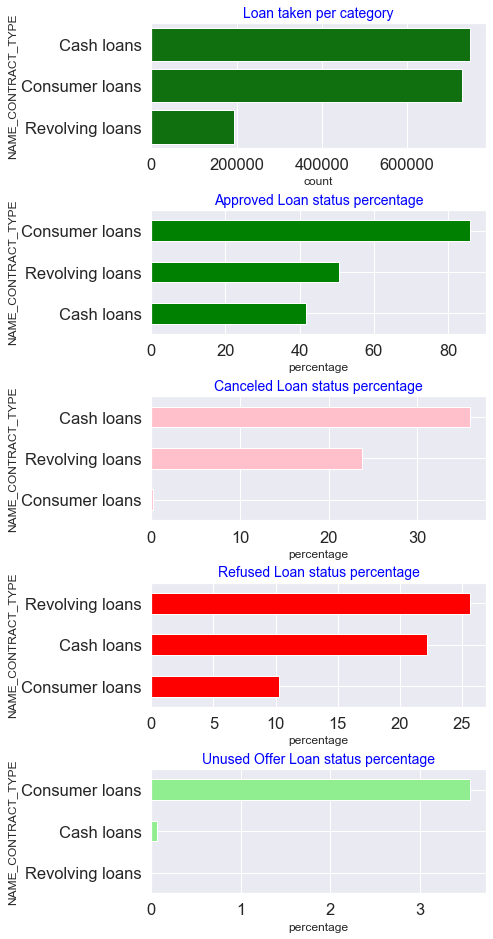

In [829]:
plot_loan_and_status('NAME_CONTRACT_TYPE',crosstab_df,prevapp_df.sort_values(by='NAME_CONTRACT_TYPE'))

# Observations from above plot
- Cash Loans(747553) applications are maximum in number followed by Consumer Loans(729151)
- Consumer Loans percentage of approval is highest (85.92%)
- Cash loan category has maximum percentage of Canceled loans (35.93%)
- Revolving Loans have maximum refusal percentage (25.64%)
- Consumer Loans are the ones that have highest percentage of Unused Offer (3.56%)

# Lets plot peak hours and days most of the loans were applied<a id='Peak Hours and Days for prev app'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [830]:
## Lets groupby loan types and check different loan approval status percentage in each loan category
crosstab_df = pd.crosstab(prevapp_df['WEEKDAY_APPR_PROCESS_START'],
            prevapp_df['HOUR_APPR_PROCESS_START']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

HOUR_APPR_PROCESS_START         0      1      2      3      4      5      6  \
WEEKDAY_APPR_PROCESS_START                                                    
FRIDAY                      19.27  20.28  16.49  15.13  14.97  15.43  15.63   
MONDAY                      10.09  14.15  16.58  14.30  14.99  14.77  15.57   
SATURDAY                    20.18  10.85  9.50   15.35  15.10  14.98  14.42   
SUNDAY                      13.76  5.19   3.94   6.69   8.01   8.46   8.43    
THURSDAY                    11.93  16.04  17.74  15.93  15.03  15.24  15.10   
TUESDAY                     16.51  17.92  17.65  15.63  16.05  15.75  15.47   
WEDNESDAY                   8.26   15.57  18.10  16.96  15.85  15.37  15.37   

HOUR_APPR_PROCESS_START         7      8      9     10     11     12     13  \
WEEKDAY_APPR_PROCESS_START                                                    
FRIDAY                      15.63  15.13  15.60  14.78  14.71  14.59  14.58   
MONDAY                      15.60  15.14  15.70  14.70  14.73  14.67  14.84   
SATURDAY                    13.97  15.37  13.21  16.23  16.01  15.76  15.47   
SUNDAY                      8.08   8.78   8.25   9.85   10.71  11.40  11.15   
THURSDAY                    15.33  14.91  15.34  14.44  14.31  14.31  14.47   
TUESDAY                     15.36  15.13  16.03  15.00  14.84  14.68  14.71   
WEDNESDAY                   16.03  15.54  15.87  15.00  14.70  14.59  14.77   

HOUR_APPR_PROCESS_START        14     15     16     17     18     19     20  \
WEEKDAY_APPR_PROCESS_START                                                    
FRIDAY                      14.95  15.21  15.63  16.00  15.46  15.61  15.45   
MONDAY                      15.09  15.31  15.82  16.06  16.41  15.65  14.85   
SATURDAY                    14.58  13.61  12.67  11.49  10.24  11.21  12.78   
SUNDAY                      10.61  9.84   9.21   8.26   8.41   9.37   10.85   
THURSDAY                    14.84  15.07  15.41  15.96  16.25  15.88  15.45   
TUESDAY                     14.97  15.42  15.59  16.05  16.77  16.37  15.65   
WEDNESDAY                   14.95  15.53  15.66  16.18  16.46  15.91  14.98   

HOUR_APPR_PROCESS_START        21     22     23  
WEEKDAY_APPR_PROCESS_START                       
FRIDAY                      15.49  17.78  13.86  
MONDAY                      13.62  12.64  15.35  
SATURDAY                    11.47  12.78  12.87  
SUNDAY                      11.42  12.50  16.83  
THURSDAY                    16.61  13.89  7.92   
TUESDAY                     15.68  17.36  15.35  
WEDNESDAY                   15.71  13.06  17.82

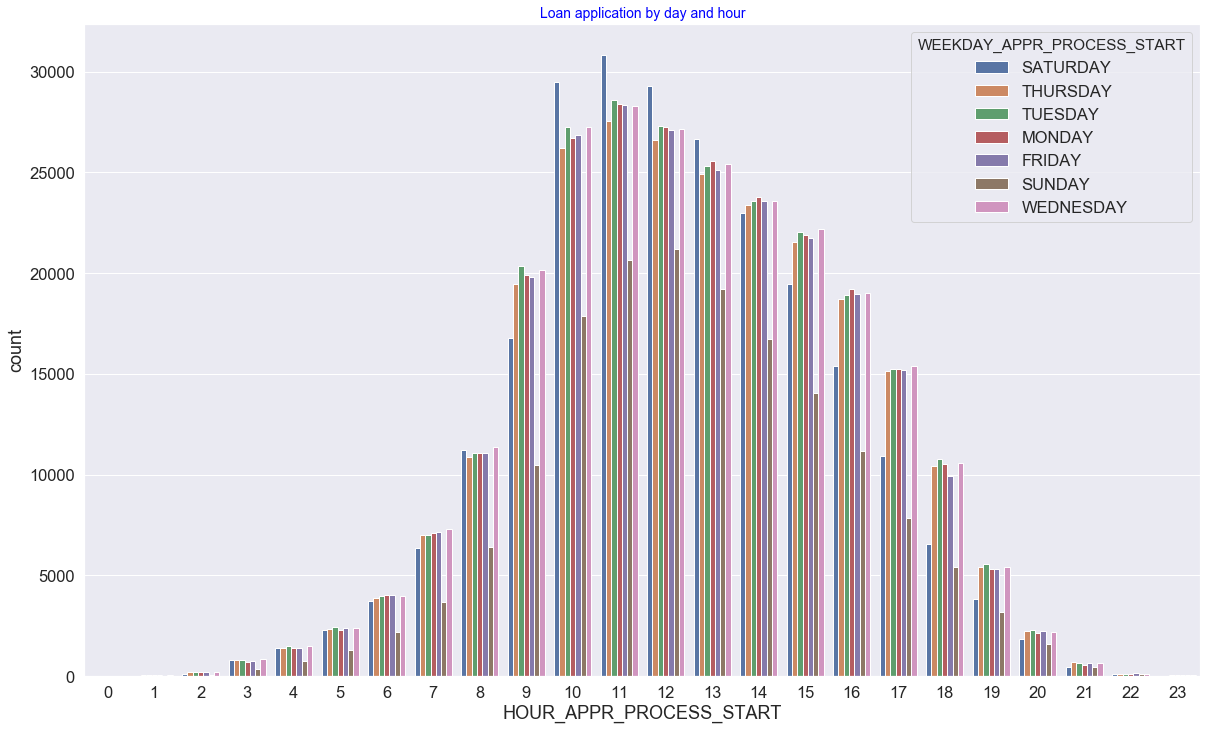

In [831]:
plt.figure(figsize=(20,12))
plt.title('Loan application by day and hour',color='blue',fontsize=14)
sns.countplot(x='HOUR_APPR_PROCESS_START',data=prevapp_df,hue='WEEKDAY_APPR_PROCESS_START');

## Observations from above plot
- The loans were applied mainly on Saturday
- 10am - 2pm are peak hours for laon application

# Lets plot rejection reason codes<a id='Rejection reason codes'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [832]:
## Lets check loan status and various rejection codes
crosstab_df = pd.crosstab(prevapp_df['NAME_CONTRACT_STATUS'],
            prevapp_df['CODE_REJECT_REASON']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

CODE_REJECT_REASON    CLIENT     HC  LIMIT    SCO  SCOFR  SYSTEM  VERIF  \
NAME_CONTRACT_STATUS                                                      
Approved              0.0     0.0    0.0    0.0    0.0    0.0     0.0     
Canceled              0.0     0.0    0.0    0.0    0.0    0.0     0.0     
Refused               0.0     100.0  100.0  100.0  100.0  100.0   100.0   
Unused offer          100.0   0.0    0.0    0.0    0.0    0.0     0.0     

CODE_REJECT_REASON      XAP    XNA  
NAME_CONTRACT_STATUS                
Approved              76.64  0.15   
Canceled              23.36  0.00   
Refused               0.00   99.85  
Unused offer          0.00   0.00

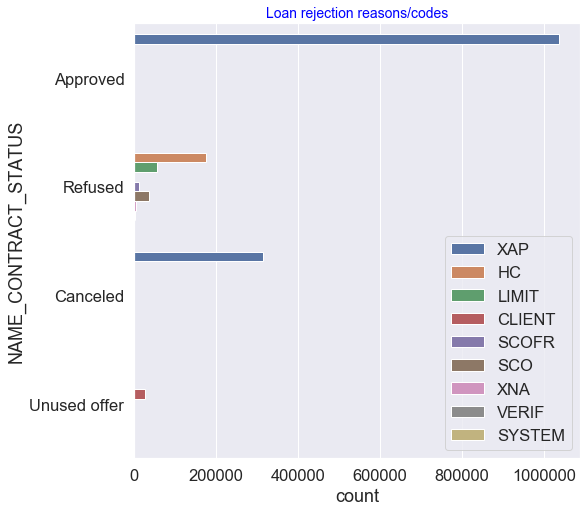

In [833]:
plt.figure(figsize=(8,8))
plt.title('Loan rejection reasons/codes',color='blue',fontsize=14)
sns.countplot(y='NAME_CONTRACT_STATUS',data=prevapp_df,hue='CODE_REJECT_REASON');
plt.legend(loc='lower right');

## Observations from above plot
- Approved application status have reason codes - XAP and XNA
- Refised applications status have reason codes - HC, LIMIT, SCO, SCOFR, SYSTEM, VERIF, XNA
- Canceled loan applications have reason codes - XAP
- Unused Offers have reason code - Client

# Lets plot AMT_CREDIT distribution<a id='Amount Credit of previous application'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Lets plot boxplot first

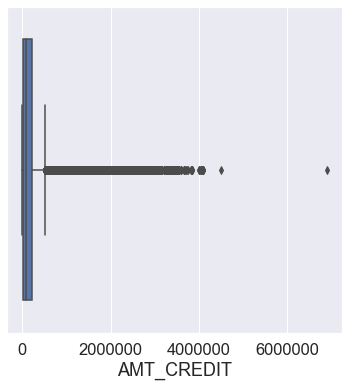

In [834]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(prevapp_df['AMT_CREDIT']);
ax.get_xaxis().get_major_formatter().set_scientific(False);

### Clearly there are many outliers
- Lets see the description to check statistics of this column

In [835]:
prevapp_df['AMT_CREDIT'].dropna().describe().apply(lambda x: format(x,'.2f'))

count    1669867.00
mean     196154.66 
std      318595.11 
min      0.00      
25%      24192.00  
50%      80550.00  
75%      216418.50 
max      6905160.00
Name: AMT_CREDIT, dtype: object

## Lets make bins of credit amount to understand better on range and loan approval status

In [836]:
bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,120000,140000,160000,
        180000,200000,250000,500000,1000000,5000000,7000000]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ylabels = ['0-10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k',
          '100k-120k','120k-140k','140k-160k','160k-180k','180k-200k','200k-250k','250k-500k','500k-1mn',
          '1mn-5mn','5mn-7mn']
prevapp_df['AMT_CREDIT_BINNED'] = pd.cut(prevapp_df['AMT_CREDIT'], bins=bins, labels=ylabels)
prevapp_df.sample(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
820243   1571959     378137      Cash loans        NaN            
1596296  1280062     314856      Cash loans         63805.140     
518982   1075431     116442      Cash loans         6233.040      
1342349  1224673     227007      Consumer loans     3860.955      
1483910  1745614     183946      Cash loans         7009.875      

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
820243   0.0              0.0        NaN               NaN                
1596296  900000.0         1091245.5  NaN                900000.0          
518982   90000.0          101880.0   NaN                90000.0           
1342349  31455.0          31113.0     3145.5            31455.0           
1483910  67500.0          71955.0    NaN                67500.0           

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
820243   TUESDAY                    17                        
1596296  WEDNESDAY                  8                         
518982   TUESDAY                    10                        
1342349  MONDAY                     18                        
1483910  THURSDAY                   7                         

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
820243   Y                           1                        
1596296  Y                           1                        
518982   Y                           1                        
1342349  Y                           1                        
1483910  Y                           1                        

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
820243  NaN                NaN                    NaN                         
1596296 NaN                NaN                    NaN                         
518982  NaN                NaN                    NaN                         
1342349  0.099997          NaN                    NaN                         
1483910 NaN                NaN                    NaN                         

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
820243   XNA                    Canceled            -119             
1596296  XNA                    Approved            -577             
518982   XNA                    Approved            -744             
1342349  XAP                    Approved            -1593            
1483910  XNA                    Approved            -880             

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
820243   XNA                    XAP                NaN              
1596296  Cash through the bank  XAP                NaN              
518982   Cash through the bank  XAP                Unaccompanied    
1342349  Cash through the bank  XAP                Family           
1483910  Cash through the bank  XAP                Family           

        NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
820243   Repeater         XNA                 XNA            XNA                
1596296  Repeater         XNA                 Cash           x-sell             
518982   Repeater         XNA                 Cash           x-sell             
1342349  Refreshed        Mobile              POS            XNA                
1483910  Repeater         XNA                 Cash           x-sell             

                    CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
820243   Credit and cash offices -1                 MLM partners          
1596296  Credit and cash offices -1                 XNA                   
518982   Credit and cash offices -1                 XNA                   
1342349  Country-wide             25                Connectivity          
1483910  Credit and cash offices -1                 XNA                   

         CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
820243  NaN           XNA              Cash                       
1596296  24.0 

In [837]:
## check for no. of observations in various bins
prevapp_df['AMT_CREDIT_BINNED'].value_counts()

250k-500k    177983
500k-1mn     118227
40k-50k      108310
20k-30k      87959 
100k-120k    80960 
200k-250k    78681 
30k-40k      78241 
120k-140k    75583 
50k-60k      64016 
1mn-5mn      63492 
60k-70k      60447 
140k-160k    58893 
80k-90k      57997 
160k-180k    54737 
70k-80k      52543 
90k-100k     45862 
10k-20k      44303 
180k-200k    24881 
0-10k        329   
5mn-7mn      1     
Name: AMT_CREDIT_BINNED, dtype: int64

## Lets check for approval status in various bins of Credit Amount

In [838]:
## Lets look for the number of observations in each bin for target 1 and 0
prevapp_df.groupby('AMT_CREDIT_BINNED')['NAME_CONTRACT_STATUS'].value_counts()

AMT_CREDIT_BINNED  NAME_CONTRACT_STATUS
0-10k              Approved                277   
                   Refused                 47    
                   Unused offer            5     
10k-20k            Approved                39037 
                   Refused                 4400  
                   Unused offer            851   
                   Canceled                15    
20k-30k            Approved                76054 
                   Refused                 8269  
                   Unused offer            3607  
                   Canceled                29    
30k-40k            Approved                67481 
                   Refused                 7177  
                   Unused offer            3557  
                   Canceled                26    
40k-50k            Approved                88387 
                   Refused                 16954 
                   Unused offer            2816  
                   Canceled                153   
50k-60k   

In [839]:
credit_count = prevapp_df['AMT_CREDIT_BINNED'].count()
prevapp_df.groupby('AMT_CREDIT_BINNED').apply(lambda x: x.count(0)/credit_count)[['AMT_CREDIT_BINNED']]

AMT_CREDIT_BINNED
AMT_CREDIT_BINNED                   
0-10k              2.467293e-04     
10k-20k            3.322447e-02     
20k-30k            6.596373e-02     
30k-40k            5.867584e-02     
40k-50k            8.122570e-02     
50k-60k            4.800798e-02     
60k-70k            4.533145e-02     
70k-80k            3.940395e-02     
80k-90k            4.349411e-02     
90k-100k           3.439362e-02     
100k-120k          6.071492e-02     
120k-140k          5.668250e-02     
140k-160k          4.416605e-02     
160k-180k          4.104931e-02     
180k-200k          1.865919e-02     
200k-250k          5.900581e-02     
250k-500k          1.334761e-01     
500k-1mn           8.866282e-02     
1mn-5mn            4.761501e-02     
5mn-7mn            7.499372e-07

In [840]:
crosstab_df = pd.crosstab(prevapp_df['NAME_CONTRACT_STATUS'],
            prevapp_df['AMT_CREDIT_BINNED']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

AMT_CREDIT_BINNED     0-10k  10k-20k  20k-30k  30k-40k  40k-50k  50k-60k  \
NAME_CONTRACT_STATUS                                                       
Approved              84.19  88.11    86.47    86.25    81.61    85.82     
Canceled              0.00   0.03     0.03     0.03     0.14     0.05      
Refused               14.29  9.93     9.40     9.17     15.65    10.33     
Unused offer          1.52   1.92     4.10     4.55     2.60     3.80      

AMT_CREDIT_BINNED     60k-70k  70k-80k  80k-90k  90k-100k  100k-120k  \
NAME_CONTRACT_STATUS                                                   
Approved              84.41    85.86    82.07    86.27     84.24       
Canceled              0.08     0.06     0.24     0.17      0.14        
Refused               11.54    10.14    14.79    11.09     13.29       
Unused offer          3.98     3.94     2.89     2.47      2.33        

AMT_CREDIT_BINNED     120k-140k  140k-160k  160k-180k  180k-200k  200k-250k  \
NAME_CONTRACT_STATUS                                                          
Approved              78.75      80.75      78.43      83.34      71.13       
Canceled              0.30       0.50       0.43       0.19       0.91        
Refused               18.40      17.41      20.69      16.04      27.73       
Unused offer          2.55       1.33       0.45       0.43       0.23        

AMT_CREDIT_BINNED     250k-500k  500k-1mn  1mn-5mn  5mn-7mn  
NAME_CONTRACT_STATUS                                         
Approved              71.66      61.56     48.06    0.0      
Canceled              1.49       2.68      4.31     0.0      
Refused               26.74      35.70     47.62    100.0    
Unused offer          0.11       0.06      0.01     0.0

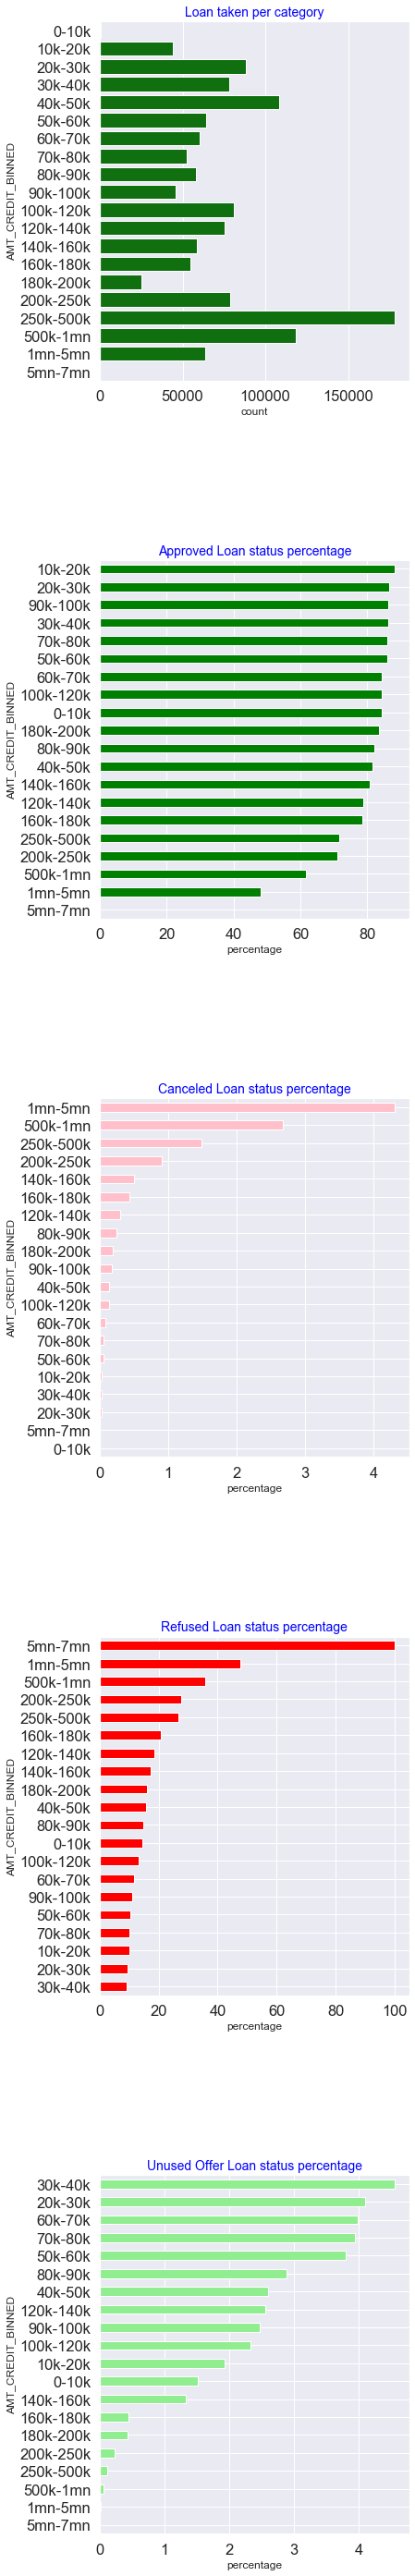

In [841]:
plot_loan_and_status('AMT_CREDIT_BINNED',crosstab_df,prevapp_df.sort_values(by='AMT_CREDIT_BINNED'),25)

## Observations from above plot
- Loan applications are highest for credit amount in bin 17 i.e. credit amount in range of [250k - 500k] - 177983
    - Only 1 loan application for credit amount in bin 20 i.e. in range [5mn,7mn]
    - 329 no. of loan applications are for credit amount in bin 1 i.e. in range [0,10k]
- Maximum loans are approved for credit amount in bin 2 i.e  credit amount in range of [10k - 20k] - 88.11%
- Maximum loans are cancelled for  credit amount in bin 19 i.e. credit amount in range of [1mn - 5mn] - 4.31%
- Maximum loans are refused for credit amount in bin 20 i.e. credit amount in range of [5mn - 7mn] - 100.0%
    - This means the only loan application with credit amount in range of [5mn - 7mn] has been refused
- Maximum loans are with unused offer for credit amount in bin 4 i.e. credit amount in range of [30k - 40k] - 4.55%

# Lets plot AMT_APPLICATION distribution<a id='Application Amount of previous application'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Lets plot boxplot first

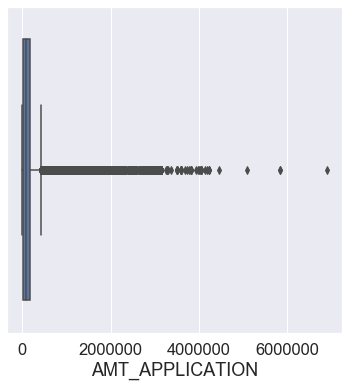

In [842]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(prevapp_df['AMT_APPLICATION']);
ax.get_xaxis().get_major_formatter().set_scientific(False);

### Clearly there are many outliers
- Lets see the description to check statistics of this column

In [843]:
prevapp_df['AMT_APPLICATION'].dropna().describe().apply(lambda x: format(x,'.2f'))

count    1669868.00
mean     175270.17 
std      292799.23 
min      0.00      
25%      18796.50  
50%      71055.00  
75%      180441.00 
max      6905160.00
Name: AMT_APPLICATION, dtype: object

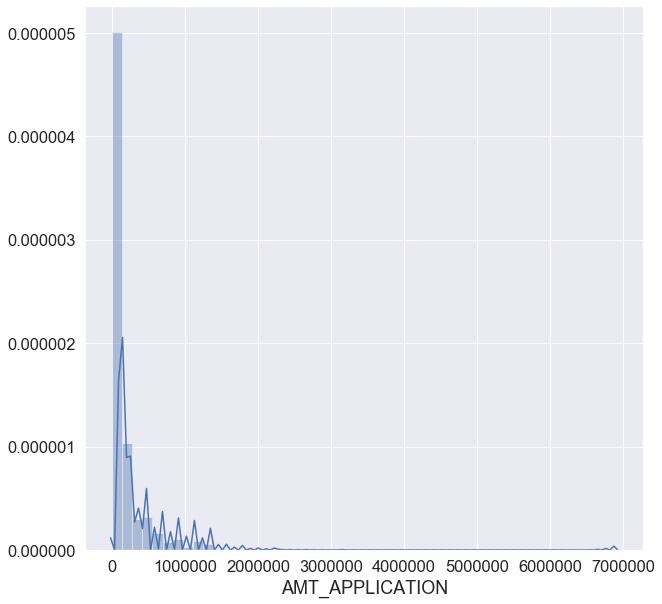

In [844]:
## Lets check for the distribution
plt.figure(figsize=(10,10))
ax = sns.distplot(prevapp_df['AMT_APPLICATION'].dropna());
ax.get_xaxis().get_major_formatter().set_scientific(False);
ax.get_yaxis().get_major_formatter().set_scientific(False);

## Observations from above plot
- Its a right skewed distribution
- Maximum value of observation is 6905160.00
- Maximum observations are in th range of 0 - 90000.00

## Lets make bins of application amount to understand better on range and loan approval status

In [845]:
bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,120000,140000,160000,
        180000,200000,250000,500000,1000000,5000000,7000000]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ylabels = ['0-10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k',
          '100k-120k','120k-140k','140k-160k','160k-180k','180k-200k','200k-250k','250k-500k','500k-1mn',
          '1mn-5mn','5mn-7mn']
prevapp_df['AMT_APPLICATION_BINNED'] = pd.cut(prevapp_df['AMT_APPLICATION'], bins=bins, labels=ylabels)
prevapp_df.sample(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
213941   2520782     206990      Cash loans        NaN            
607037   1818680     104346      Cash loans         37607.445     
636223   2529336     385635      Consumer loans     4373.190      
1153295  2560964     189116      Consumer loans     15238.080     
519484   1562668     160992      Consumer loans     8482.770      

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
213941   0.00             0.00       NaN               NaN                
607037   585000.00        654498.00  NaN                585000.00         
636223   54747.00         61978.50    0.0               54747.00          
1153295  134161.83        134161.83   0.0               134161.83         
519484   44140.50         41602.50    4500.0            44140.50          

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
213941   SATURDAY                   8                         
607037   TUESDAY                    15                        
636223   SUNDAY                     15                        
1153295  TUESDAY                    19                        
519484   TUESDAY                    11                        

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
213941   Y                           1                        
607037   Y                           1                        
636223   Y                           1                        
1153295  Y                           1                        
519484   Y                           1                        

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
213941  NaN                NaN                    NaN                         
607037  NaN                NaN                    NaN                         
636223   0.000000          NaN                    NaN                         
1153295  0.000000          NaN                    NaN                         
519484   0.106305          NaN                    NaN                         

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
213941   XNA                    Canceled            -382             
607037   XNA                    Approved            -273             
636223   XAP                    Refused             -259             
1153295  XAP                    Approved            -232             
519484   XAP                    Approved            -1478            

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
213941   XNA                    XAP                NaN              
607037   Cash through the bank  XAP                NaN              
636223   Cash through the bank  HC                 Unaccompanied    
1153295  Cash through the bank  XAP                NaN              
519484   XNA                    XAP                Children         

        NAME_CLIENT_TYPE     NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
213941   Repeater         XNA                     XNA             
607037   Repeater         XNA                     Cash            
636223   Repeater         Construction Materials  POS             
1153295  Repeater         Mobile                  POS             
519484   Repeater         Mobile                  POS             

        NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
213941   XNA               Credit and cash offices -1                  
607037   x-sell            Credit and cash offices -1                  
636223   XNA               Stone                    200                
1153295  XNA               Country-wide             53                 
519484   XNA               Country-wide             50                 

        NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
213941   XNA                 NaN           XNA               
607037   XNA                  36.0         high              
636223   Construction         18.0         middle            
11

In [846]:
## check for no. of observations in various bins
prevapp_df['AMT_APPLICATION_BINNED'].value_counts()

250k-500k    160005
40k-50k      114851
200k-250k    93858 
500k-1mn     93598 
120k-140k    93377 
20k-30k      83248 
30k-40k      78498 
100k-120k    78200 
80k-90k      73653 
60k-70k      70063 
50k-60k      57858 
1mn-5mn      52684 
160k-180k    48380 
70k-80k      46867 
140k-160k    44410 
90k-100k     37020 
10k-20k      33322 
180k-200k    17631 
0-10k        285   
5mn-7mn      4     
Name: AMT_APPLICATION_BINNED, dtype: int64

## Lets check for approval status in various bins of Application Amount

In [847]:
## Lets look for the number of observations in each bin for target 1 and 0
prevapp_df.groupby('AMT_APPLICATION_BINNED')['NAME_CONTRACT_STATUS'].value_counts()

AMT_APPLICATION_BINNED  NAME_CONTRACT_STATUS
0-10k                   Approved                230   
                        Refused                 50    
                        Unused offer            5     
10k-20k                 Approved                29032 
                        Refused                 3430  
                        Unused offer            851   
                        Canceled                9     
20k-30k                 Approved                71805 
                        Refused                 7802  
                        Unused offer            3607  
                        Canceled                34    
30k-40k                 Approved                67786 
                        Refused                 7126  
                        Unused offer            3557  
                        Canceled                29    
40k-50k                 Approved                94339 
                        Refused                 17544 
                    

In [848]:
credit_count = prevapp_df['AMT_APPLICATION_BINNED'].count()
prevapp_df.groupby('AMT_APPLICATION_BINNED').apply(lambda x: x.count(0)/credit_count)[['AMT_APPLICATION_BINNED']]

AMT_APPLICATION_BINNED
AMT_APPLICATION_BINNED                        
0-10k                   0.000223              
10k-20k                 0.026077              
20k-30k                 0.065149              
30k-40k                 0.061432              
40k-50k                 0.089881              
50k-60k                 0.045279              
60k-70k                 0.054830              
70k-80k                 0.036678              
80k-90k                 0.057640              
90k-100k                0.028971              
100k-120k               0.061198              
120k-140k               0.073076              
140k-160k               0.034755              
160k-180k               0.037862              
180k-200k               0.013798              
200k-250k               0.073452              
250k-500k               0.125218              
500k-1mn                0.073249              
1mn-5mn                 0.041230              
5mn-7mn                 0.000003

In [849]:
crosstab_df = pd.crosstab(prevapp_df['NAME_CONTRACT_STATUS'],
            prevapp_df['AMT_APPLICATION_BINNED']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

AMT_APPLICATION_BINNED  0-10k  10k-20k  20k-30k  30k-40k  40k-50k  50k-60k  \
NAME_CONTRACT_STATUS                                                         
Approved                80.70  87.13    86.25    86.35    82.14    85.97     
Canceled                0.00   0.03     0.04     0.04     0.13     0.05      
Refused                 17.54  10.29    9.37     9.08     15.28    9.78      
Unused offer            1.75   2.55     4.33     4.53     2.45     4.20      

AMT_APPLICATION_BINNED  60k-70k  70k-80k  80k-90k  90k-100k  100k-120k  \
NAME_CONTRACT_STATUS                                                     
Approved                84.68    86.15    83.04    86.17     84.24       
Canceled                0.10     0.04     0.31     0.05      0.14        
Refused                 11.79    9.39     14.37    10.72     13.22       
Unused offer            3.43     4.42     2.28     3.06      2.41        

AMT_APPLICATION_BINNED  120k-140k  140k-160k  160k-180k  180k-200k  200k-250k  \
NAME_CONTRACT_STATUS                                                            
Approved                79.12      82.03      77.52      84.72      70.83       
Canceled                0.52       0.26       0.44       0.26       1.09        
Refused                 18.29      15.94      21.54      14.41      27.88       
Unused offer            2.06       1.77       0.51       0.61       0.19        

AMT_APPLICATION_BINNED  250k-500k  500k-1mn  1mn-5mn  5mn-7mn  
NAME_CONTRACT_STATUS                                           
Approved                68.52      59.66     47.84    75.0     
Canceled                1.89       2.91      4.58     0.0      
Refused                 29.48      37.36     47.56    25.0     
Unused offer            0.12       0.07      0.01     0.0

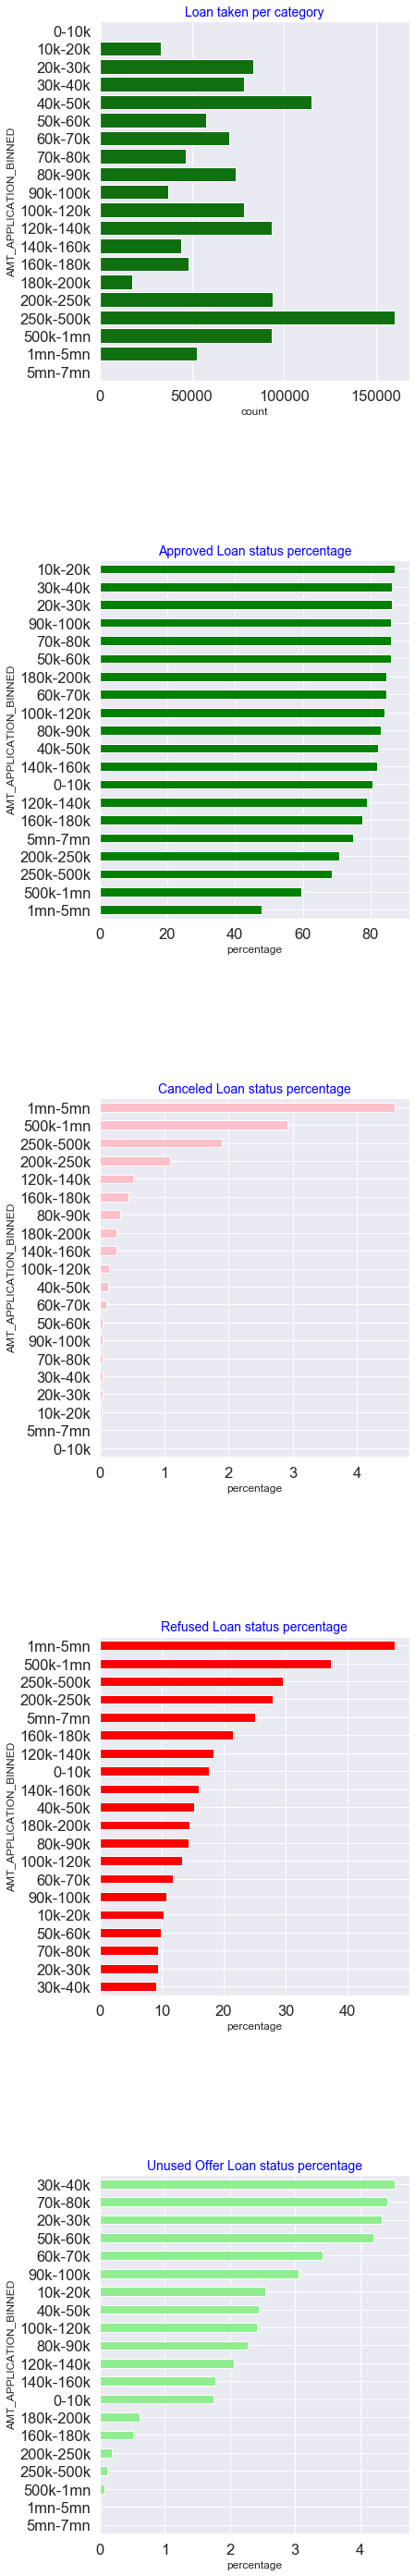

In [850]:
plot_loan_and_status('AMT_APPLICATION_BINNED',crosstab_df,prevapp_df.sort_values(by='AMT_APPLICATION_BINNED'),25)

## Observations from above plot
- Loan applications are highest for application amount in bin 17 i.e. application amount in range of [250k - 500k] - (160005 in number)
    - 4 loan applications with application amount in bin 20 i.e. in range [5mn - 7mn]
    - 285 no. of loan applications with application amount in bin 1 i.e. in range [0 - 10k]
- Maximum loans are approved for application amount in bin 2 i.e  application amount in range of [10k - 20k] - 87.13%
- Maximum loans are cancelled for  application amount in bin 19 i.e. application amount in range of [1mn - 5mn] - 4.58%
- Maximum loans are refused for application amount in bin 19 i.e. application amount in range of [1mn - 5mn] - 47.56%
- Maximum loans are with unused offer for application amount in bin 4 i.e. application amount in range of [30k - 40k] - 4.53%

# Lets plot AMT_ANNUITY distribution<a id='Annuity Amount of previous application'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Lets plot boxplot first

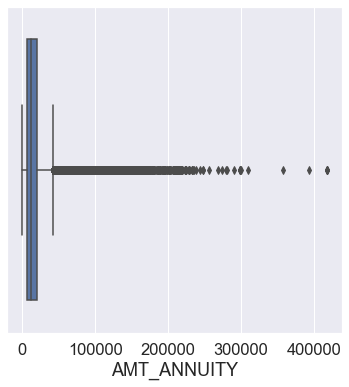

In [851]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(prevapp_df['AMT_ANNUITY']);
ax.get_xaxis().get_major_formatter().set_scientific(False);

### Clearly there are many outliers
- Lets see the description to check statistics of this column

In [852]:
prevapp_df['AMT_ANNUITY'].dropna().describe().apply(lambda x: format(x,'.2f'))

count    1297979.00
mean     15955.12  
std      14782.14  
min      0.00      
25%      6321.78   
50%      11250.00  
75%      20658.42  
max      418058.15 
Name: AMT_ANNUITY, dtype: object

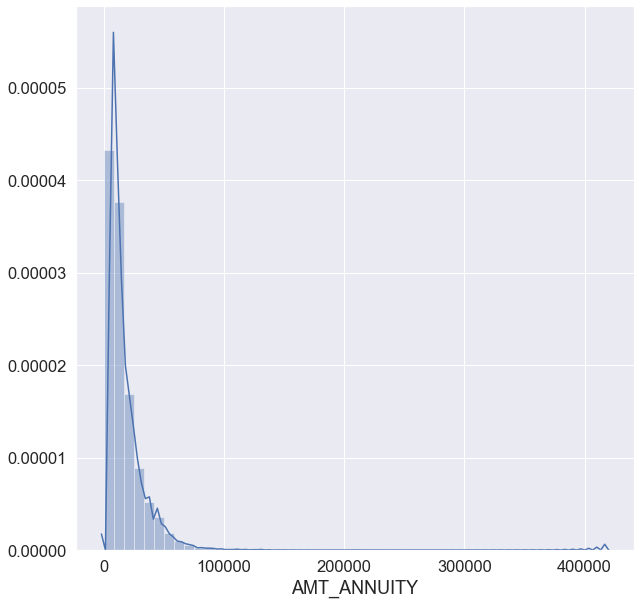

In [853]:
## Lets check for the distribution
plt.figure(figsize=(10,10))
ax = sns.distplot(prevapp_df['AMT_ANNUITY'].dropna());
ax.get_xaxis().get_major_formatter().set_scientific(False);
ax.get_yaxis().get_major_formatter().set_scientific(False);

## Observations from above plot
- Its a right skewed distribution
- Maximum value of observation is 418058.15
- Maximum observations are in th range of 0 - 12000.00

## Lets make bins of annuity amount to understand better on range and loan approval status

In [854]:
bins = [0,10000,20000,30000,40000,50000,60000, 70000, 80000, 90000, 100000, 120000, 140000,160000,180000,200000,
        300000,400000,500000]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
ylabels = ['0-10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k',
          '100k-120k','120k-140k','140k-160k','160k-180k','180k-200k','200k-300k','300k-400k','400k-500k']
prevapp_df['AMT_ANNUITY_BINNED'] = pd.cut(prevapp_df['AMT_ANNUITY'], bins=bins, labels=ylabels)
prevapp_df.sample(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1196448  1928641     172294      Cash loans         18031.185     
738999   1764100     139070      Cash loans        NaN            
1126748  1756693     118448      Consumer loans     6378.930      
1331819  2420272     450568      Cash loans        NaN            
1306981  2332509     439093      Cash loans         10849.860     

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1196448  315000.0         357619.5   NaN                315000.0          
738999   0.0              0.0        NaN               NaN                
1126748  33660.0          31783.5     3375.0            33660.0           
1331819  0.0              0.0        NaN               NaN                
1306981  90000.0          95940.0     0.0               90000.0           

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1196448  THURSDAY                   5                         
738999   MONDAY                     6                         
1126748  THURSDAY                   6                         
1331819  FRIDAY                     7                         
1306981  WEDNESDAY                  8                         

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1196448  Y                           1                        
738999   Y                           1                        
1126748  Y                           1                        
1331819  Y                           1                        
1306981  Y                           1                        

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1196448 NaN                NaN                    NaN                         
738999  NaN                NaN                    NaN                         
1126748  0.104546          NaN                    NaN                         
1331819 NaN                NaN                    NaN                         
1306981  0.000000          NaN                    NaN                         

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1196448  XNA                    Approved            -958             
738999   XNA                    Canceled            -226             
1126748  XAP                    Approved            -2325            
1331819  XNA                    Canceled            -549             
1306981  XNA                    Approved            -2004            

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
1196448  Cash through the bank  XAP                Family           
738999   XNA                    XAP                NaN              
1126748  Cash through the bank  XAP                Unaccompanied    
1331819  XNA                    XAP                NaN              
1306981  XNA                    XAP                NaN              

        NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
1196448  Repeater         XNA                 Cash           x-sell             
738999   Repeater         XNA                 XNA            XNA                
1126748  Repeater         Mobile              POS            XNA                
1331819  Refreshed        XNA                 XNA            XNA                
1306981  Repeater         XNA                 Cash           x-sell             

                    CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  \
1196448  Credit and cash offices -1                 XNA                    
738999   Credit and cash offices -1                 XNA                    
1126748  Country-wide             20                Connectivity           
1331819  Credit and cash offices -1                 XNA                    
1306981  Country-wide            -1                 Consumer electronics   

         CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
1196448  30.0         middle           Cash X-Sell: middle        
738999  

In [855]:
## check for no. of observations in various bins
prevapp_df['AMT_ANNUITY_BINNED'].value_counts()

0-10k        576077
10k-20k      381132
20k-30k      169655
30k-40k      76423 
40k-50k      46373 
50k-60k      23435 
60k-70k      10555 
70k-80k      5565  
80k-90k      2734  
90k-100k     1666  
100k-120k    1467  
120k-140k    821   
140k-160k    190   
200k-300k    103   
160k-180k    98    
180k-200k    40    
300k-400k    4     
400k-500k    4     
Name: AMT_ANNUITY_BINNED, dtype: int64

## Lets check for approval status in various bins of Annuity Amount

In [856]:
## Lets look for the number of observations in each bin for target 1 and 0
prevapp_df.groupby('AMT_ANNUITY_BINNED')['NAME_CONTRACT_STATUS'].value_counts()

AMT_ANNUITY_BINNED  NAME_CONTRACT_STATUS
0-10k               Approved                498371
                    Refused                 76346 
                    Canceled                903   
                    Unused offer            457   
10k-20k             Approved                304039
                    Refused                 74167 
                    Canceled                2477  
                    Unused offer            449   
20k-30k             Approved                122705
                    Refused                 44281 
                    Canceled                2665  
                    Unused offer            4     
30k-40k             Approved                49962 
                    Refused                 24567 
                    Canceled                1892  
                    Unused offer            2     
40k-50k             Approved                29486 
                    Refused                 15637 
                    Canceled             

In [857]:
credit_count = prevapp_df['AMT_ANNUITY_BINNED'].count()
prevapp_df.groupby('AMT_ANNUITY_BINNED').apply(lambda x: x.count(0)/credit_count)[['AMT_ANNUITY_BINNED']]

AMT_ANNUITY_BINNED
AMT_ANNUITY_BINNED                    
0-10k               0.444387          
10k-20k             0.294006          
20k-30k             0.130872          
30k-40k             0.058953          
40k-50k             0.035772          
50k-60k             0.018078          
60k-70k             0.008142          
70k-80k             0.004293          
80k-90k             0.002109          
90k-100k            0.001285          
100k-120k           0.001132          
120k-140k           0.000633          
140k-160k           0.000147          
160k-180k           0.000076          
180k-200k           0.000031          
200k-300k           0.000079          
300k-400k           0.000003          
400k-500k           0.000003

In [858]:
crosstab_df = pd.crosstab(prevapp_df['NAME_CONTRACT_STATUS'],
            prevapp_df['AMT_ANNUITY_BINNED']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

AMT_ANNUITY_BINNED    0-10k  10k-20k  20k-30k  30k-40k  40k-50k  50k-60k  \
NAME_CONTRACT_STATUS                                                       
Approved              86.51  79.77    72.33    65.38    63.58    65.37     
Canceled              0.16   0.65     1.57     2.48     2.70     2.90      
Refused               13.25  19.46    26.10    32.15    33.72    31.73     
Unused offer          0.08   0.12     0.00     0.00     0.00     0.00      

AMT_ANNUITY_BINNED    60k-70k  70k-80k  80k-90k  90k-100k  100k-120k  \
NAME_CONTRACT_STATUS                                                   
Approved              65.31    65.27    65.91    66.15     72.19       
Canceled              3.00     2.73     3.15     2.22      1.84        
Refused               31.69    32.00    30.94    31.63     25.97       
Unused offer          0.00     0.00     0.00     0.00      0.00        

AMT_ANNUITY_BINNED    120k-140k  140k-160k  160k-180k  180k-200k  200k-300k  \
NAME_CONTRACT_STATUS                                                          
Approved              71.01      63.16      62.24      55.0       51.46       
Canceled              2.07       3.16       1.02       0.0        3.88        
Refused               26.92      33.68      36.73      45.0       44.66       
Unused offer          0.00       0.00       0.00       0.0        0.00        

AMT_ANNUITY_BINNED    300k-400k  400k-500k  
NAME_CONTRACT_STATUS                        
Approved              50.0       0.0        
Canceled              0.0        0.0        
Refused               50.0       100.0      
Unused offer          0.0        0.0

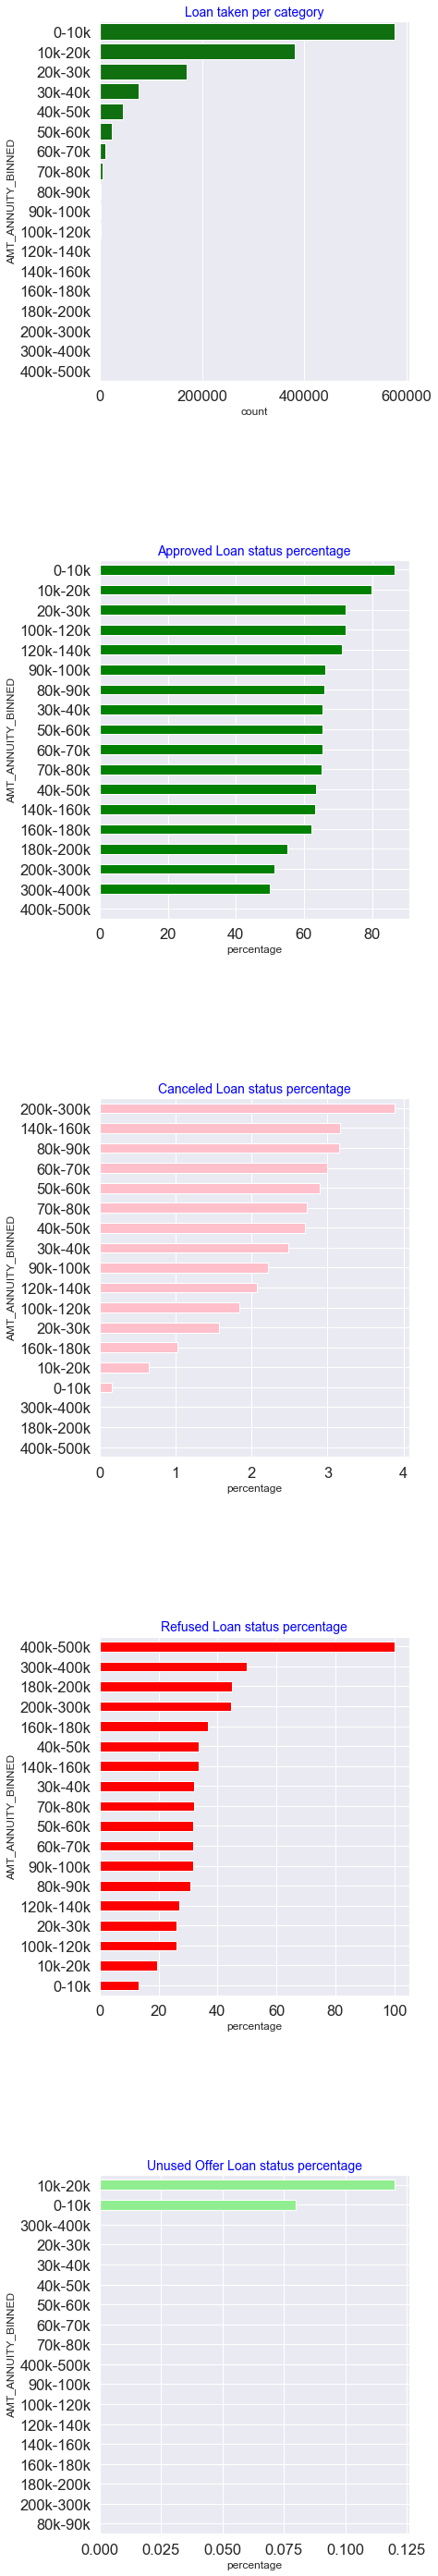

In [859]:
plot_loan_and_status('AMT_ANNUITY_BINNED',crosstab_df,prevapp_df.sort_values(by='AMT_ANNUITY_BINNED'),25)

## Observations from above plot
- Loan applications are highest for annuity amount in bin 1 i.e. annuity amount in range of [0,10k] - (576077 in number)
    - 98 loan applications with annuity amount in bin 14 i.e. in range [160k - 180k]
    - 4 loan applications with annuity amount in bin 18 i.e. in range [400k - 500k]
- Maximum loans are approved for annuity amount in bin 1 i.e  annuity amount in range of [0,10k] - 86.51%
- Maximum loans are cancelled for  annuity amount in bin 16 i.e. annuity amount in range of [200k - 300k] - 3.88%
- Maximum loans are refused for annuity amount in bin 18 i.e. annuity amount in range of [400k - 500k] - 100.0%
- Maximum loans are with unused offer for annuity amount in bin 2 i.e. annuity amount in range of [10k - 20k] - 0.12%

# Lets plot AMT_GOODS_PRICE distribution<a id='Goods Price of previous application'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

## Lets plot boxplot first

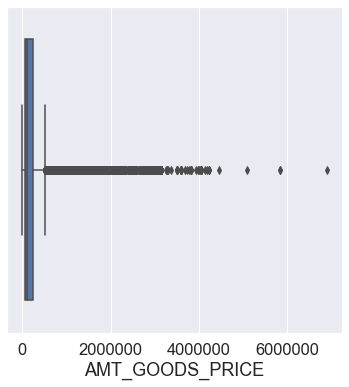

In [860]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(prevapp_df['AMT_GOODS_PRICE']);
ax.get_xaxis().get_major_formatter().set_scientific(False);

### Clearly there are many outliers
- Lets see the description to check statistics of this column

In [861]:
prevapp_df['AMT_GOODS_PRICE'].dropna().describe().apply(lambda x: format(x,'.2f'))

count    1284699.00
mean     227847.28 
std      315396.56 
min      0.00      
25%      50841.00  
50%      112320.00 
75%      234000.00 
max      6905160.00
Name: AMT_GOODS_PRICE, dtype: object

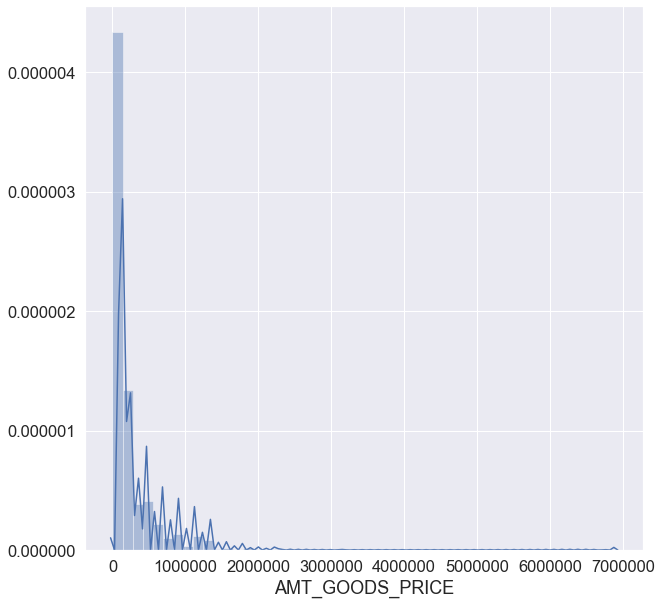

In [862]:
## Lets check for the distribution
plt.figure(figsize=(10,10))
ax = sns.distplot(prevapp_df['AMT_GOODS_PRICE'].dropna());
ax.get_xaxis().get_major_formatter().set_scientific(False);
ax.get_yaxis().get_major_formatter().set_scientific(False);

## Observations from above plot
- Its a right skewed distribution
- Maximum value of observation is 6905160.00
- Maximum observations are in th range of 0 - 120000.00

## Lets make bins of goods price amount to understand better on range and loan approval status

In [863]:
bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,120000,140000,160000,
        180000,200000,250000,500000,1000000,5000000,7000000]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ylabels = ['0-10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k',
          '100k-120k','120k-140k','140k-160k','160k-180k','180k-200k','200k-250k','250k-500k','500k-1mn',
          '1mn-5mn','5mn-7mn']
prevapp_df['AMT_GOODS_PRICE_BINNED'] = pd.cut(prevapp_df['AMT_GOODS_PRICE'], bins=bins, labels=ylabels)
prevapp_df.sample(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
181033   1508145     433528      Cash loans        NaN            
1501487  1465955     399839      Consumer loans     7834.230      
1447476  2661087     409845      Consumer loans     7215.795      
239866   1090662     362144      Revolving loans   NaN            
1054579  1241143     148977      Cash loans        NaN            

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
181033   0.000            0.000      NaN               NaN                
1501487  57811.500        55462.500   5782.5            57811.500         
1447476  63530.595        63530.595   0.0               63530.595         
239866   0.000            0.000      NaN               NaN                
1054579  0.000            0.000      NaN               NaN                

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
181033   WEDNESDAY                  12                        
1501487  THURSDAY                   12                        
1447476  MONDAY                     11                        
239866   FRIDAY                     13                        
1054579  WEDNESDAY                  10                        

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
181033   Y                           1                        
1501487  Y                           1                        
1447476  Y                           1                        
239866   Y                           1                        
1054579  Y                           1                        

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
181033  NaN                NaN                    NaN                         
1501487  0.102827          NaN                    NaN                         
1447476  0.000000          NaN                    NaN                         
239866  NaN                NaN                    NaN                         
1054579 NaN                NaN                    NaN                         

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
181033   XNA                    Canceled            -166             
1501487  XAP                    Approved            -1615            
1447476  XAP                    Approved            -283             
239866   XAP                    Canceled            -349             
1054579  XNA                    Canceled            -217             

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
181033   XNA                    XAP                NaN              
1501487  Cash through the bank  XAP                Family           
1447476  Cash through the bank  XAP                NaN              
239866   XNA                    XAP                NaN              
1054579  XNA                    XAP                NaN              

        NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
181033   Repeater         XNA                 XNA            XNA                
1501487  New              Audio/Video         POS            XNA                
1447476  Repeater         Mobile              POS            XNA                
239866   Repeater         XNA                 XNA            XNA                
1054579  Repeater         XNA                 XNA            XNA                

                    CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  \
181033   Credit and cash offices -1                 XNA                    
1501487  Country-wide             1600              Consumer electronics   
1447476  Country-wide             25                Connectivity           
239866   Credit and cash offices -1                 XNA                    
1054579  Credit and cash offices -1                 XNA                    

         CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  \
181033  NaN           XNA              Cash                          
15

In [864]:
## check for no. of observations in various bins
prevapp_df['AMT_GOODS_PRICE_BINNED'].value_counts()

250k-500k    160009
40k-50k      114851
200k-250k    93844 
500k-1mn     93651 
120k-140k    93365 
20k-30k      83248 
30k-40k      78498 
100k-120k    78195 
80k-90k      73653 
60k-70k      70059 
50k-60k      57858 
1mn-5mn      52684 
160k-180k    48378 
70k-80k      46867 
140k-160k    44408 
90k-100k     37020 
10k-20k      33322 
180k-200k    17631 
0-10k        285   
5mn-7mn      4     
Name: AMT_GOODS_PRICE_BINNED, dtype: int64

## Lets check for approval status in various bins of Goods Price Amount

In [865]:
## Lets look for the number of observations in each bin for target 1 and 0
prevapp_df.groupby('AMT_GOODS_PRICE_BINNED')['NAME_CONTRACT_STATUS'].value_counts()

AMT_GOODS_PRICE_BINNED  NAME_CONTRACT_STATUS
0-10k                   Approved                230   
                        Refused                 50    
                        Unused offer            5     
10k-20k                 Approved                29032 
                        Refused                 3430  
                        Unused offer            851   
                        Canceled                9     
20k-30k                 Approved                71805 
                        Refused                 7802  
                        Unused offer            3607  
                        Canceled                34    
30k-40k                 Approved                67786 
                        Refused                 7126  
                        Unused offer            3557  
                        Canceled                29    
40k-50k                 Approved                94339 
                        Refused                 17544 
                    

In [866]:
credit_count = prevapp_df['AMT_GOODS_PRICE_BINNED'].count()
prevapp_df.groupby('AMT_GOODS_PRICE_BINNED').apply(lambda x: x.count(0)/credit_count)[['AMT_GOODS_PRICE_BINNED']]

AMT_GOODS_PRICE_BINNED
AMT_GOODS_PRICE_BINNED                        
0-10k                   0.000223              
10k-20k                 0.026077              
20k-30k                 0.065148              
30k-40k                 0.061431              
40k-50k                 0.089880              
50k-60k                 0.045278              
60k-70k                 0.054827              
70k-80k                 0.036677              
80k-90k                 0.057639              
90k-100k                0.028971              
100k-120k               0.061194              
120k-140k               0.073065              
140k-160k               0.034753              
160k-180k               0.037859              
180k-200k               0.013798              
200k-250k               0.073440              
250k-500k               0.125219              
500k-1mn                0.073289              
1mn-5mn                 0.041229              
5mn-7mn                 0.000003

In [867]:
crosstab_df = pd.crosstab(prevapp_df['NAME_CONTRACT_STATUS'],
            prevapp_df['AMT_GOODS_PRICE_BINNED']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

AMT_GOODS_PRICE_BINNED  0-10k  10k-20k  20k-30k  30k-40k  40k-50k  50k-60k  \
NAME_CONTRACT_STATUS                                                         
Approved                80.70  87.13    86.25    86.35    82.14    85.97     
Canceled                0.00   0.03     0.04     0.04     0.13     0.05      
Refused                 17.54  10.29    9.37     9.08     15.28    9.78      
Unused offer            1.75   2.55     4.33     4.53     2.45     4.20      

AMT_GOODS_PRICE_BINNED  60k-70k  70k-80k  80k-90k  90k-100k  100k-120k  \
NAME_CONTRACT_STATUS                                                     
Approved                84.68    86.15    83.04    86.17     84.24       
Canceled                0.10     0.04     0.31     0.05      0.14        
Refused                 11.79    9.39     14.37    10.72     13.21       
Unused offer            3.43     4.42     2.28     3.06      2.41        

AMT_GOODS_PRICE_BINNED  120k-140k  140k-160k  160k-180k  180k-200k  200k-250k  \
NAME_CONTRACT_STATUS                                                            
Approved                79.13      82.03      77.52      84.72      70.84       
Canceled                0.52       0.26       0.44       0.26       1.09        
Refused                 18.28      15.94      21.53      14.41      27.87       
Unused offer            2.06       1.77       0.51       0.61       0.20        

AMT_GOODS_PRICE_BINNED  250k-500k  500k-1mn  1mn-5mn  5mn-7mn  
NAME_CONTRACT_STATUS                                           
Approved                68.52      59.62     47.84    75.0     
Canceled                1.89       2.91      4.58     0.0      
Refused                 29.48      37.40     47.56    25.0     
Unused offer            0.12       0.07      0.01     0.0

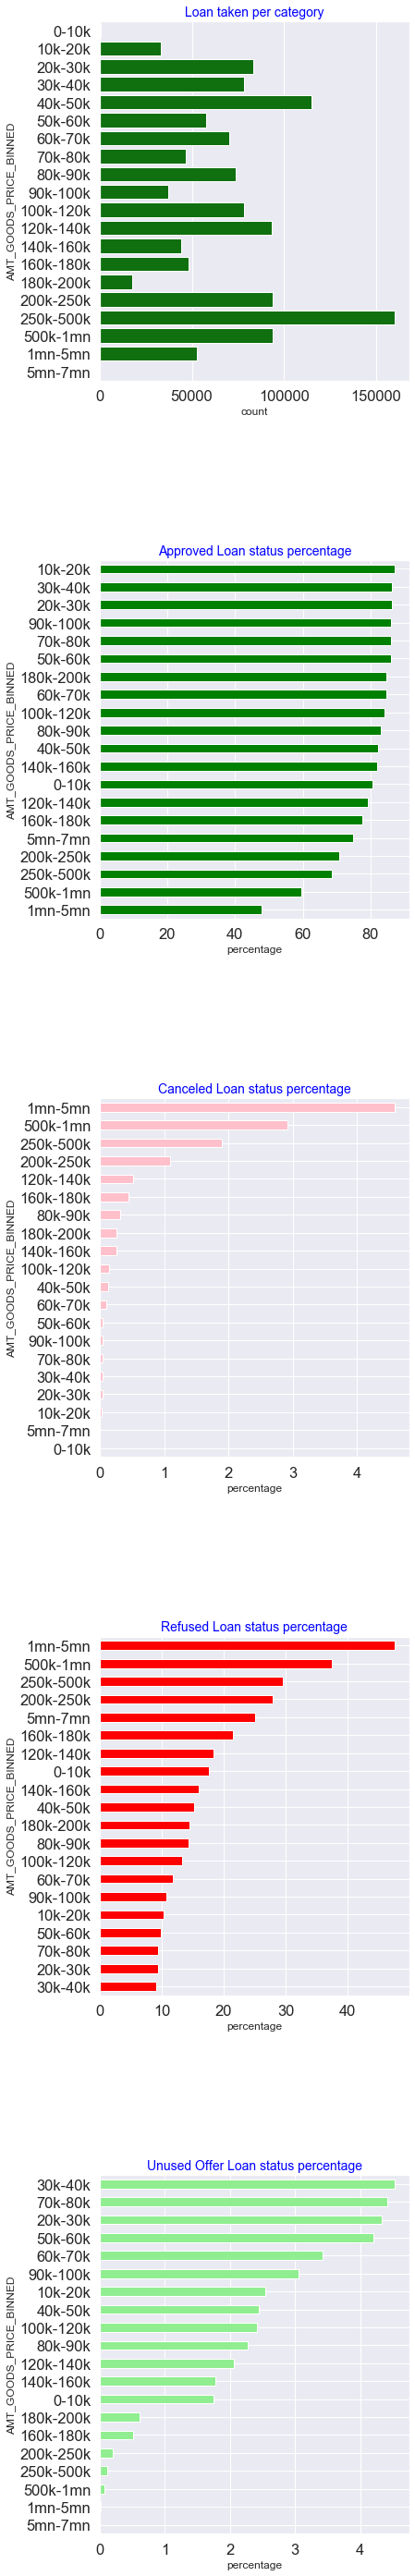

In [868]:
plot_loan_and_status('AMT_GOODS_PRICE_BINNED',crosstab_df,prevapp_df.sort_values(by='AMT_GOODS_PRICE_BINNED'),25)

## Observations from above plot
- Loan applications are highest for goods price amount in bin 17 i.e. goods price amount in range of [250k - 500k] - (160009 in number)
    - 4 loan applications with goods price amount in bin 20 i.e. in range [5000000,7000000]
    - 285 no. of loan applications with goods price amount in bin 1 i.e. in range [0 - 10k]
- Maximum loans are approved for goods price amount in bin 2 i.e  goods price amount in range of [10k - 20k] - 87.13%
- Maximum loans are cancelled for goods price amount in bin 19 i.e. goods price amount in range of [1mn - 5mn] - 4.58%
- Maximum loans are refused for goods price amount in bin 19 i.e. goods price amount in range of [1mn - 7mn] - 47.56%
- Maximum loans are with unused offer for goods price amount in bin 4 i.e. goods price amount in range of [30k - 40k] - 4.53%

In [869]:
prevapp_df['NAME_PRODUCT_TYPE'].value_counts()

XNA        1063320
x-sell     456287 
walk-in    150261 
Name: NAME_PRODUCT_TYPE, dtype: int64

In [870]:
prevapp_df['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled        316004 
Refused         290647 
Unused offer    26436  
Name: NAME_CONTRACT_STATUS, dtype: int64

# Lets aggregate previous application data<a id='Aggregate previous app data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [871]:
## Lets aggregate previous approved applications
approved_agg_df=pd.DataFrame(prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Approved'].groupby('SK_ID_CURR')['AMT_ANNUITY'].max())
approved_agg_df['APP_CNT']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Approved'].groupby('SK_ID_CURR')['AMT_ANNUITY'].count()
approved_agg_df['APP_AMT_CREDIT_MAX']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Approved'].groupby('SK_ID_CURR')['AMT_CREDIT'].max()
approved_agg_df['APP_AMT_GOODS_PRICE_MAX']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Approved'].groupby('SK_ID_CURR')['AMT_GOODS_PRICE'].max()
approved_agg_df['APP_CNT_ASSESSED_RISK'] = prevapp_df[(prevapp_df['NAME_CONTRACT_STATUS']=='Approved') & (prevapp_df['NAME_PRODUCT_TYPE'] == 'x-sell')].groupby('SK_ID_CURR')['NAME_PRODUCT_TYPE'].count()
approved_agg_df['APP_AMT_APPLICATION_MAX']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Approved'].groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
approved_agg_df['APP_AMT_DOWN_PAYMENT_MAX']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Approved'].groupby('SK_ID_CURR')['AMT_DOWN_PAYMENT'].max()
approved_agg_df['APP_AMT_GOODS_PRICE_MAX']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Approved'].groupby('SK_ID_CURR')['AMT_GOODS_PRICE'].max()
approved_agg_df['APP_CNT_PAYMENT_MAX']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Approved'].groupby('SK_ID_CURR')['CNT_PAYMENT'].max()
# approved_agg_df['APP_DAYS_LAST_DUE_MIN']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Approved'].groupby('SK_ID_CURR')['DAYS_LAST_DUE'].apply(lambda x: abs(x)).min()
# approved_agg_df['APP_DAYS_TERMINATION_MIN']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Approved'].groupby('SK_ID_CURR')['DAYS_TERMINATION'].apply(lambda x: abs(x)).min()



## Lets aggregate previous refused applications
refused_agg_df=pd.DataFrame(prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['AMT_ANNUITY'].max())
refused_agg_df['REF_CNT']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['AMT_ANNUITY'].count()
refused_agg_df['REF_AMT_CREDIT_MAX']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['AMT_CREDIT'].max()
refused_agg_df['REF_AMT_GOODS_PRICE_MAX']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['AMT_GOODS_PRICE'].max()
refused_agg_df['REF_CNT_ASSESSED_RISK'] = prevapp_df[(prevapp_df['NAME_CONTRACT_STATUS']=='Refused') & (prevapp_df['NAME_PRODUCT_TYPE'] == 'x-sell')].groupby('SK_ID_CURR')['NAME_PRODUCT_TYPE'].count()
refused_agg_df['REF_AMT_APPLICATION_MAX']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['AMT_APPLICATION'].max()
refused_agg_df['REF_AMT_DOWN_PAYMENT_MAX']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['AMT_DOWN_PAYMENT'].max()
refused_agg_df['REF_AMT_GOODS_PRICE_MAX']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['AMT_GOODS_PRICE'].max()
refused_agg_df['REF_CNT_PAYMENT_MAX']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['CNT_PAYMENT'].max()
# refused_agg_df['REF_DAYS_LAST_DUE_MIN']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['DAYS_LAST_DUE'].apply(lambda x: abs(x)).min()
# refused_agg_df['REF_DAYS_TERMINATION_MIN']=prevapp_df[prevapp_df['NAME_CONTRACT_STATUS']=='Refused'].groupby('SK_ID_CURR')['DAYS_TERMINATION'].apply(lambda x: abs(x)).min()

## Lets create new dataframe and call it as aggregate data frame
prevapp_agg_df = pd.DataFrame(columns=['SK_ID_CURR'])

#create new column in approved application dataframe which will have all current application Ids
approved_agg_df['SK_ID_CURR'] = approved_agg_df.index

#rename AMT_Annuity column with prefix APP to easily understand data column reference
approved_agg_df.rename(columns={'AMT_ANNUITY':'APP_AMT_ANNUITY_MAX'},inplace=True)

#drop index 
approved_agg_df = approved_agg_df.reset_index(drop=True)

#create new column in refused application dataframe which will have all current application Ids
refused_agg_df['SK_ID_CURR'] = refused_agg_df.index

#rename AMT_Annuity column with prefix REF to easily understand data column reference
refused_agg_df.rename(columns={'AMT_ANNUITY':'REF_AMT_ANNUITY_MAX'},inplace=True)

#drop index 
refused_agg_df = refused_agg_df.reset_index(drop=True)

#Store Cuurent Application Id in new aggregate dataframe
prevapp_agg_df['SK_ID_CURR'] = pd.Series(prevapp_df['SK_ID_CURR'].unique())

#Join Approved applciation dataframe with newly created aggregated dataframe
prevapp_agg_df = prevapp_agg_df.merge(approved_agg_df,on='SK_ID_CURR',how='left')

#Join Refused applciation dataframe with newly created aggregated dataframe
prevapp_agg_df = prevapp_agg_df.merge(refused_agg_df,on='SK_ID_CURR',how='left')

#check few observations from aggregated dataframe
prevapp_agg_df.head(10)


SK_ID_CURR  APP_AMT_ANNUITY_MAX  APP_CNT  APP_AMT_CREDIT_MAX  \
0  271877      12417.390            2.0      119848.5             
1  108129      25188.615            6.0      679671.0             
2  122040      15060.735            3.0      136444.5             
3  176158      47041.335            6.0      470790.0             
4  202054      42778.845            8.0      744498.0             
5  199383      31527.765            5.0      340573.5             
6  175704      12798.765            3.0      135000.0             
7  296299      21709.125            5.0      512370.0             
8  342292      21959.865            8.0      393264.0             
9  334349      15157.935            3.0      394524.0             

   APP_AMT_GOODS_PRICE_MAX  APP_CNT_ASSESSED_RISK  APP_AMT_APPLICATION_MAX  \
0  108400.5                NaN                     108400.5                  
1  607500.0                 3.0                    607500.0                  
2  112500.0                 2.0                    112500.0                  
3  450000.0                 5.0                    450000.0                  
4  675000.0                 2.0                    675000.0                  
5  315000.0                 3.0                    315000.0                  
6  148248.0                 1.0                    148248.0                  
7  450000.0                 3.0                    450000.0                  
8  360000.0                 3.0                    360000.0                  
9  346500.0                 1.0                    346500.0                  

   APP_AMT_DOWN_PAYMENT_MAX  APP_CNT_PAYMENT_MAX  REF_AMT_ANNUITY_MAX  \
0  0.0                       12.0                 68258.655             
1  24750.0                   36.0                NaN                    
2  9571.5                    12.0                NaN                    
3 NaN                        18.0                 56907.675             
4  5490.0                    36.0                 37813.680             
5  0.0                       18.0                NaN                    
6  14827.5                   12.0                NaN                    
7  0.0                       36.0                 25996.365             
8  19350.0                   48.0                 11250.000             
9  7416.0                    36.0                NaN                    

   REF_CNT  REF_AMT_CREDIT_MAX  REF_AMT_GOODS_PRICE_MAX  \
0  1.0      1754721.0           1800000.0                 
1 NaN      NaN                 NaN                        
2 NaN      NaN                 NaN                        
3  15.0     709749.0            675000.0                  
4  9.0      616756.5            495000.0                  
5 NaN      NaN                 NaN                        
6 NaN      NaN                 NaN                        
7  4.0      681444.0            549000.0                  
8  3.0      225000.0            225000.0                  
9 NaN      NaN                 NaN                        

   REF_CNT_ASSESSED_RISK  REF_AMT_APPLICATION_MAX  REF_AMT_DOWN_PAYMENT_MAX  \
0 NaN                     1800000.0                180000.00                  
1 NaN                    NaN                      NaN                         
2 NaN                    NaN                      NaN                         
3  11.0                   675000.0                 10525.95                   
4  5.0                    495000.0                NaN                         
5 NaN                    NaN                      NaN                         
6 NaN                    NaN                      NaN                         
7  2.0                    549000.0                NaN                         
8 NaN                     225000.0                 7623.00                    
9 NaN                    NaN                      NaN                         

   REF_CNT_PAYMENT_MAX  
0  36.0                 
1 NaN                   
2 NaN  

In [872]:
#Lets check for number of rows and columns in aggregate dataframe
print('No. of rows:{0} and columns:{1} in aggregated dataframe'.format(prevapp_agg_df.shape[0],prevapp_agg_df.shape[1]))

No. of rows:338857 and columns:17 in aggregated dataframe


In [873]:
## In other words lets check the shape
prevapp_agg_df.shape

(338857, 17)

In [874]:
appsubset_df.shape

(307511, 78)

In [875]:
prevapp_df.sample(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
598532   1892568     300901      Cash loans        NaN            
1663056  1925696     280435      Cash loans         12920.580     
109681   2375269     380477      Consumer loans    NaN            
915968   1896233     224997      Consumer loans     6055.515      
560347   2768870     184847      Cash loans        NaN            
149134   1330016     214569      Consumer loans     5773.635      
835235   1203166     145649      Cash loans        NaN            
1579754  1015802     246924      Revolving loans    11250.000     
102181   2114955     118334      Revolving loans   NaN            
96926    2516258     140865      Cash loans         23844.780     

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
598532   0.0              0.0        NaN               NaN                
1663056  229500.0         265851.0   NaN                229500.0          
109681   450000.0         450000.0   NaN                450000.0          
915968   52461.0          51889.5     5247.0            52461.0           
560347   0.0              0.0        NaN               NaN                
149134   37660.5          30127.5     7533.0            37660.5           
835235   0.0              0.0        NaN               NaN                
1579754  225000.0         225000.0   NaN                225000.0          
102181   0.0              0.0        NaN               NaN                
96926    454500.0         526491.0   NaN                454500.0          

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
598532   WEDNESDAY                  16                        
1663056  MONDAY                     12                        
109681   WEDNESDAY                  10                        
915968   MONDAY                     13                        
560347   MONDAY                     11                        
149134   SATURDAY                   11                        
835235   SUNDAY                     9                         
1579754  SUNDAY                     13                        
102181   WEDNESDAY                  12                        
96926    WEDNESDAY                  12                        

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
598532   Y                           1                        
1663056  Y                           1                        
109681   Y                           1                        
915968   Y                           1                        
560347   Y                           1                        
149134   Y                           1                        
835235   Y                           1                        
1579754  Y                           1                        
102181   Y                           1                        
96926    Y                           1                        

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
598532  NaN                NaN                    NaN                         
1663056 NaN                NaN                    NaN                         
109681  NaN                NaN                    NaN                         
915968   0.100014          NaN                    NaN                         
560347  NaN                NaN                    NaN                         
149134   0.217844          NaN                    NaN                         
835235  NaN                NaN                    NaN                         
1579754 NaN                NaN                    NaN                         
102181  NaN                NaN                    NaN                         
96926   NaN                NaN                    NaN                         

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
598532   XNA                    Canceled            -156             
1663056  XNA                    Approved       

# Merge current application dataframe and previous application dataframe<a id='Merge previous and current app data'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [876]:
#Lets copy dataframe
appsubset_copy_df = appsubset_df.copy()

In [877]:
print('No. of rows: {0} and columns: {1} in current application dataframe before merging both dataframes'
      .format(appsubset_df.shape[0],appsubset_df.shape[1]))
appsubset_df = appsubset_df.merge(prevapp_agg_df,on='SK_ID_CURR',how='left')
print('No. of rows: {0} and columns: {1} in current application dataframe after merging both dataframes'
      .format(appsubset_df.shape[0],appsubset_df.shape[1]))
appsubset_df.sample(10)

No. of rows: 307511 and columns: 78 in current application dataframe before merging both dataframes
No. of rows: 307511 and columns: 94 in current application dataframe after merging both dataframes


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
276559  420487      0       Cash loans         F           N             
19381   122606      0       Cash loans         M           Y             
45500   152696      0       Cash loans         F           N             
198735  330422      0       Cash loans         M           N             
97273   212926      0       Revolving loans    M           N             
105139  222000      0       Cash loans         F           Y             
298116  445377      0       Cash loans         M           Y             
95646   211038      0       Cash loans         M           Y             
257967  398529      0       Revolving loans    F           N             
224935  360544      0       Cash loans         F           N             

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
276559  N               0             85500.0           679500.0     
19381   Y               0             157500.0          1051294.5    
45500   N               0             157500.0          544068.0     
198735  N               0             121500.0          315000.0     
97273   Y               0             112500.0          202500.0     
105139  Y               0             337500.0          545040.0     
298116  Y               2             193500.0          508495.5     
95646   N               0             99000.0           444420.0     
257967  Y               0             225000.0          270000.0     
224935  N               0             72000.0           1125000.0    

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
276559  26946.0      679500.0         Unaccompanied    Working                
19381   30870.0      918000.0         Family           Commercial associate   
45500   20641.5      382500.0         Unaccompanied    Working                
198735  33925.5      315000.0         Unaccompanied    Working                
97273   10125.0      202500.0         Spouse, partner  Working                
105139  26640.0      450000.0         Family           Commercial associate   
298116  35518.5      454500.0         Unaccompanied    Working                
95646   17055.0      337500.0         Unaccompanied    Working                
257967  13500.0      270000.0         Family           Commercial associate   
224935  29808.0      1125000.0        Unaccompanied    Working                

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
276559  Secondary / secondary special  Married            House / apartment     
19381   Secondary / secondary special  Married            House / apartment     
45500   Secondary / secondary special  Separated          Municipal apartment   
198735  Higher education               Married            House / apartment     
97273   Lower secondary                Civil marriage     House / apartment     
105139  Secondary / secondary special  Married            House / apartment     
298116  Secondary / secondary special  Married            House / apartment     
95646   Secondary / secondary special  Married            House / apartment     
257967  Secondary / secondary special  Married            House / apartment     
224935  Secondary / secondary special  Married            House / apartment     

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
276559  0.014520                   -16938      -1426            
19381   0.010147                   -19511      -4               
45500   0.006305                   -14797      -872             
198735  0.031329                   -9210       -1255            
97273   0.007120                   -13261      -96              
105139  0.024610                   -17861      -813             
298116  0.032561                   -11817      -2151            
95646   0.010500                   -19816      -787             
257967  0.026392                   -18524      -468             
224935  0.

# Lets divide the dataframe into two subdataframes with Target variable as 0(repayer) and 1(defaulter)<a id='Divide dataframe into repayer and defaulter subset'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [878]:
# Dataframe with traget value as 0
appsubset_repayer_df = appsubset_df[appsubset_df['TARGET']==0]
print('no of rows: {0} and no of columns: {1} in repayer dataframe with TARGET value "0"'.
      format(appsubset_repayer_df.shape[0],appsubset_repayer_df.shape[1]))
appsubset_repayer_df.head()

no of rows: 282686 and no of columns: 94 in repayer dataframe with TARGET value "0"


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1  100003      0       Cash loans         F           N             
2  100004      0       Revolving loans    M           Y             
3  100006      0       Cash loans         F           N             
4  100007      0       Cash loans         M           N             
5  100008      0       Cash loans         M           N             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1  N               0             270000.0          1293502.5   35698.5       
2  Y               0             67500.0           135000.0    6750.0        
3  Y               0             135000.0          312682.5    29686.5       
4  Y               0             121500.0          513000.0    21865.5       
5  Y               0             99000.0           490495.5    27517.5       

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1  1129500.0        Family           State servant     
2  135000.0         Unaccompanied    Working           
3  297000.0         Unaccompanied    Working           
4  513000.0         Unaccompanied    Working           
5  454500.0         Spouse, partner  State servant     

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1  Higher education               Married               House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special  Civil marriage        House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special  Married               House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1  0.003541                   -16765      -1188          -1186.0              
2  0.010032                   -19046      -225           -4260.0              
3  0.008019                   -19005      -3039          -9833.0              
4  0.028663                   -19932      -3038          -4311.0              
5  0.035792                   -16941      -1588          -4970.0              

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1 -291             NaN           1           1               0                 
2 -2531             26.0         1           1               1                 
3 -2437            NaN           1           1               0                 
4 -3458            NaN           1           1               0                 
5 -477             NaN           1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1  1                 1           0           Core staff      2.0               
2  1                 1           0           Laborers        1.0               
3  1                 0           0           Laborers        2.0               
4  1                 0           0           Core staff      1.0               
5  1                 1           0           Laborers        2.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1  1                     1                             
2  2                     2                             
3  2                     2                             
4  2                     2                             
5  2                     2                             

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1  MONDAY                     11                        
2  MONDAY                     9                         
3  WEDNESDAY                  17                        
4  THURSDAY                   11                        
5  WEDNESDAY                  16                        

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1  0                           0                            
2  0                           0                            
3  0               

In [879]:
# Dataframe with traget value as 1
appsubset_defaulter_df = appsubset_df[appsubset_df['TARGET']==1]
print('no of rows: {0} and no of columns: {1} in defaulter datframe with TARGET value "1"'.
      format(appsubset_defaulter_df.shape[0],appsubset_defaulter_df.shape[1]))

appsubset_defaulter_df.head()

no of rows: 24825 and no of columns: 94 in defaulter datframe with TARGET value "1"


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0   100002      1       Cash loans         M           N             
26  100031      1       Cash loans         F           N             
40  100047      1       Cash loans         M           N             
42  100049      1       Cash loans         F           N             
81  100096      1       Cash loans         F           N             

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0   Y               0             202500.0          406597.5    24700.5       
26  Y               0             112500.0          979992.0    27076.5       
40  Y               0             202500.0          1193580.0   35028.0       
42  N               0             135000.0          288873.0    16258.5       
81  Y               0             81000.0           252000.0    14593.5       

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0   351000.0         Unaccompanied   Working                
26  702000.0         Unaccompanied   Working                
40  855000.0         Unaccompanied   Commercial associate   
42  238500.0         Unaccompanied   Working                
81  252000.0         Unaccompanied   Pensioner              

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special  Widow                 House / apartment   
40  Secondary / secondary special  Married               House / apartment   
42  Secondary / secondary special  Civil marriage        House / apartment   
81  Secondary / secondary special  Married               House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0   0.018801                   -9461       -637           -3648.0              
26  0.018029                   -18724      -2628          -6573.0              
40  0.025164                   -17482      -1262          -1182.0              
42  0.007305                   -13384      -3597          -45.0                
81  0.028663                   -24794       365243        -5391.0              

    DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  -2120            NaN           1           1               0                 
26 -1827            NaN           1           1               0                 
40 -1029            NaN           1           1               0                 
42 -4409            NaN           1           1               1                 
81 -4199            NaN           1           0               0                 

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0   1                 1           0           Laborers        1.0               
26  1                 0           0           Cooking staff   1.0               
40  1                 0           0           Laborers        2.0               
42  1                 1           0           Sales staff     2.0               
81  1                 0           0           NaN             2.0               

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0   2                     2                             
26  3                     2                             
40  2                     2                             
42  3                     3                             
81  2                     2                             

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0   WEDNESDAY                  10                        
26  MONDAY                     9                         
40  TUESDAY                    9                         
42  THURSDAY                   11                        
81  THURSDAY                   10                        

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0   0                           0                            
2

# Correlation between Numeric Columns<a id='Correlation between numeric columns'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>

In [880]:
def plot_lmplot(subset_df,x_feature,y_feature,another_row=False,height=8):
    plt.figure(figsize=(18,8))
    sns.lmplot(x_feature,y_feature,data=appsubset_df,hue='TARGET');
    plt.ylabel('lm plot', fontsize=12)
    plt.xlabel(x_feature, fontsize=12)
    plt.title(x_feature + ' ' + y_feature +' lm Plot',color='blue',fontsize=14)
    #locs, labels = plt.xticks()
    #plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend();

def pairplot_features(subset_df,numerical_features,target):
    features_count = len(numerical_features)
    for i in range(0,features_count,2):
        if (i+1)<features_count:
            g=sns.pairplot(subset_df, kind='reg', x_vars=numerical_features[i:i+2],y_vars = target)
        else:
            g=sns.pairplot(subset_df, kind='reg', x_vars=numerical_features[i],y_vars = target)
        g.fig.set_size_inches(10,5)

In [881]:
# numerical_features = ['AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','TARGET']
# sns.pairplot(appsubset_df[numerical_features].dropna(),kind='reg',hue='TARGET');

In [882]:
#correlation between numerical features
numerical_features = list(appsubset_df.select_dtypes(include=np.number))
print('total number of items in numerical columns list: {0}'.format(len(numerical_features)))
numerical_features
#appsubset_df[numerical_features].corr().round(2)

total number of items in numerical columns list: 79


['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 '

In [883]:
numerical_features.remove('SK_ID_CURR')
numerical_features.remove('TARGET')
print('total number of items in numerical columns list: {0}'.format(len(numerical_features)))

total number of items in numerical columns list: 77


## Correlation matrix for highly correlated features of repayer dataframe

In [884]:
appsubset_repayer_corr = appsubset_repayer_df[numerical_features].corr()
appsubset_repayer_corr.style.apply(lambda x: ["background: red" if abs(v) > 0.7 else "" for v in x], axis = 1)


## Correlation matrix for highly correlated features of defaulter dataframe

In [885]:
appsubset_defaulter_corr = appsubset_defaulter_df[numerical_features].corr()
appsubset_defaulter_corr.style.apply(lambda x: ["background: red" if abs(v) > 0.7 else "" for v in x], axis = 1)


### Function to get list of top correlated features

In [886]:
def pairs_to_drop(all_numericalcols_df):
    pairs_to_drop = set()
    cols = all_numericalcols_df.columns
    for i in range(0, all_numericalcols_df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(subset_df, n=5):
    #unstack the correlation. Take absolute because correlation cab enegative too
    subset_corr = subset_df.corr().abs().unstack()
    
    #call the custom function
    labels_to_drop = pairs_to_drop(subset_df)
    
    #drop the pairs as received from custom function
    subset_corr = subset_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    
    #return the list of highly correlated features
    return subset_corr[0:n]

## Top 10 correlated features for repayer dataframe i.e Target variable = 0

In [887]:
print("Top Absolute Correlations for repayer dataframe")
repayer_corr_list = get_top_abs_correlations(appsubset_repayer_df[numerical_features], 10)
repayer_corr_list

Top Absolute Correlations for repayer dataframe


APP_AMT_GOODS_PRICE_MAX   APP_AMT_APPLICATION_MAX        1.000000
REF_AMT_GOODS_PRICE_MAX   REF_AMT_APPLICATION_MAX        0.999840
DAYS_EMPLOYED             FLAG_EMP_PHONE                 0.999758
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE       0.998508
REF_AMT_CREDIT_MAX        REF_AMT_GOODS_PRICE_MAX        0.990385
AMT_CREDIT                AMT_GOODS_PRICE                0.987250
REF_AMT_CREDIT_MAX        REF_AMT_APPLICATION_MAX        0.985329
APP_AMT_CREDIT_MAX        APP_AMT_GOODS_PRICE_MAX        0.981432
                          APP_AMT_APPLICATION_MAX        0.981138
REGION_RATING_CLIENT      REGION_RATING_CLIENT_W_CITY    0.950149
dtype: float64

## Top 10 correlated features for defaulter dataframe i.e Target variable = 1

In [888]:
print("Top Absolute Correlations for defaulter dataframe")
defaulter_corr_list = get_top_abs_correlations(appsubset_defaulter_df[numerical_features], 10)
defaulter_corr_list

Top Absolute Correlations for defaulter dataframe


APP_AMT_GOODS_PRICE_MAX   APP_AMT_APPLICATION_MAX        1.000000
REF_AMT_GOODS_PRICE_MAX   REF_AMT_APPLICATION_MAX        0.999738
DAYS_EMPLOYED             FLAG_EMP_PHONE                 0.999702
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE       0.998269
REF_AMT_CREDIT_MAX        REF_AMT_GOODS_PRICE_MAX        0.990211
                          REF_AMT_APPLICATION_MAX        0.985338
AMT_CREDIT                AMT_GOODS_PRICE                0.983103
APP_AMT_CREDIT_MAX        APP_AMT_GOODS_PRICE_MAX        0.979421
                          APP_AMT_APPLICATION_MAX        0.979241
REGION_RATING_CLIENT      REGION_RATING_CLIENT_W_CITY    0.956637
dtype: float64

In [889]:
repayer_col_list = list(chain.from_iterable(repayer_corr_list.index))
repayer_col_list

['APP_AMT_GOODS_PRICE_MAX',
 'APP_AMT_APPLICATION_MAX',
 'REF_AMT_GOODS_PRICE_MAX',
 'REF_AMT_APPLICATION_MAX',
 'DAYS_EMPLOYED',
 'FLAG_EMP_PHONE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REF_AMT_CREDIT_MAX',
 'REF_AMT_GOODS_PRICE_MAX',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'REF_AMT_CREDIT_MAX',
 'REF_AMT_APPLICATION_MAX',
 'APP_AMT_CREDIT_MAX',
 'APP_AMT_GOODS_PRICE_MAX',
 'APP_AMT_CREDIT_MAX',
 'APP_AMT_APPLICATION_MAX',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY']

In [890]:
defaulter_col_list = list(chain.from_iterable(defaulter_corr_list.index))
defaulter_col_list

['APP_AMT_GOODS_PRICE_MAX',
 'APP_AMT_APPLICATION_MAX',
 'REF_AMT_GOODS_PRICE_MAX',
 'REF_AMT_APPLICATION_MAX',
 'DAYS_EMPLOYED',
 'FLAG_EMP_PHONE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REF_AMT_CREDIT_MAX',
 'REF_AMT_GOODS_PRICE_MAX',
 'REF_AMT_CREDIT_MAX',
 'REF_AMT_APPLICATION_MAX',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'APP_AMT_CREDIT_MAX',
 'APP_AMT_GOODS_PRICE_MAX',
 'APP_AMT_CREDIT_MAX',
 'APP_AMT_APPLICATION_MAX',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY']

In [891]:
target_corr_df = pd.DataFrame(columns=['REPAYER_CORRELATED_COLS','DEFAULTER_CORRELATED_COLS'])
target_corr_df['REPAYER_CORRELATED_COLS']=pd.Series(repayer_col_list)
target_corr_df['DEFAULTER_CORRELATED_COLS'] = pd.Series(defaulter_col_list)
target_corr_df

REPAYER_CORRELATED_COLS    DEFAULTER_CORRELATED_COLS
0   APP_AMT_GOODS_PRICE_MAX      APP_AMT_GOODS_PRICE_MAX    
1   APP_AMT_APPLICATION_MAX      APP_AMT_APPLICATION_MAX    
2   REF_AMT_GOODS_PRICE_MAX      REF_AMT_GOODS_PRICE_MAX    
3   REF_AMT_APPLICATION_MAX      REF_AMT_APPLICATION_MAX    
4   DAYS_EMPLOYED                DAYS_EMPLOYED              
5   FLAG_EMP_PHONE               FLAG_EMP_PHONE             
6   OBS_30_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE   
7   OBS_60_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE   
8   REF_AMT_CREDIT_MAX           REF_AMT_CREDIT_MAX         
9   REF_AMT_GOODS_PRICE_MAX      REF_AMT_GOODS_PRICE_MAX    
10  AMT_CREDIT                   REF_AMT_CREDIT_MAX         
11  AMT_GOODS_PRICE              REF_AMT_APPLICATION_MAX    
12  REF_AMT_CREDIT_MAX           AMT_CREDIT                 
13  REF_AMT_APPLICATION_MAX      AMT_GOODS_PRICE            
14  APP_AMT_CREDIT_MAX           APP_AMT_CREDIT_MAX         
15  APP_AMT_GOODS_PRICE_MAX      APP_AMT_GOODS_PRICE_MAX    
16  APP_AMT_CREDIT_MAX           APP_AMT_CREDIT_MAX         
17  APP_AMT_APPLICATION_MAX      APP_AMT_APPLICATION_MAX    
18  REGION_RATING_CLIENT         REGION_RATING_CLIENT       
19  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT_W_CITY

## Observations from above correlation matrix
- Almost all highly correlated features are same for Target variable 1 and 0 except below
    - In repayer dataframe below features are highly correlated while not in defaulter dataframe
        - REG_CITY_NOT_WORK_CITY     -      LIVE_CITY_NOT_WORK_CITY       -       0.830381
        - <font color='blue'> This could be because person living and working in city are highly correlated features and it could be infered that there are less chances of people with good working and living conditions to default loan</font>
    - In defaulter dataframe below features are highly correlated while not in repayer dataframe
        - APP_AMT_ANNUITY_MAX        -        APP_AMT_CREDIT_MAX          -         0.844615
        - <font color='blue'> This could be because during previous loan application what was the amount credited to customer and what was the annuity are highly correlated features and it could be infered that people with high annuity amount or people with high loan/credit amount can tend to default on loan</font>
        - Please note that APP_MT_ANNUITY_MAX and APP_AMT_CREDIT_MAX are features from previous loan application dataframe

## Hypothesis from above data of correlation matrix <a id='Hypothesis I'></a>
<div align="right"><a href='#Table of Contents'>Back to Table of Contents</a></div>
- Null Hypothesis -> There is no relationship of columns that can explain the loan repayment or loan default
- Alternate Hypothesis -> There is a relationship between columns that can explain the loan repayment and loan default
- Employment status of person, Family member count, Credit Amount, City of person living affect the condition that whether person will be able to repay the loan
- Employment status of person, Family member count, Credit Amount, Approved Annuity Amount, Approved Credit Amount affect the condition that whether person will default the loan
- Almost all deciding factors are same for Repayer and Defaulter except for Approved Credit Amount and Approved Annuity Amount of previous application for default on loan and address or person living and working in differet cities for loan repayment

# Load bureau application data

In [892]:
bureau_df = pd.read_csv('./dataset/bureau.csv')
bureau_df.sample(10)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
747833   259527      6628599       Active        currency 1     -1             
1561063  135639      5631592       Closed        currency 1     -1389          
654387   280688      6787550       Closed        currency 1     -1391          
1394139  220588      5310004       Active        currency 1     -2846          
860079   388642      6041553       Active        currency 1     -372           
1297785  348351      6329870       Active        currency 1     -291           
1654769  186562      6651603       Active        currency 1     -2620          
59009    383940      5237296       Closed        currency 1     -316           
1363895  103375      5413424       Active        currency 1     -293           
401270   193282      5087453       Active        currency 1     -1350          

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
747833   0                   60.0                NaN                  
1561063  0                  -935.0               -875.0               
654387   0                  -1114.0              -1087.0              
1394139  0                  -2664.0              NaN                  
860079   0                   176.0               NaN                  
1297785  0                   803.0               NaN                  
1654769  0                  NaN                  NaN                  
59009    0                   1510.0              -124.0               
1363895  0                  -113.0               NaN                  
401270   0                  -617.0               NaN                  

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
747833  NaN                      0                   45000.0          
1561063 NaN                      0                   122395.5         
654387  NaN                      0                   68134.5          
1394139 NaN                      0                   62473.5          
860079  NaN                      0                   192411.0         
1297785  0.00                    0                   360000.0         
1654769  6609.51                 0                   198000.0         
59009    0.00                    0                   1176093.0        
1363895  0.00                    0                   122841.0         
401270   0.00                    0                   0.0              

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
747833   45000.000           NaN                    0.0                      
1561063 NaN                  NaN                    0.0                      
654387   0.000                0.00                  0.0                      
1394139  0.000                0.00                  0.0                      
860079   91710.000            0.00                  0.0                      
1297785  268875.000           0.00                  0.0                      
1654769  119475.000           78523.83              0.0                      
59009    0.000                0.00                  0.0                      
1363895  103388.805           0.00                  0.0                      
401270   0.000                0.00                  0.0                      

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
747833   Consumer credit  0                  NaN           
1561063  Consumer credit -872                NaN           
654387   Consumer credit -867                NaN           
1394139  Consumer credit -2654               NaN           
860079   Consumer credit -14                 NaN           
1297785  Consumer credit -10                 NaN           
1654769  Credit card     -23                  0.0          
59009    Consumer credit -124                NaN           
1363895  Consumer credit -166                NaN           
401270   Credit card     -651                NaN

In [893]:
bureau_df[bureau_df['SK_ID_CURR']==223007]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
86198  223007      5731027       Active        currency 1     -39            
86199  223007      5731028       Active        currency 1     -277           

       CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
86198  0                   966.0               NaN                  
86199  0                  NaN                  NaN                  

       AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
86198 NaN                      0                   67500.0          
86199  0.0                     0                   225000.0         

       AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
86198  0.0                  0.0                   0.0                      
86199  213511.5             11488.5               0.0                      

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
86198  Credit card -11                 NaN           
86199  Credit card -33                 NaN

In [894]:
prevapp_df[prevapp_df['SK_ID_CURR']==223007]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
167639   2353089     223007      Cash loans         18697.500     
202204   1899641     223007      Cash loans         33490.485     
338043   1738624     223007      Revolving loans    11250.000     
340638   1217797     223007      Consumer loans     6689.835      
611378   1072497     223007      Cash loans         25945.605     
698389   2651378     223007      Cash loans         29017.170     
1238442  1095702     223007      Cash loans        NaN            
1248362  1257828     223007      Consumer loans     15901.425     
1663354  1805652     223007      Cash loans        NaN            

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
167639   450000.0         450000.0   NaN                450000.0          
202204   450000.0         481185.0   NaN                450000.0          
338043   0.0              225000.0   NaN               NaN                
340638   61807.5          60214.5     6183.0            61807.5           
611378   450000.0         491580.0   NaN                450000.0          
698389   819000.0         819000.0   NaN                819000.0          
1238442  0.0              0.0        NaN               NaN                
1248362  146911.5         143127.0    14692.5           146911.5          
1663354  0.0              0.0        NaN               NaN                

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
167639   WEDNESDAY                  9                         
202204   THURSDAY                   9                         
338043   WEDNESDAY                  9                         
340638   SATURDAY                   9                         
611378   SUNDAY                     10                        
698389   THURSDAY                   17                        
1238442  SUNDAY                     10                        
1248362  MONDAY                     8                         
1663354  SUNDAY                     5                         

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
167639   Y                           1                        
202204   Y                           1                        
338043   Y                           1                        
340638   Y                           1                        
611378   Y                           1                        
698389   Y                           1                        
1238442  Y                           1                        
1248362  Y                           1                        
1663354  Y                           1                        

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
167639  NaN                NaN                    NaN                         
202204  NaN                NaN                    NaN                         
338043  NaN                NaN                    NaN                         
340638   0.101417          NaN                    NaN                         
611378  NaN                NaN                    NaN                         
698389  NaN                NaN                    NaN                         
1238442 NaN                NaN                    NaN                         
1248362  0.101391          NaN                    NaN                         
1663354 NaN                NaN                    NaN                         

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
167639   XNA                    Approved            -1248            
202204   XNA                    Approved            -232             
338043   XAP                    Approved            -1248            
340638   XAP                    Approved            -2484            
611378   Repairs                Refused             -236             
698389   XNA                    Approved            -652             
1238442  XNA                    Canceled    

In [895]:
prevapp_agg_df[prevapp_agg_df['SK_ID_CURR']==223007]

SK_ID_CURR  APP_AMT_ANNUITY_MAX  APP_CNT  APP_AMT_CREDIT_MAX  \
120424  223007      33490.485            6.0      819000.0             

        APP_AMT_GOODS_PRICE_MAX  APP_CNT_ASSESSED_RISK  \
120424  819000.0                 4.0                     

        APP_AMT_APPLICATION_MAX  APP_AMT_DOWN_PAYMENT_MAX  \
120424  819000.0                 14692.5                    

        APP_CNT_PAYMENT_MAX  REF_AMT_ANNUITY_MAX  REF_CNT  REF_AMT_CREDIT_MAX  \
120424  60.0                 25945.605            1.0      491580.0             

        REF_AMT_GOODS_PRICE_MAX  REF_CNT_ASSESSED_RISK  \
120424  450000.0                NaN                      

        REF_AMT_APPLICATION_MAX  REF_AMT_DOWN_PAYMENT_MAX  REF_CNT_PAYMENT_MAX  
120424  450000.0                NaN                        24.0

In [897]:
prevapp_df[(prevapp_df['SK_ID_CURR']==223007) &
           (prevapp_df['NAME_CONTRACT_STATUS']=='Approved')
          ].groupby('SK_ID_CURR')['DAYS_TERMINATION'].apply(lambda x: abs(x)).min()

376.0

In [899]:
#In terms of missing%
percent_missing_agg = appsubset_df.isnull().sum() * 100 / len(appsubset_df)
missing_agg_value_df = pd.DataFrame({'column_name': appsubset_df.columns,
                                 'percent_missing': percent_missing_agg})
missing_agg_value_df

column_name  percent_missing
SK_ID_CURR                   SK_ID_CURR                   0.000000       
TARGET                       TARGET                       0.000000       
NAME_CONTRACT_TYPE           NAME_CONTRACT_TYPE           0.000000       
CODE_GENDER                  CODE_GENDER                  0.000000       
FLAG_OWN_CAR                 FLAG_OWN_CAR                 0.000000       
FLAG_OWN_REALTY              FLAG_OWN_REALTY              0.000000       
CNT_CHILDREN                 CNT_CHILDREN                 0.000000       
AMT_INCOME_TOTAL             AMT_INCOME_TOTAL             0.000000       
AMT_CREDIT                   AMT_CREDIT                   0.000000       
AMT_ANNUITY                  AMT_ANNUITY                  0.003902       
AMT_GOODS_PRICE              AMT_GOODS_PRICE              0.090403       
NAME_TYPE_SUITE              NAME_TYPE_SUITE              0.420148       
NAME_INCOME_TYPE             NAME_INCOME_TYPE             0.000000       
NAME_EDUCATION_TYPE          NAME_EDUCATION_TYPE          0.000000       
NAME_FAMILY_STATUS           NAME_FAMILY_STATUS           0.000000       
NAME_HOUSING_TYPE            NAME_HOUSING_TYPE            0.000000       
REGION_POPULATION_RELATIVE   REGION_POPULATION_RELATIVE   0.000000       
DAYS_BIRTH                   DAYS_BIRTH                   0.000000       
DAYS_EMPLOYED                DAYS_EMPLOYED                0.000000       
DAYS_REGISTRATION            DAYS_REGISTRATION            0.000000       
DAYS_ID_PUBLISH              DAYS_ID_PUBLISH              0.000000       
OWN_CAR_AGE                  OWN_CAR_AGE                  65.990810      
FLAG_MOBIL                   FLAG_MOBIL                   0.000000       
FLAG_EMP_PHONE               FLAG_EMP_PHONE               0.000000       
FLAG_WORK_PHONE              FLAG_WORK_PHONE              0.000000       
FLAG_CONT_MOBILE             FLAG_CONT_MOBILE             0.000000       
FLAG_PHONE                   FLAG_PHONE                   0.000000       
FLAG_EMAIL                   FLAG_EMAIL                   0.000000       
OCCUPATION_TYPE              OCCUPATION_TYPE              31.345545      
CNT_FAM_MEMBERS              CNT_FAM_MEMBERS              0.000650       
REGION_RATING_CLIENT         REGION_RATING_CLIENT         0.000000       
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT_W_CITY  0.000000       
WEEKDAY_APPR_PROCESS_START   WEEKDAY_APPR_PROCESS_START   0.000000       
HOUR_APPR_PROCESS_START      HOUR_APPR_PROCESS_START      0.000000       
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_LIVE_REGION   0.000000       
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_WORK_REGION   0.000000       
LIVE_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  0.000000       
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_LIVE_CITY       0.000000       
REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_WORK_CITY       0.000000       
LIVE_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY      0.000000       
ORGANIZATION_TYPE            ORGANIZATION_TYPE            0.000000       
EXT_SOURCE_1                 EXT_SOURCE_1                 56.381073      
EXT_SOURCE_2                 EXT_SOURCE_2                 0.214626       
EXT_SOURCE_3                 EXT_SOURCE_3                 19.825307      
OBS_30_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE     0.332021       
DEF_30_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE     0.332021       
OBS_60_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE     0.332021       
DEF_60_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE     0.332021       
DAYS_LAST_PHONE_CHANGE       DAYS_LAST_PHONE_CHANGE       0.000325       
FLAG_DOCUMENT_2              FLAG_DOCUMENT_2              0.000000       
FLAG_DOCUMENT_3              FLAG_DOCUMENT_3              0.000000       
FLAG_DOCUMENT_4              FLAG_DOCUMENT_4              0.000000       
FLAG_DOCUMENT_5              FLAG_DOCUMENT_5              0.000000       
FLAG_DOCUMENT_6              FLAG_DOCUMENT_6     

In [904]:
appsubset_df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APP_CNT_ASSESSED_RISK','REF_CNT_ASSESSED_RISK']].sample(10)

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APP_CNT_ASSESSED_RISK  \
194640 NaN            0.504621      0.686382     NaN                      
159701  0.767916      0.669643      0.627991     NaN                      
193175  0.754758      0.678149      0.434733     NaN                      
239228 NaN            0.747561     NaN           NaN                      
88222  NaN            0.253173      0.624615     NaN                      
155492 NaN            0.507753      0.231439     NaN                      
159396  0.484530      0.687365     NaN           NaN                      
280787  0.626396      0.563865      0.643026      1.0                     
100795 NaN            0.491201     NaN           NaN                      
129422  0.588000      0.511830      0.689479     NaN                      

        REF_CNT_ASSESSED_RISK  
194640 NaN                     
159701 NaN                     
193175 NaN                     
239228  1.0                    
88222  NaN                     
155492 NaN                     
159396 NaN                     
280787 NaN                     
100795 NaN                     
129422 NaN

In [900]:
### Validate the total sum of missing values
appsubset_df[appsubset_df.columns[appsubset_df.isnull().any()]].isnull().sum().sum()

2894095

In [901]:
#Get the list of columns with missing% > 15%
missing_agg_data_cols = list(missing_agg_value_df[missing_agg_value_df['percent_missing']>15]['column_name'])
missing_agg_data_cols

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'APP_CNT_ASSESSED_RISK',
 'REF_AMT_ANNUITY_MAX',
 'REF_CNT',
 'REF_AMT_CREDIT_MAX',
 'REF_AMT_GOODS_PRICE_MAX',
 'REF_CNT_ASSESSED_RISK',
 'REF_AMT_APPLICATION_MAX',
 'REF_AMT_DOWN_PAYMENT_MAX',
 'REF_CNT_PAYMENT_MAX']

In [902]:
## Lets fill own car age column with value 0 --> This is by assuming there is no car and therefore age of car is 0
print('null values for OWN CAR AGE column before imputing values: {0}'.format(
    appsubset_df['OWN_CAR_AGE'].isnull().sum()))
appsubset_df['OWN_CAR_AGE'].fillna(0,inplace=True)
print('null values for OWN CAR AGE column after imputing values: {0}'.format(
    appsubset_df['OWN_CAR_AGE'].isnull().sum()))

null values for OWN CAR AGE column before imputing values: 202929
null values for OWN CAR AGE column after imputing values: 0


In [905]:
## Letsdrop other columns where missing percentage >15
print('no of item before removing OWN CAR AGE Columns: {0}'.format(len(missing_agg_data_cols)))
missing_agg_data_cols.remove('OWN_CAR_AGE')
print('no of item after removing OWN CAR AGE Columns: {0}'.format(len(missing_agg_data_cols)))
appsubset_df.drop(columns=missing_agg_data_cols,inplace=True)

no of item before removing OWN CAR AGE Columns: 13
no of item after removing OWN CAR AGE Columns: 12


In [908]:
## Check the observations where CNT_FAM_MEMBERS is null
appsubset_df[appsubset_df['CNT_FAM_MEMBERS'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982   148605      0       Revolving loans    M           N             
187348  317181      0       Revolving loans    F           N             

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982   Y               0             450000.0          675000.0     
187348  Y               0             202500.0          585000.0     

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982   33750.0     NaN               NaN             Commercial associate   
187348  29250.0     NaN               NaN             Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982   Lower secondary     Unknown            Municipal apartment   
187348  Higher education    Unknown            House / apartment     

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982   0.015221                   -12396      -1161            
187348  0.031329                   -12844      -232             

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
41982  -3265.0            -4489             0.0          1            
187348 -1597.0            -1571             0.0          1            

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
41982   1               1                1                 1            
187348  1               0                1                 0            

        FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982   0          NaN               2                      
187348  0          NaN               2                      

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982   2                            THURSDAY                    
187348  2                            FRIDAY                      

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982   15                       0                            
187348  14                       0                            

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982   1                           1                             
187348  0                           0                             

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982   0                       1                        
187348  0                       0                        

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982   1                        Insurance               0.700618       
187348  0                        Business Entity Type 2  0.645168       

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982   3.0                       0.0                        
187348  1.0                       0.0                        

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982   3.0                       0.0                        
187348  1.0                       0.0                        

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
41982  -876.0                   0                0                 
187348 -654.0                   0                0                 

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
41982   0                1                0                0                 
187348  0                0                0                1                 

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
41982   0                0                0                 0                  
187348  0                0                0                 0                  

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
41982   0                 0                 0                  
187348  0                 0                 0                  

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
41982   0       

In [906]:
appsubset_df.shape

(307511, 82)

In [907]:
appsubset_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 82 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

# Select features, clean dataframe and impute missing values

In [977]:
model_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
                 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE',
                 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                  'REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE',
                  'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
                  'CNT_FAM_MEMBERS',
                 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START',
                  'HOUR_APPR_PROCESS_START',
                  'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                  'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2',
                  'OBS_30_CNT_SOCIAL_CIRCLE',
                  'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'DAYS_LAST_PHONE_CHANGE',
                  'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                  'AMT_REQ_CREDIT_BUREAU_MON',
                  'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','APP_AMT_ANNUITY_MAX','APP_CNT',
                  'APP_AMT_CREDIT_MAX',
                  'APP_AMT_GOODS_PRICE_MAX','APP_AMT_APPLICATION_MAX','APP_AMT_DOWN_PAYMENT_MAX',
                  'APP_CNT_PAYMENT_MAX'
                 ]
# model_features = list(appsubset_df.columns)
# model_features.remove('SK_ID_CURR')
# model_features.remove('TARGET')

In [978]:
new_df = appsubset_df[model_features]
print('Dimensions of new df: {0}'.format(new_df.shape))

Dimensions of new df: (307511, 56)


## Lets use the crude way to impiute missing values

### First make subset of dataframes based on datatype - object and numerical

In [979]:
object_cols = [col for col in new_df.select_dtypes(include=np.object).columns]
numerical_cols = [col for col in new_df.select_dtypes(include=np.number).columns 
                  if col not in['TARGET','SK_ID_CURR']]

print(object_cols)
print(numerical_cols)
            

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START']
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ

### Impute missing values for numerical columns

In [980]:
amt_cs = ['AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2']
for col in amt_cs:
    new_df[col] = new_df[col].fillna(new_df[col].mean())
    
enq_cs =['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for col in enq_cs:
    new_df[col] = new_df[col].fillna(0)
    
cols = ['DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE',
        'OBS_60_CNT_SOCIAL_CIRCLE','NAME_TYPE_SUITE','CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE','DAYS_LAST_PHONE_CHANGE']
for col in cols :
    new_df[col]  = new_df[col].fillna(new_df[col].mode()[0])

custom_cols = ['APP_AMT_ANNUITY_MAX','APP_CNT','APP_AMT_CREDIT_MAX','APP_AMT_GOODS_PRICE_MAX',
               'APP_AMT_DOWN_PAYMENT_MAX','APP_CNT_PAYMENT_MAX','APP_AMT_APPLICATION_MAX']
for col in custom_cols:
    new_df[col] = new_df[col].fillna(0)

new_df.shape

(307511, 56)

### Impute missing values for categorical columns

In [981]:
#one hot encoding for categorical variables
new_df = pd.get_dummies(data=new_df,columns=object_cols)
new_df.sample(10)

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
265339  1             90000.0           202500.0    10125.0       
37103   0             225000.0          1030500.0   28336.5       
303168  0             225000.0          247500.0    12375.0       
105593  0             202500.0          265851.0    17136.0       
28727   0             103500.0          291384.0    20407.5       
70558   0             90000.0           123993.0    8518.5        
263790  0             157500.0          1206000.0   44824.5       
236832  0             225000.0          450000.0    22500.0       
163005  0             135000.0          135000.0    6750.0        
148846  0             130500.0          904500.0    40477.5       

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
265339  202500.0         0.035792                   -14769        
37103   1030500.0        0.015221                   -8559         
303168  247500.0         0.019689                   -11423        
105593  229500.0         0.010500                   -22790        
28727   270000.0         0.004960                   -21007        
70558   103500.0         0.003122                   -9956         
263790  1206000.0        0.022625                   -11165        
236832  450000.0         0.010147                   -16477        
163005  135000.0         0.046220                   -19709        
148846  904500.0         0.008474                   -16582        

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
265339 -4019          -3077.0            -5007             0.0           
37103  -453           -2947.0            -1151             0.0           
303168 -2059          -249.0             -1492             0.0           
105593  365243        -8767.0            -5144             0.0           
28727  -13868         -2526.0            -2534             0.0           
70558  -1251          -482.0             -2643             0.0           
263790 -2268          -5151.0            -3369             0.0           
236832 -7094          -6238.0            -13               0.0           
163005 -776           -12264.0           -2974             0.0           
148846 -2066          -5385.0            -127              1.0           

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
265339  1           1               0                1                  
37103   1           1               0                1                  
303168  1           1               0                1                  
105593  1           0               0                1                  
28727   1           1               1                1                  
70558   1           1               0                1                  
263790  1           1               0                1                  
236832  1           1               1                1                  
163005  1           1               0                1                  
148846  1           1               0                1                  

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
265339  0           0           3.0              2                      
37103   0           0           2.0              2                      
303168  0           0           2.0              2                      
105593  0           0           1.0              3                      
28727   1           0           2.0              2                      
70558   0           0           2.0              3                      
263790  1           0           2.0              2                      
236832  1           0           2.0              2                      
163005  0           0           1.0              1                      
148846  1           0           2.0              2                      

        REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
265339  2                            14      

## Check for null values

In [982]:
new_df.shape

(307511, 94)

In [983]:
new_df.isnull().sum()

CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
AMT_CREDIT                                           0
AMT_ANNUITY                                          0
AMT_GOODS_PRICE                                      0
REGION_POPULATION_RELATIVE                           0
DAYS_BIRTH                                           0
DAYS_EMPLOYED                                        0
DAYS_REGISTRATION                                    0
DAYS_ID_PUBLISH                                      0
OWN_CAR_AGE                                          0
FLAG_MOBIL                                           0
FLAG_EMP_PHONE                                       0
FLAG_WORK_PHONE                                      0
FLAG_CONT_MOBILE                                     0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
REGION_RAT

# Set X and y

In [984]:
X = new_df
y = appsubset_df['TARGET']

# Test Train Split

In [985]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)
print('Dimensions of X_train: {0}'.format(X_train.shape))
print('Dimensions of X_test: {0}'.format(X_test.shape))
print('Dimensions of y_train: {0}'.format(y_train.shape))
print('Dimensions of y_test: {0}'.format(y_test.shape))

Dimensions of X_train: (215257, 94)
Dimensions of X_test: (92254, 94)
Dimensions of y_train: (215257,)
Dimensions of y_test: (92254,)


# Upsample minority Target class

# Function to fit model

In [999]:
def model_fit(model,train_x,train_y,test_x,test_y):

    model.fit(train_x,train_y)
    predictions = model.predict(test_x)

    print('Accuracy Score: {0}'.format(accuracy_score(predictions,test_y)))
    print("Recall score   : ", recall_score(predictions,test_y))
    print("Classification report :\n",classification_report(predictions,test_y))

    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = model.predict_proba(test_x)[:,1]
    fpr , tpr , thresholds   = roc_curve(test_y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    ax.set_facecolor('w')
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('2') 

# Fit Logistic Regression

Accuracy Score: 0.9196349209790361
Recall score   :  0.0
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     92253
           1       0.00      0.00      0.00         1

    accuracy                           0.92     92254
   macro avg       0.50      0.46      0.48     92254
weighted avg       1.00      0.92      0.96     92254



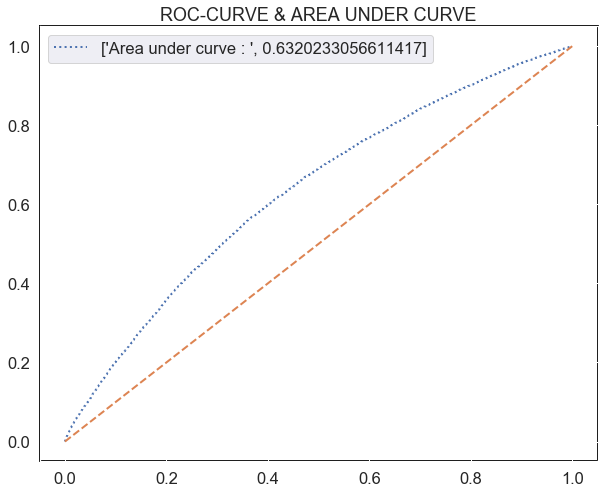

In [1000]:
logreg = LogisticRegression()
model_fit(logreg,X_train,y_train,X_test,y_test)


# Fit RandomForest model

Accuracy Score: 0.9190820994211633
Recall score   :  0.33544303797468356
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     92096
           1       0.01      0.34      0.01       158

    accuracy                           0.92     92254
   macro avg       0.50      0.63      0.49     92254
weighted avg       1.00      0.92      0.96     92254



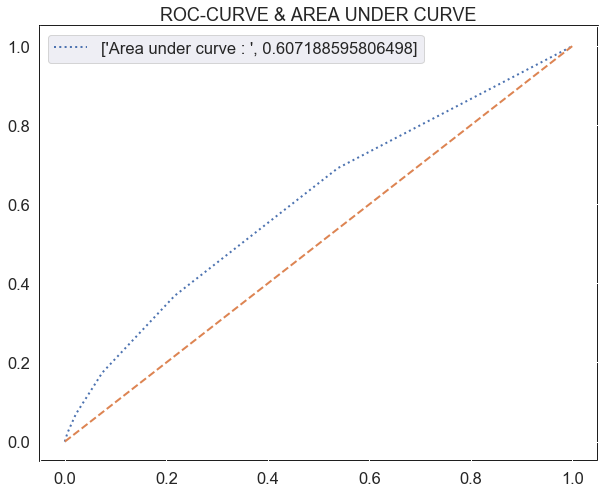

In [1001]:
randfor = RandomForestClassifier()
model_fit(randfor,X_train,y_train,X_test,y_test)


# Fit Decision Tree model

Accuracy Score: 0.8481691850759858
Recall score   :  0.12695179904955872
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     83416
           1       0.15      0.13      0.14      8838

    accuracy                           0.85     92254
   macro avg       0.53      0.53      0.53     92254
weighted avg       0.84      0.85      0.84     92254



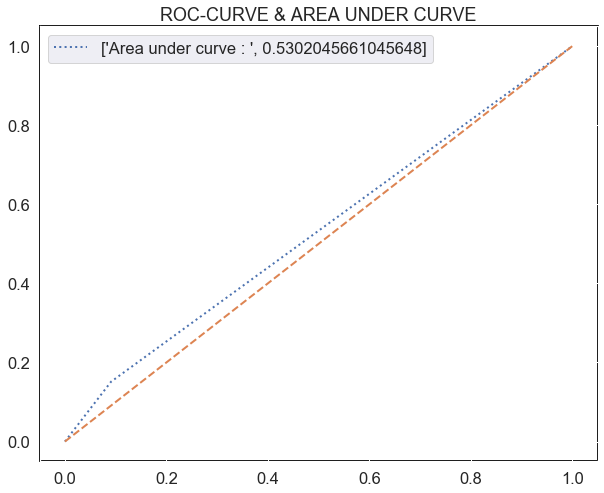

In [1002]:
dectree = DecisionTreeClassifier()
model_fit(dectree,X_train,y_train,X_test,y_test)

# Fit Gaussian Naive Bayes model

Accuracy Score: 0.9169900492119583
Recall score   :  0.1111111111111111
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     91939
           1       0.00      0.11      0.01       315

    accuracy                           0.92     92254
   macro avg       0.50      0.52      0.48     92254
weighted avg       0.99      0.92      0.95     92254



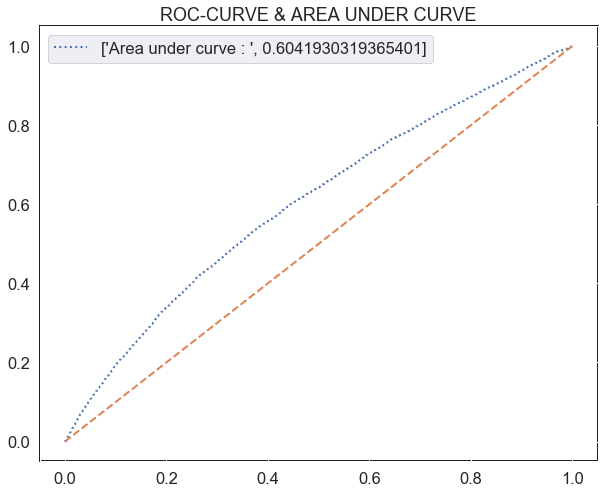

In [1003]:
gausNB = GaussianNB()
model_fit(gausNB,X_train,y_train,X_test,y_test)

# Fit XGBoost model

Accuracy Score: 0.9196024020638671
Recall score   :  0.3
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     92244
           1       0.00      0.30      0.00        10

    accuracy                           0.92     92254
   macro avg       0.50      0.61      0.48     92254
weighted avg       1.00      0.92      0.96     92254



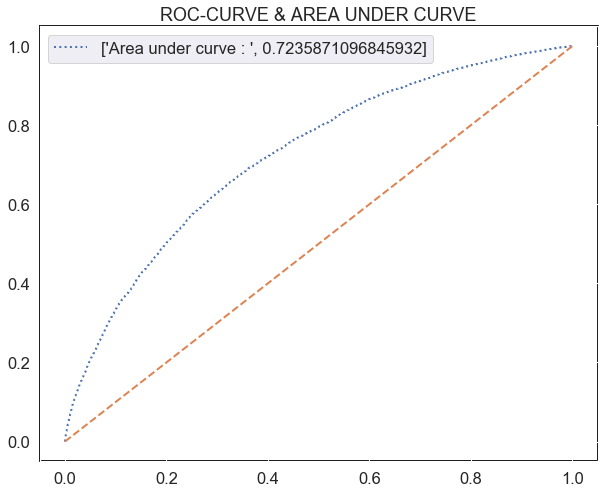

In [1004]:
xgboost_model = XGBClassifier()
model_fit(xgboost_model,X_train,y_train,X_test,y_test)